# Imports

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# **SalePrice - the property's sale price in dollars. This is the target variable**

# Reading Data

In [126]:
df = pd.read_csv("house_train.csv")
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

# Data Overview

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [106]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

# Univariate Analysis (Boxplot, Histogram, Violin Plot)

## Data Cleaning

### Missing Values

In [127]:
is_null = df.isnull().sum()
is_null[is_null > 0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [128]:
df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature','PoolQC','Fence','MiscFeature'], axis=1,inplace=True)

In [129]:
is_null = df.isnull().sum()
is_null[is_null > 0]

LotFrontage     259
MasVnrType      872
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [130]:

for col in df.select_dtypes(include=['number']):
    df[col].fillna(df[col].mean(), inplace=True)


<ipython-input-130-3413036c8f9b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [131]:
is_null = df.isnull().sum()
is_null[is_null > 0]

MasVnrType      872
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [132]:

for col in ['MasVnrType','BsmtExposure','Electrical','FireplaceQu']:
    df[col].fillna(df[col].mode()[0], inplace=True)


<ipython-input-132-d1ad55934fe6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [133]:
is_null = df.isnull().sum()
is_null[is_null > 0]

BsmtQual        37
BsmtCond        37
BsmtFinType1    37
BsmtFinType2    38
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [134]:
for col in ['BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','GarageCond']:
    df[col].fillna(df[col].mode()[0], inplace=True)

<ipython-input-134-f3bb8e96a85a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [157]:
is_null = df.isnull().sum()
is_null[is_null > 0]

Series([], dtype: int64)

In [156]:
df.describe()

Id  MSSubClass  LotFrontage       LotArea  OverallQual  \
count   548.000000  548.000000   548.000000    548.000000   548.000000   
mean    738.819343   49.105839    68.576908   9100.343066     6.231752   
std     418.421232   31.660674    13.391548   2593.927851     1.235939   
min       1.000000   20.000000    30.000000   2887.000000     2.000000   
25%     382.750000   20.000000    60.750000   7683.000000     5.000000   
50%     760.000000   50.000000    70.049958   9000.000000     6.000000   
75%    1101.500000   60.000000    75.000000  10676.750000     7.000000   
max    1456.000000  120.000000   109.000000  16770.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd  MasVnrArea   BsmtFinSF1  ...  \
count   548.000000   548.000000    548.000000  548.000000   548.000000  ...   
mean      5.368613  1983.169708   1989.204380   75.369391   429.483577  ...   
std       0.707159    25.252264     19.607907  106.053404   401.742272  ...   
min       4.000000  1910.000000   1950.000000    0.000000     0.000000  ...   
25%       5.000000  1965.000000   1972.000000    0.000000     0.000000  ...   
50%       5.000000  1995.500000   1999.000000    0.000000   422.500000  ...   
75%       6.000000  2004.000000   2005.000000  143.000000   725.000000  ...   
max       7.000000  2009.000000   2010.000000  420.000000  1619.000000  ...   

       WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
count  548.000000   548.000000          548.0      548.0        548.0   
mean    90.144161    40.246350            0.0        0.0          0.0   
std     97.322300    43.943285            0.0        0.0          0.0   
min      0.000000     0.000000            0.0        0.0          0.0   
25%      0.000000     0.000000            0.0        0.0          0.0   
50%     99.000000    33.000000            0.0        0.0          0.0   
75%    165.000000    63.000000            0.0        0.0          0.0   
max    379.000000   162.000000            0.0        0.0          0.0   

       PoolArea  MiscVal      MoSold       YrSold      SalePrice  
count     548.0    548.0  548.000000   548.000000     548.000000  
mean        0.0      0.0    6.324818  2007.784672  177890.208029  
std         0.0      0.0    2.658566     1.322420   54472.843763  
min         0.0      0.0    1.000000  2006.000000   37900.000000  
25%         0.0      0.0    5.000000  2007.000000  136975.000000  
50%         0.0      0.0    6.000000  2008.000000  175700.000000  
75%         0.0      0.0    8.000000  2009.000000  212225.000000  
max         0.0      0.0   12.000000  2010.000000  328900.000000  

[8 rows x 38 columns]

In [159]:
zero_percentage = (df == 0).sum() / len(df) * 100

# Set a threshold for zero percentage (e.g., 80%)
threshold = 80

# Get columns exceeding the threshold
columns_to_drop = zero_percentage[zero_percentage > threshold].index

# Drop the identified columns
df = df.drop(columns_to_drop, axis=1)


### Duplicates

In [136]:
df.duplicated().sum()

0

### Ouliers

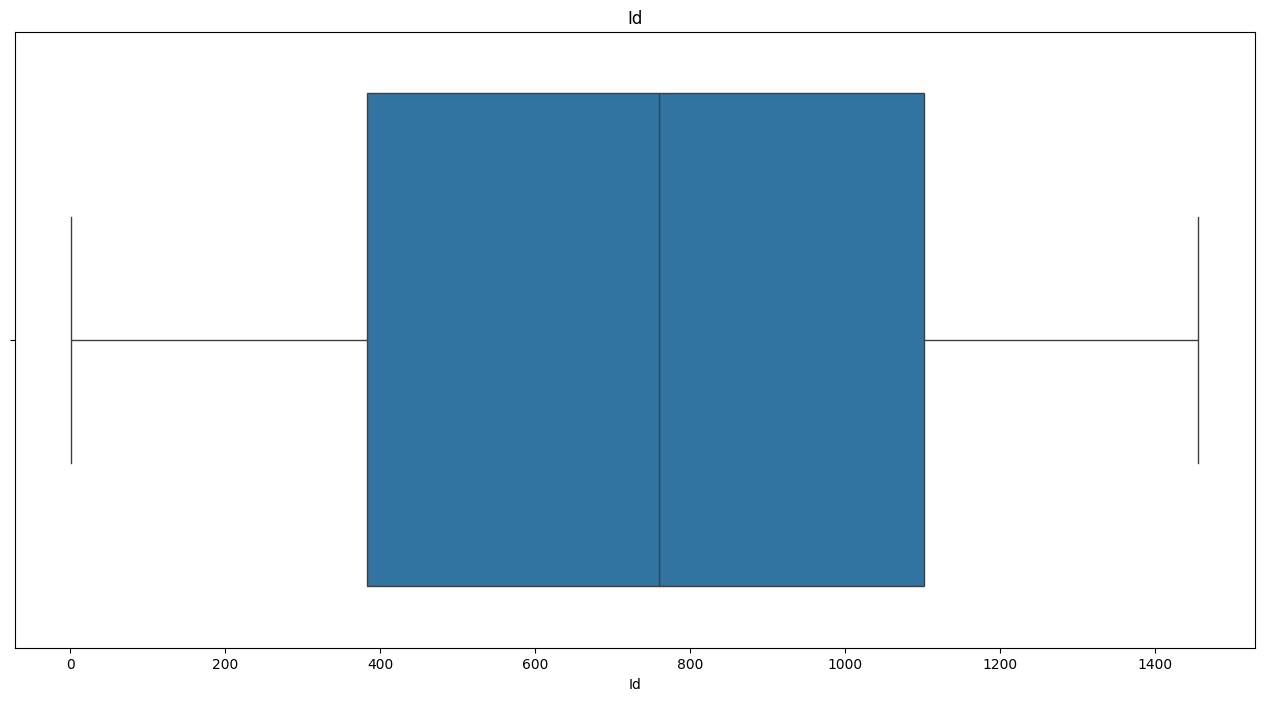

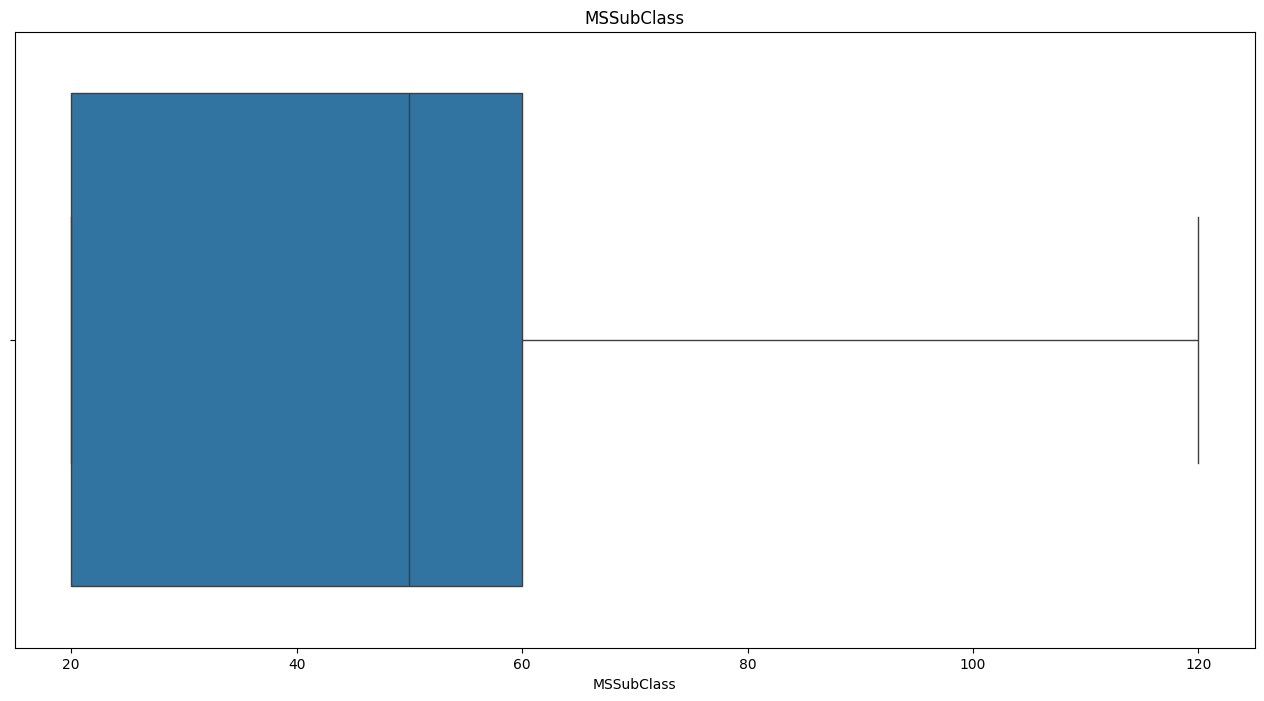

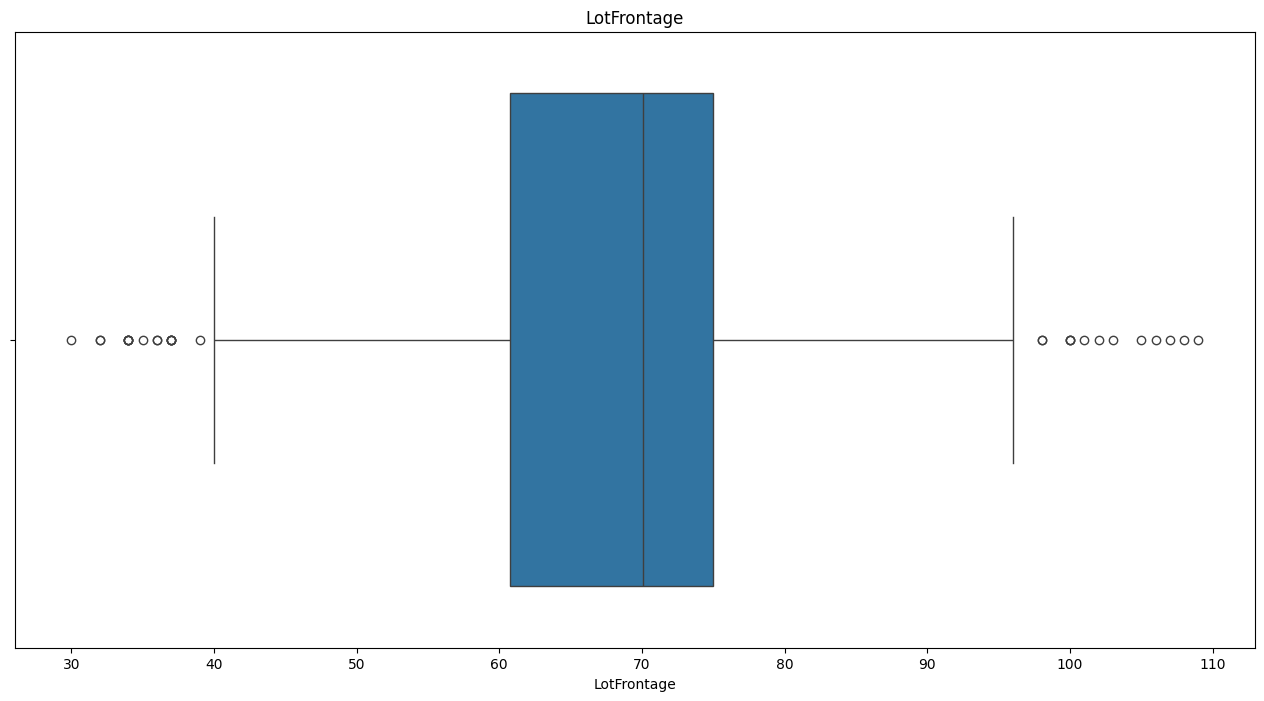

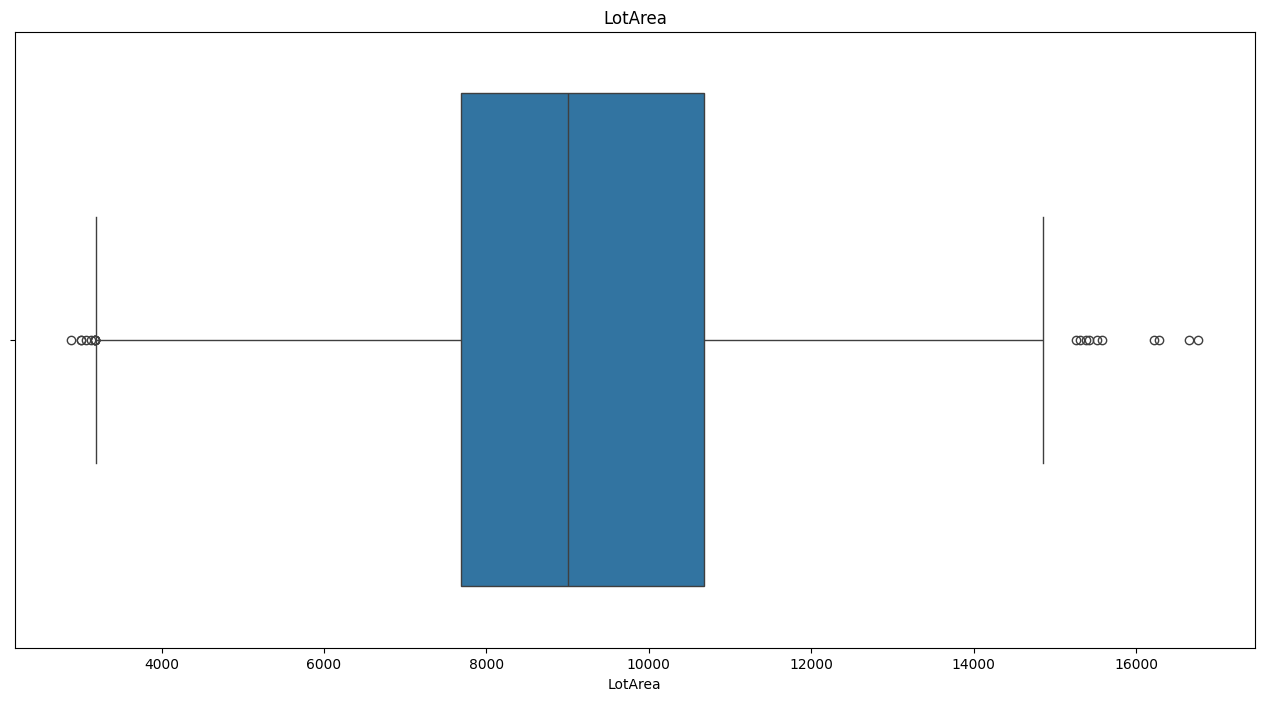

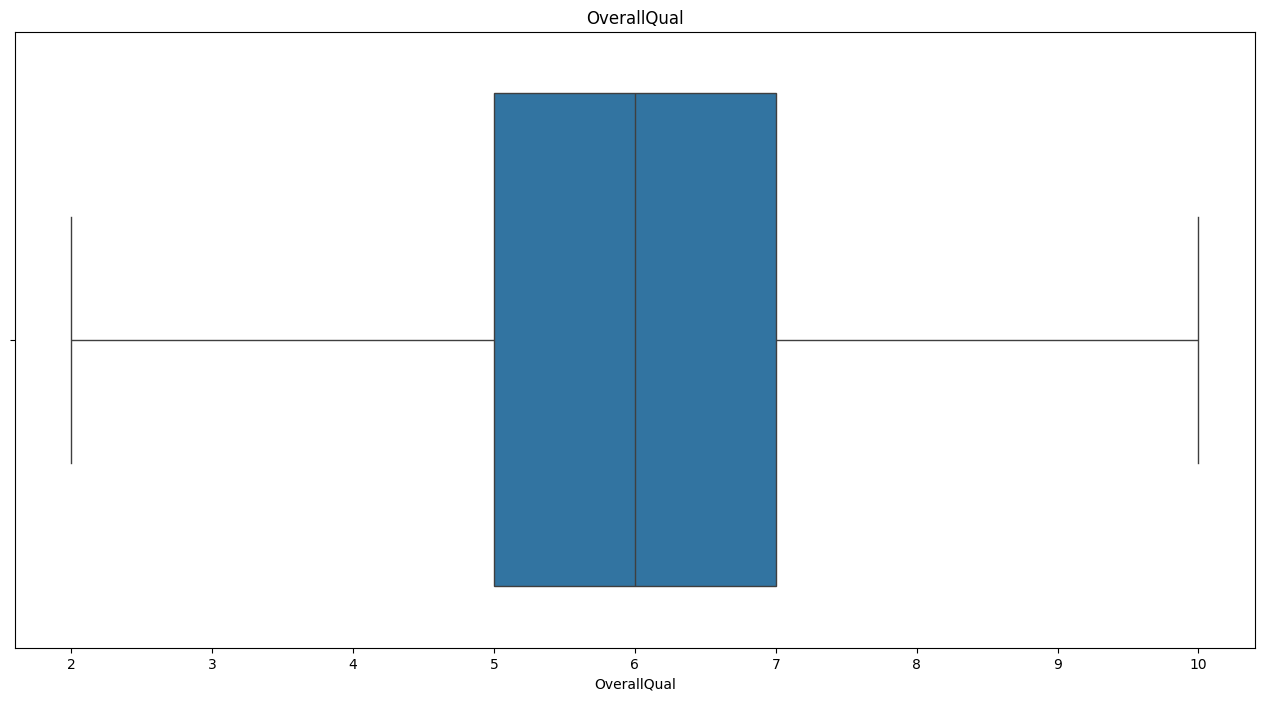

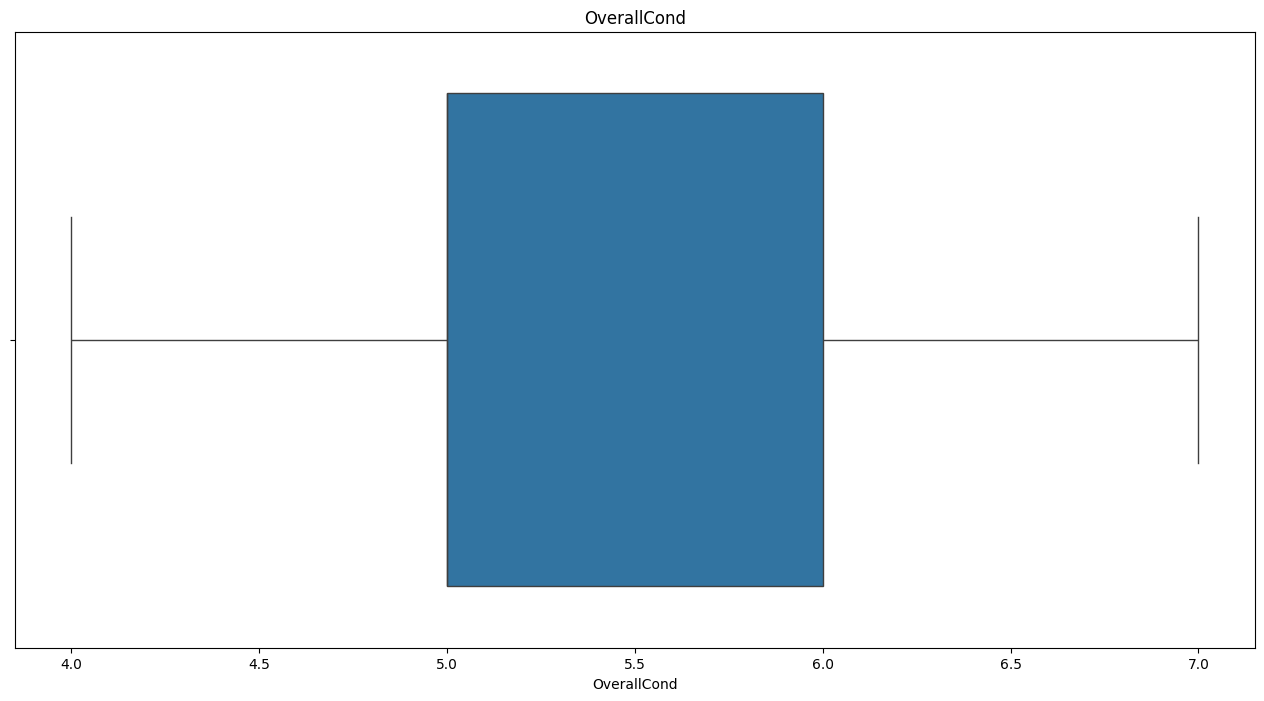

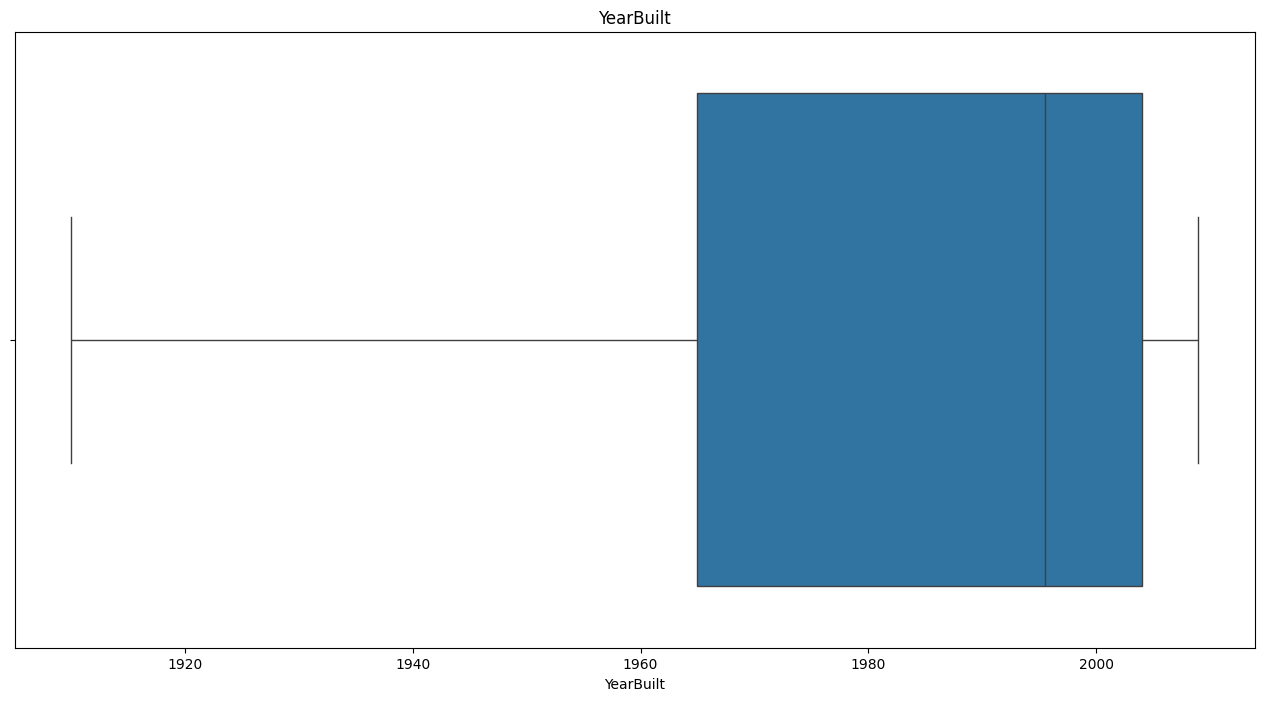

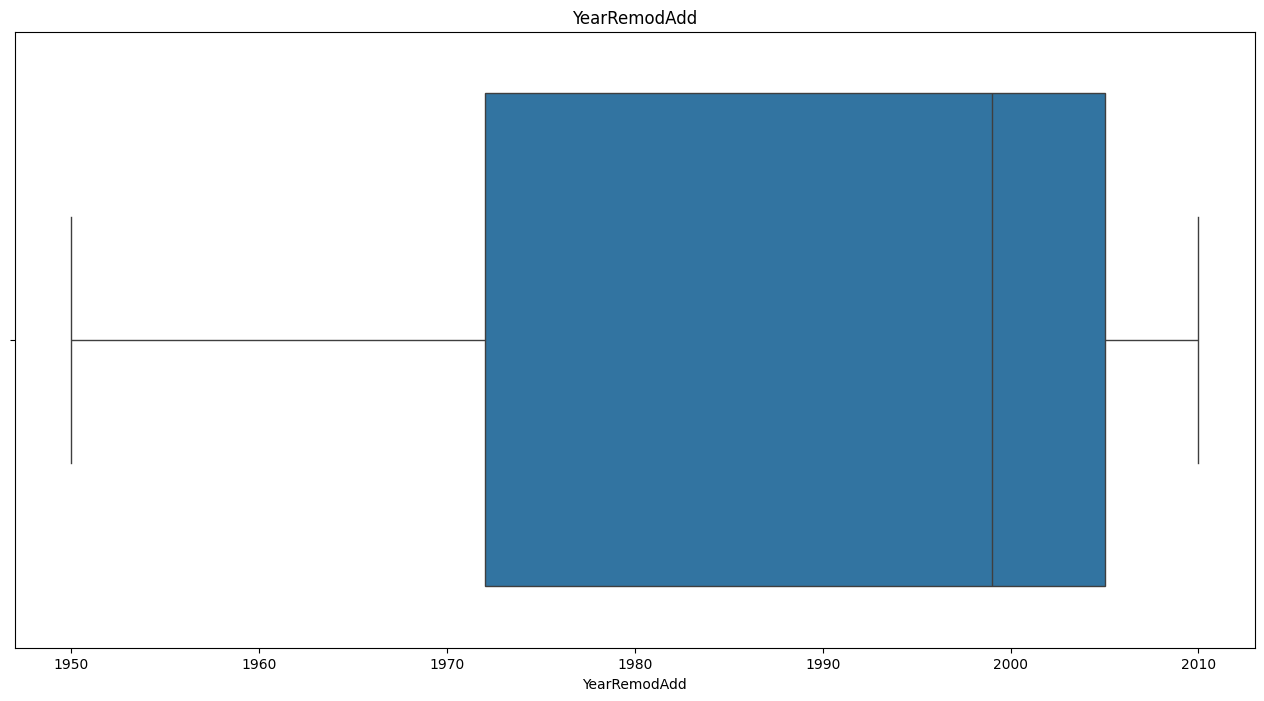

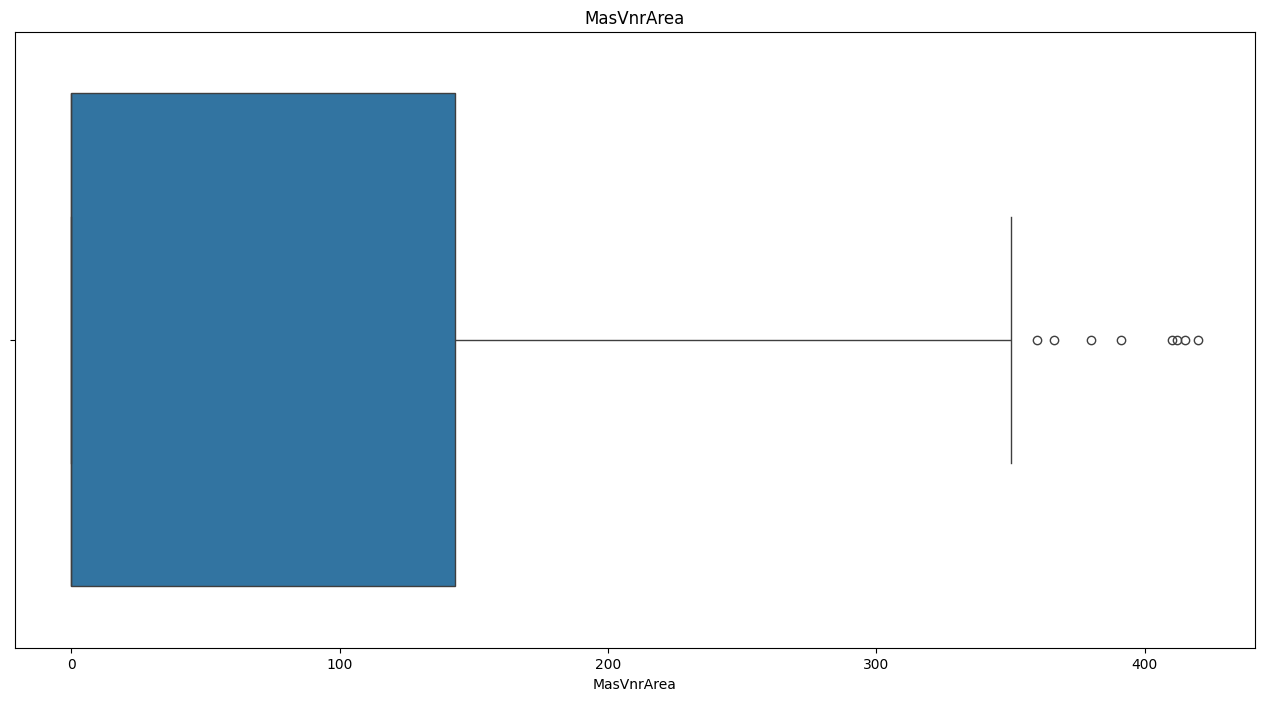

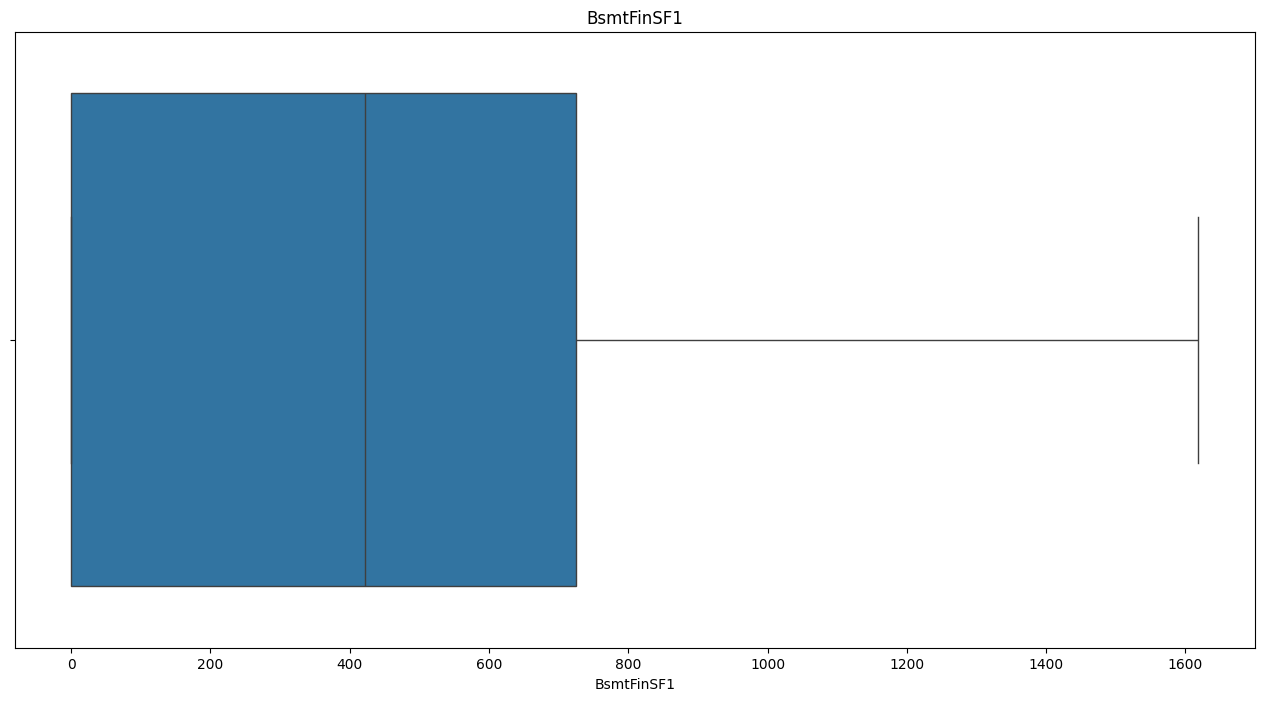

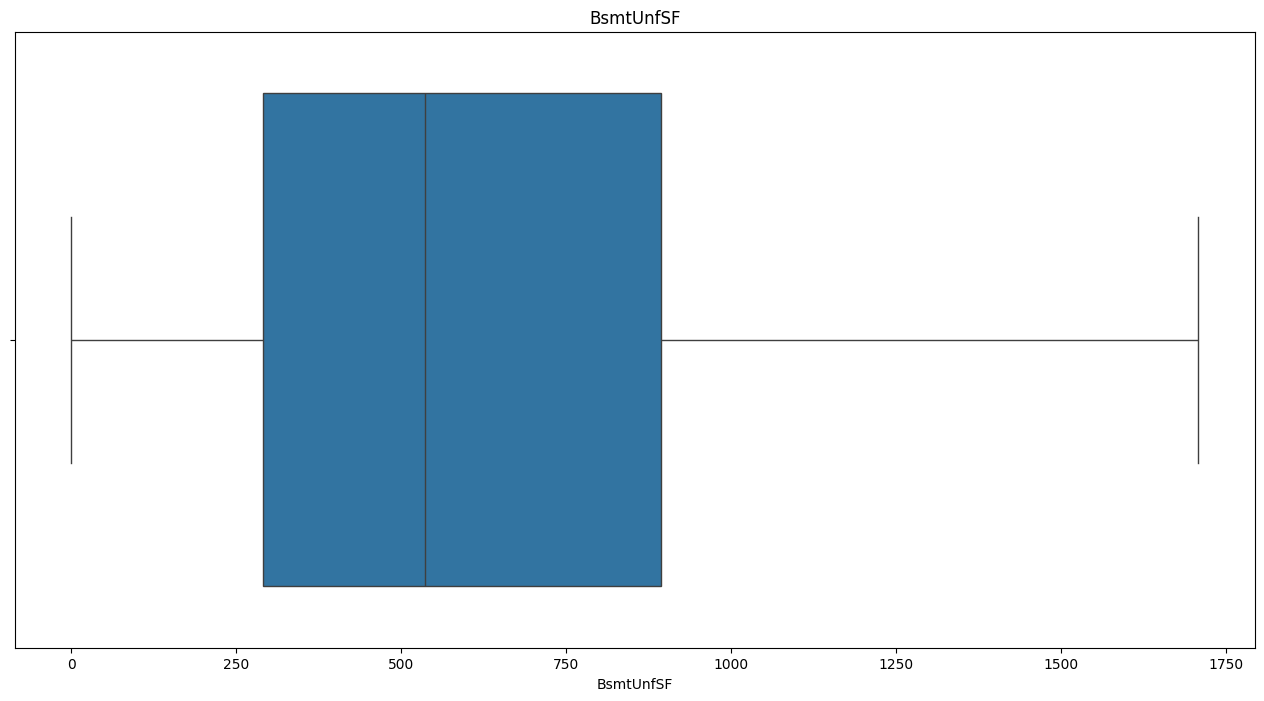

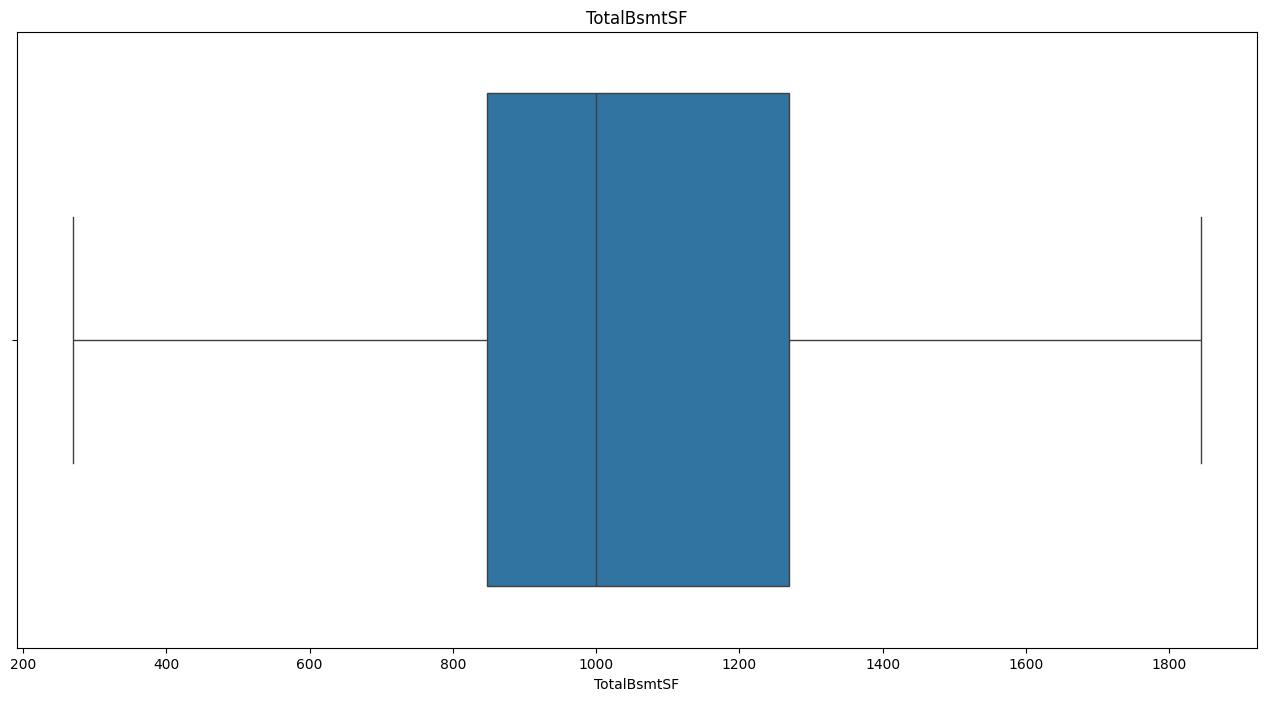

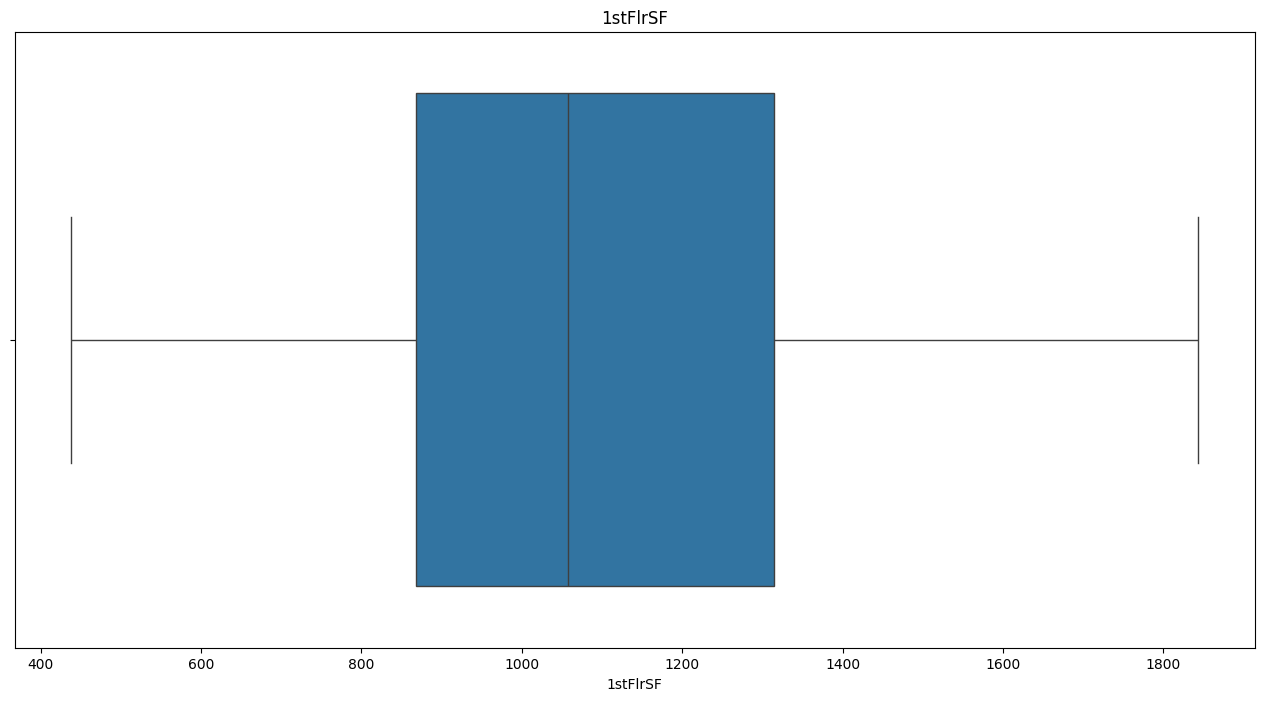

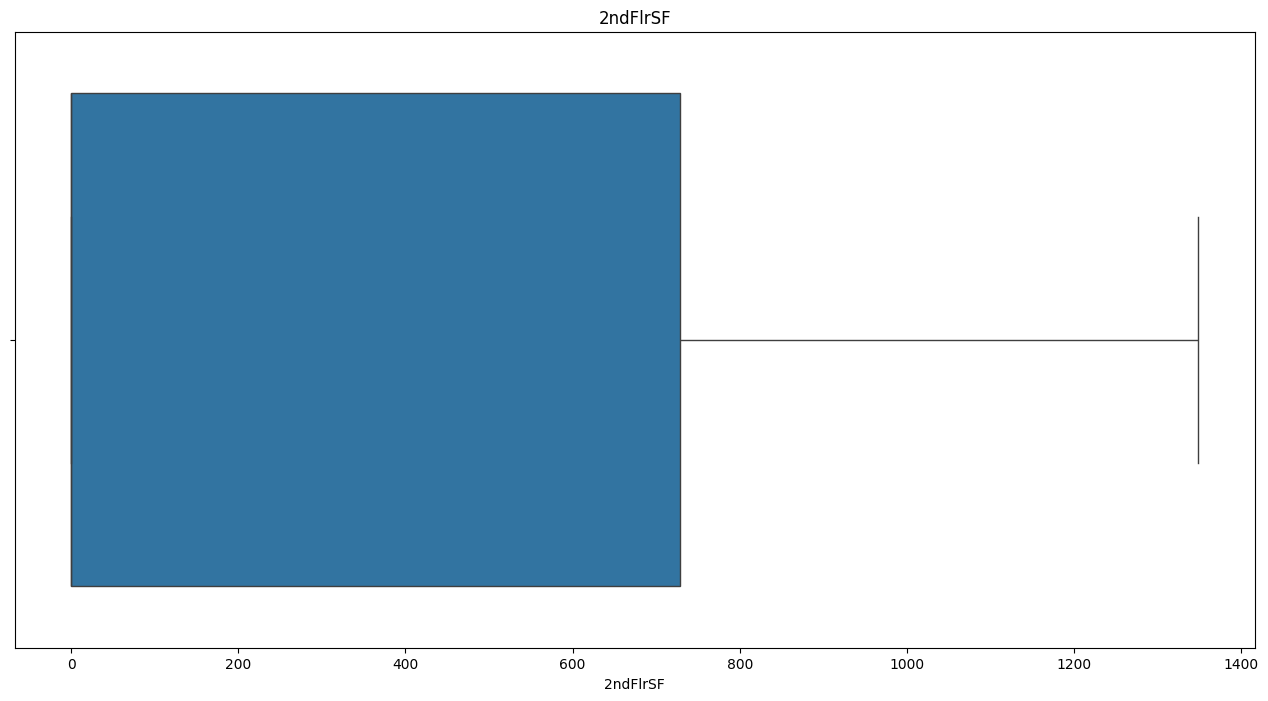

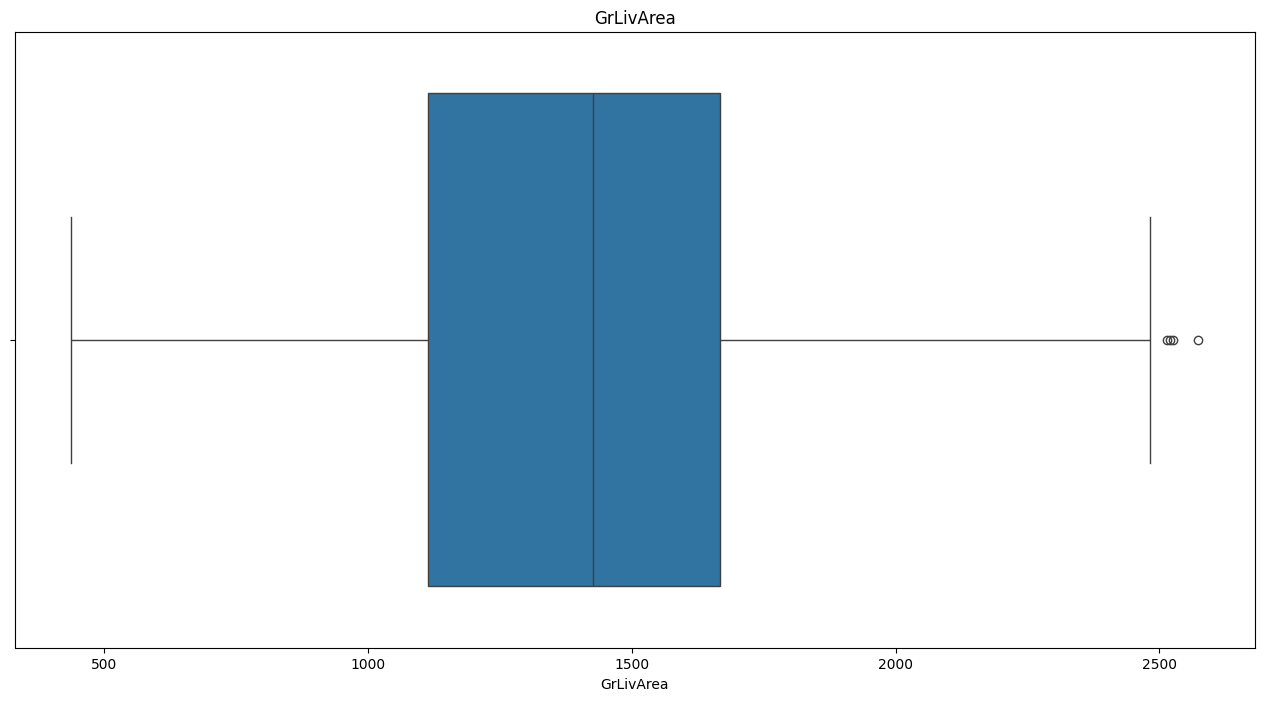

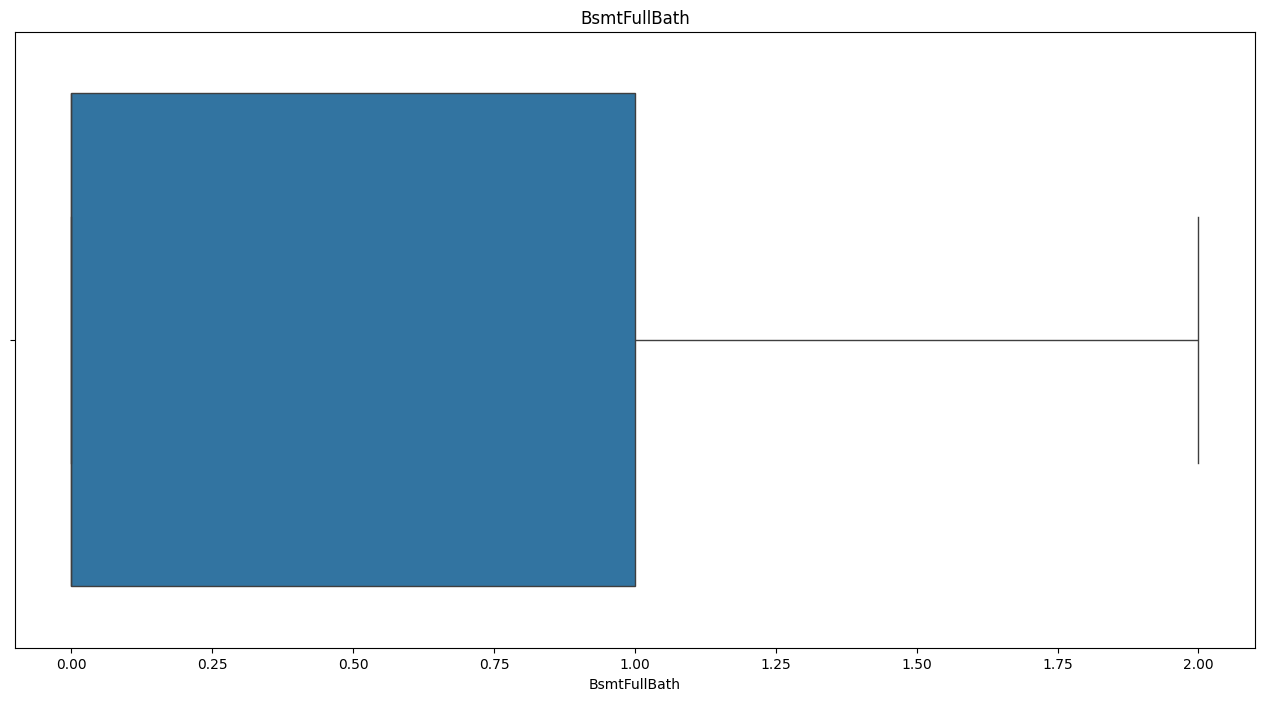

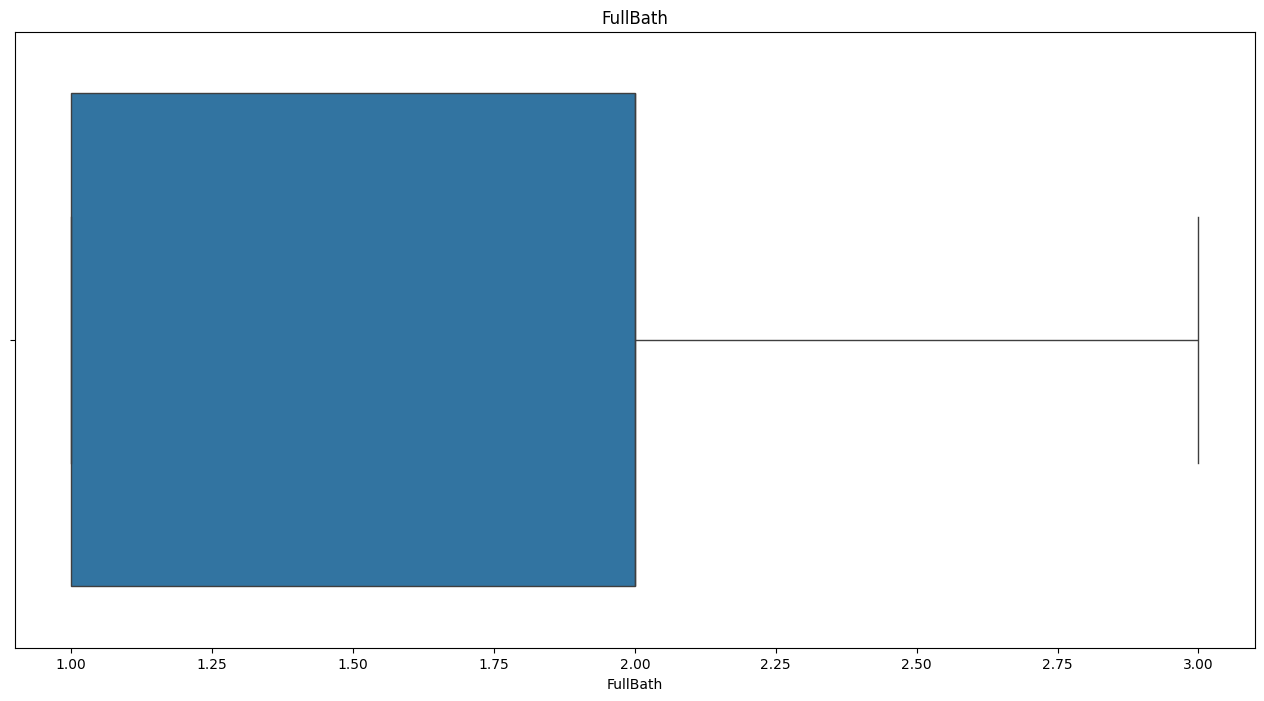

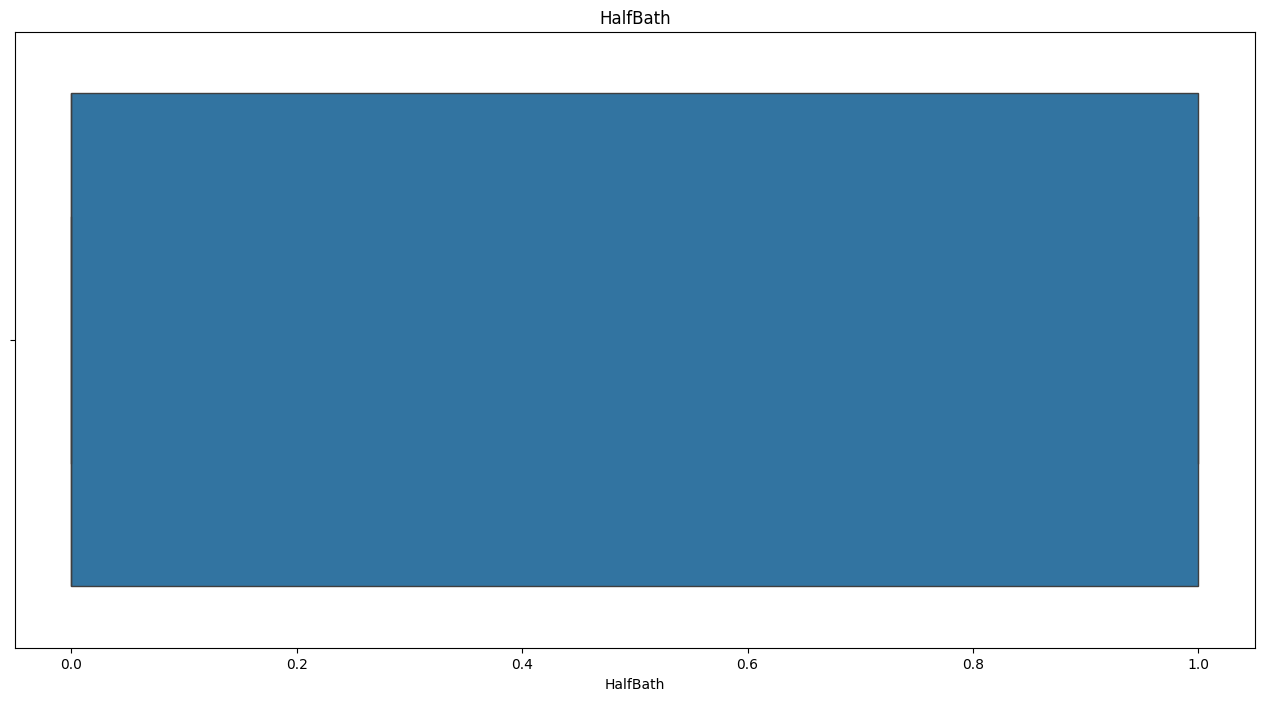

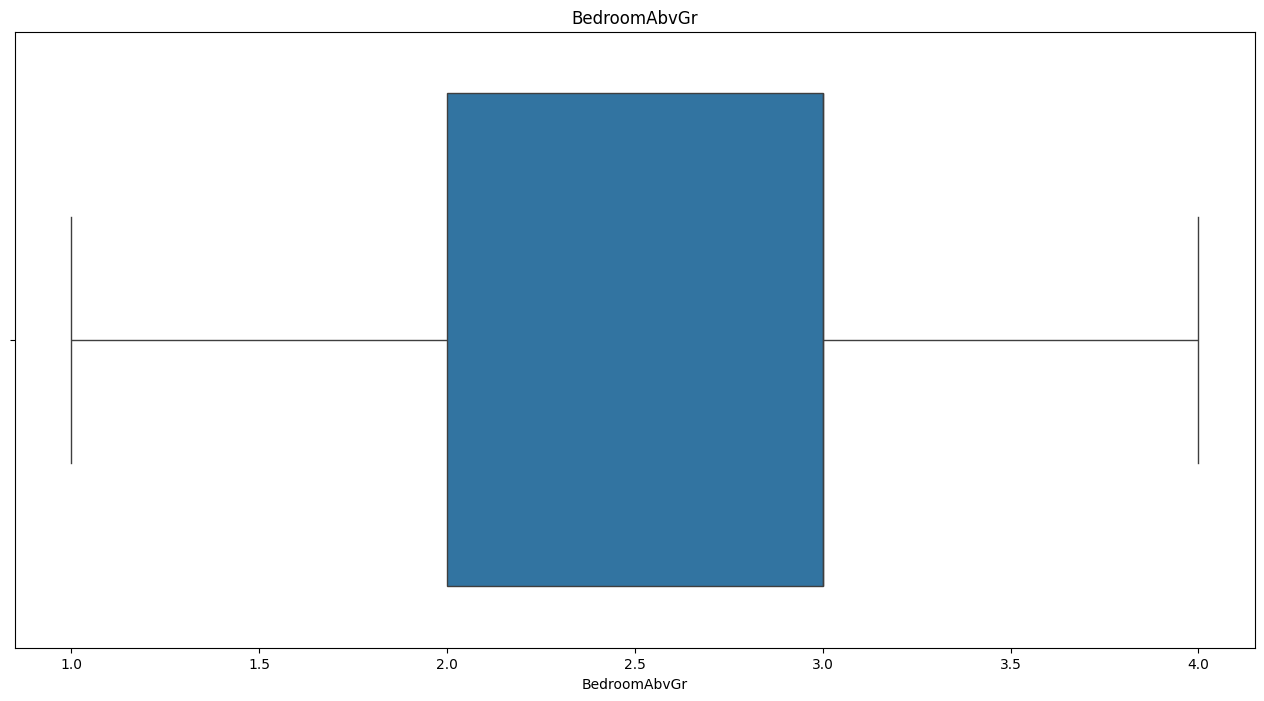

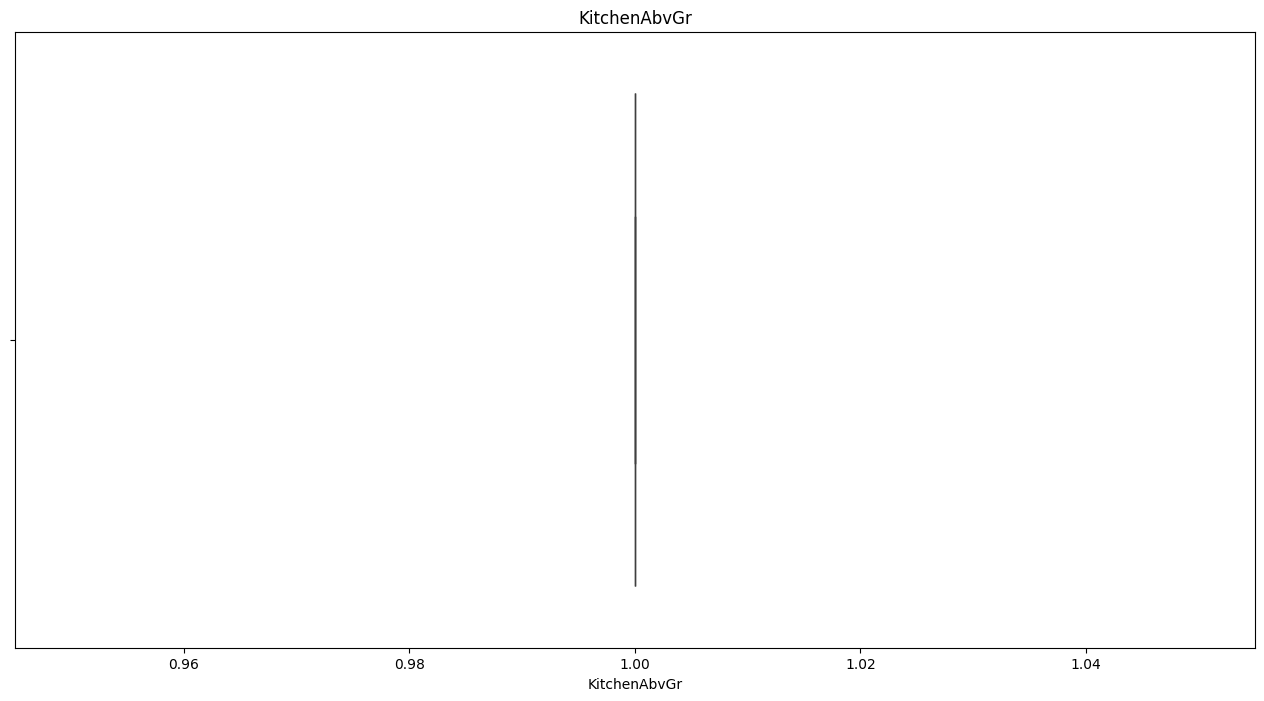

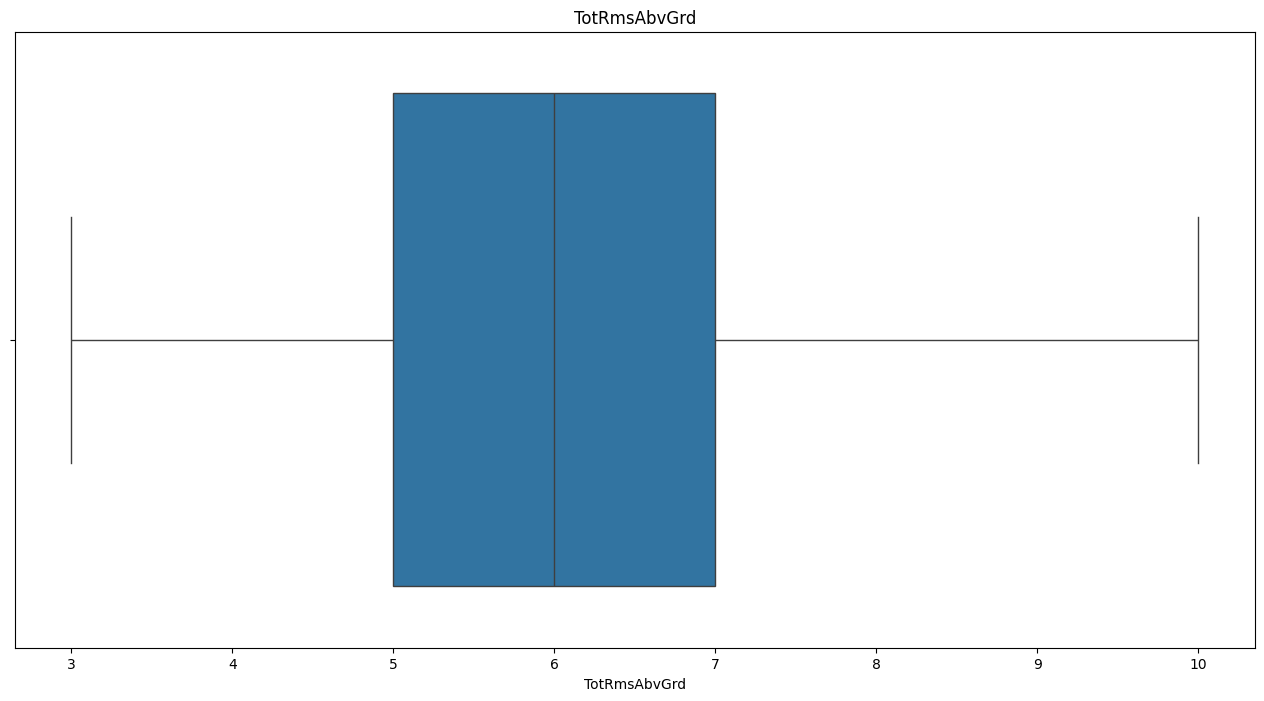

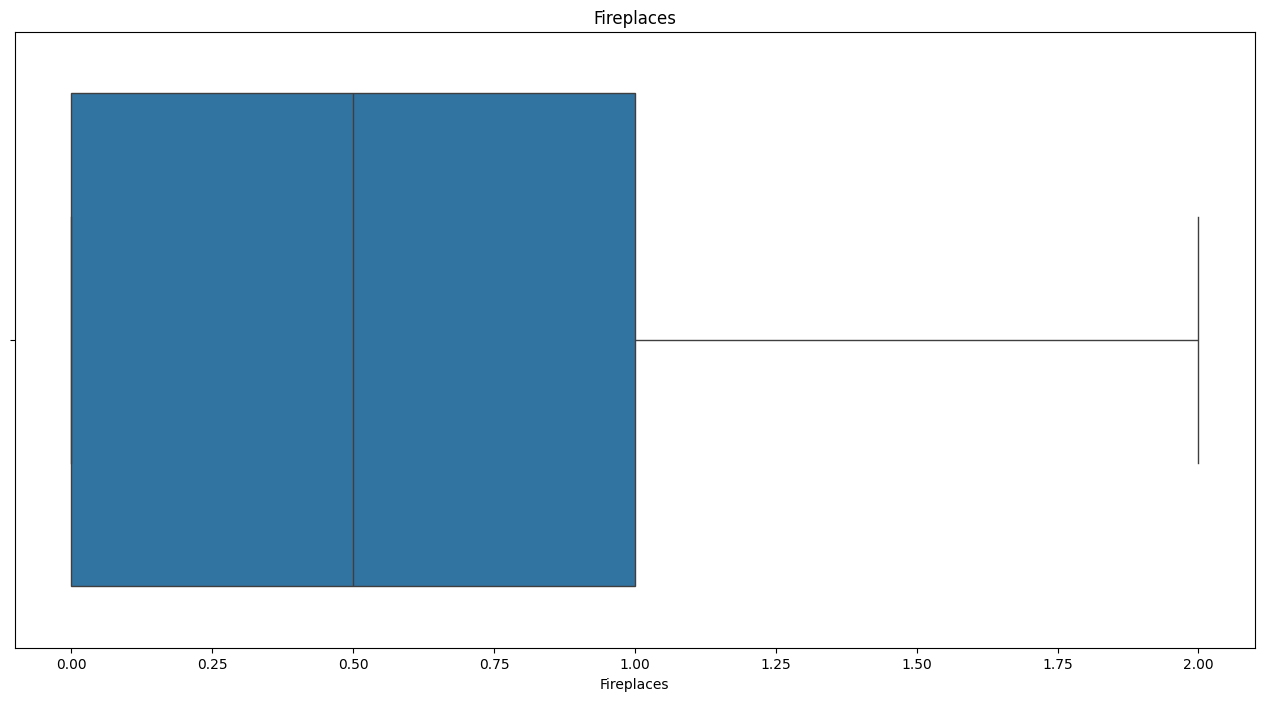

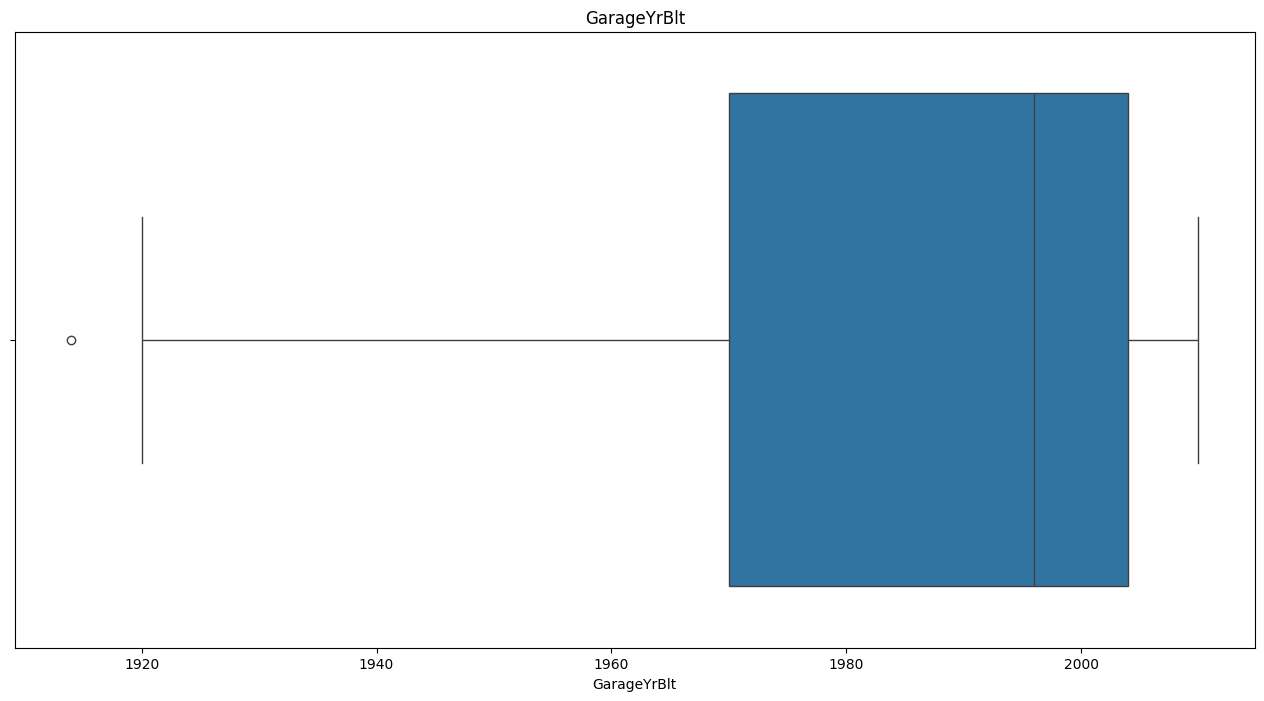

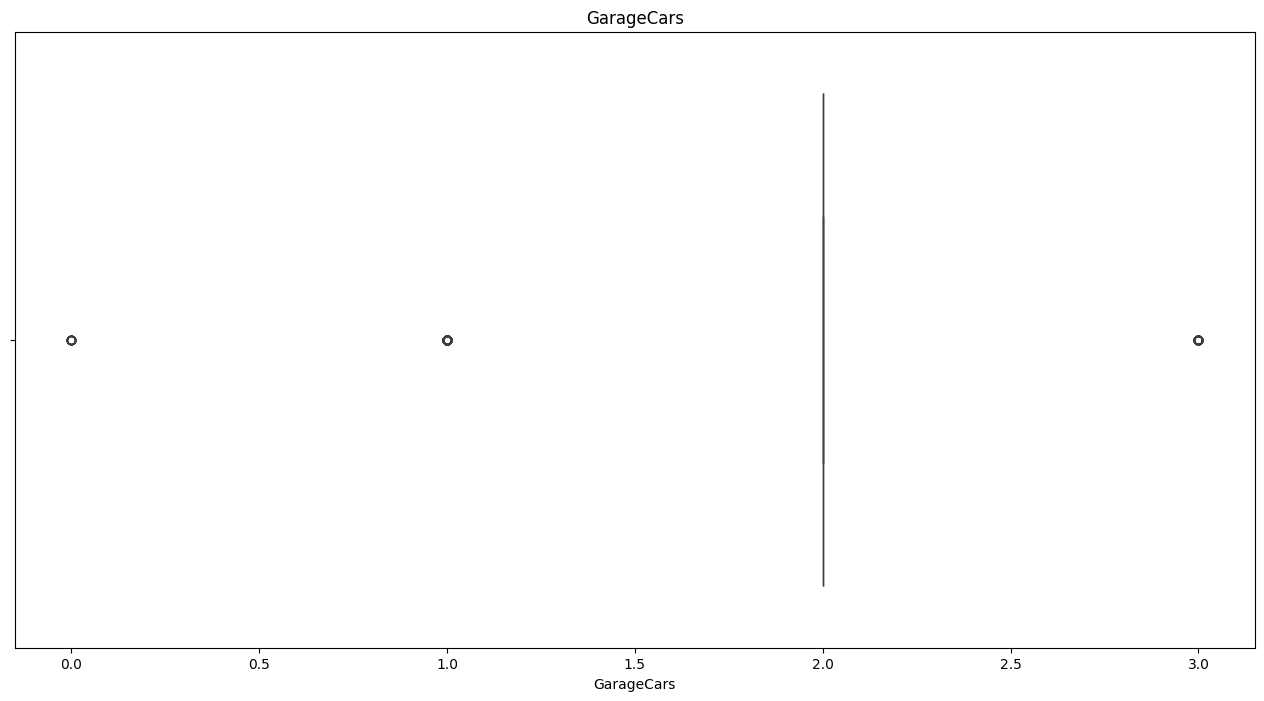

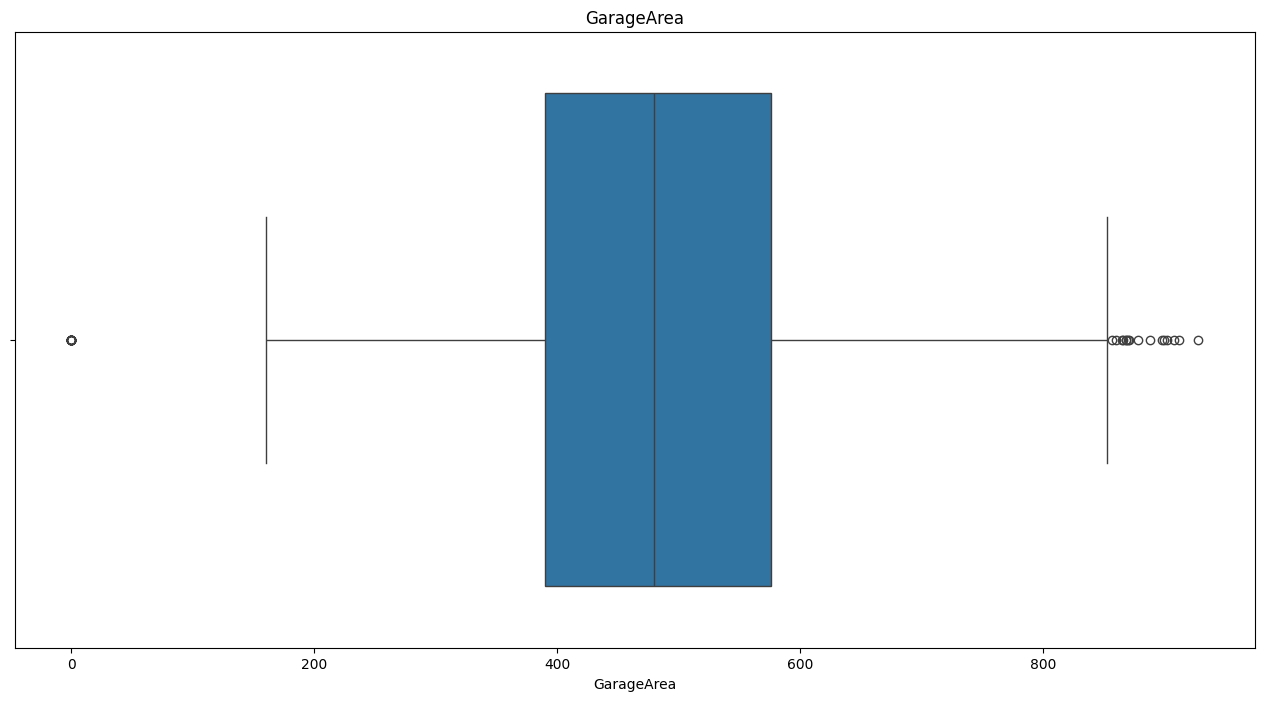

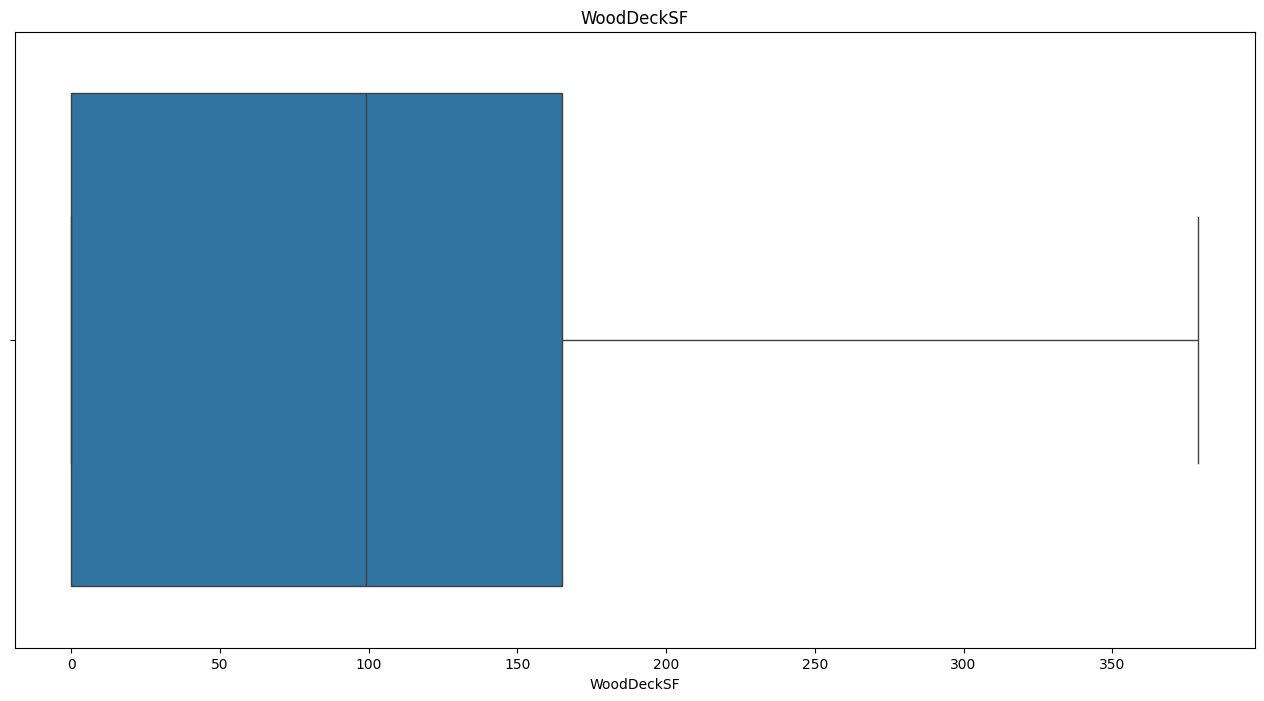

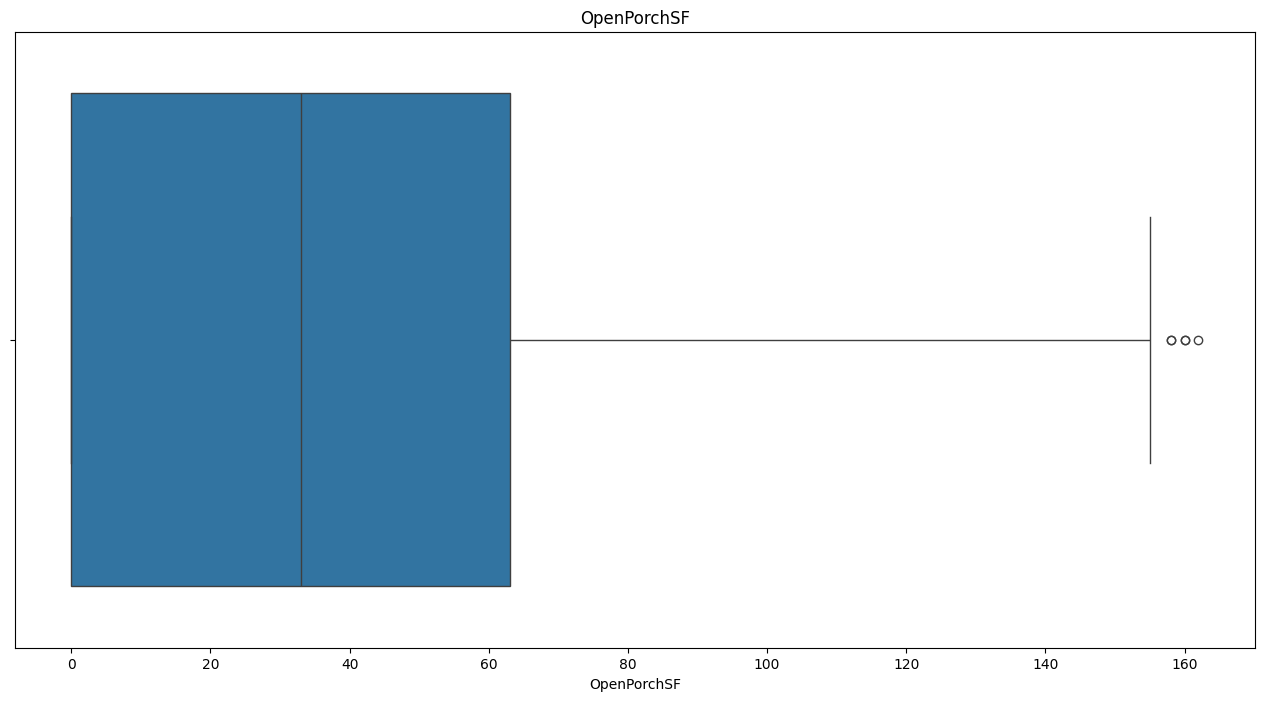

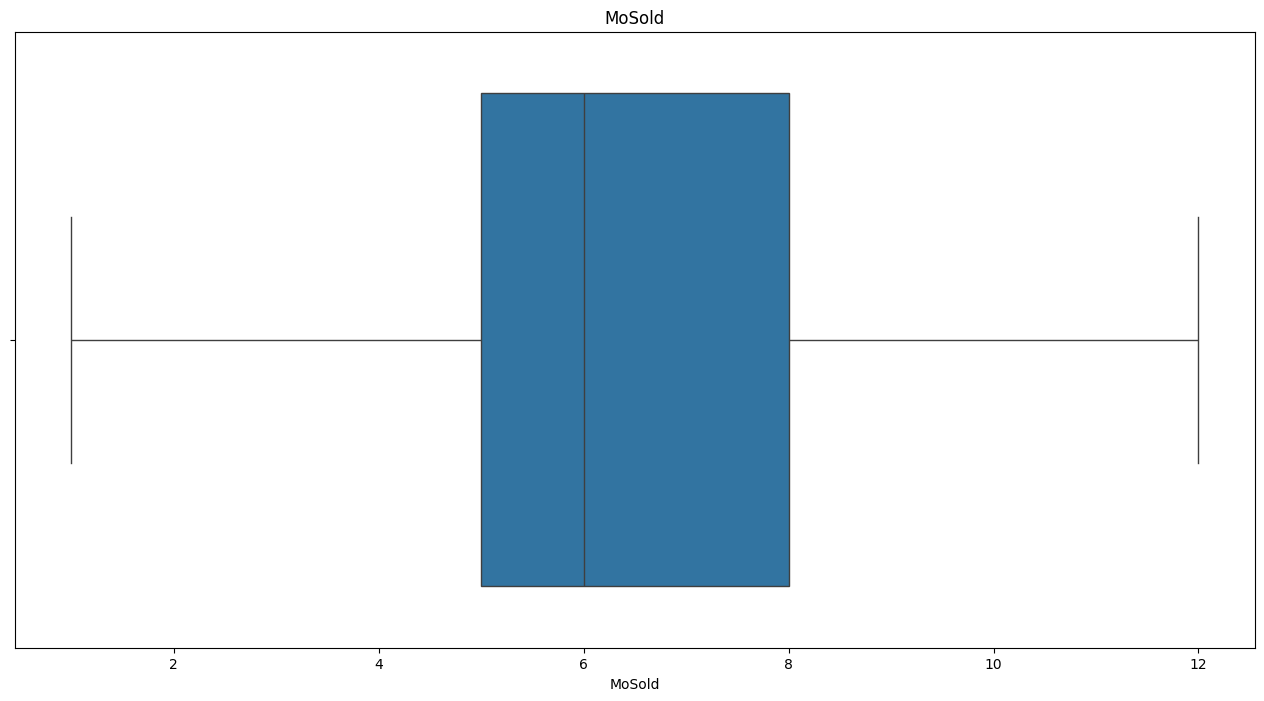

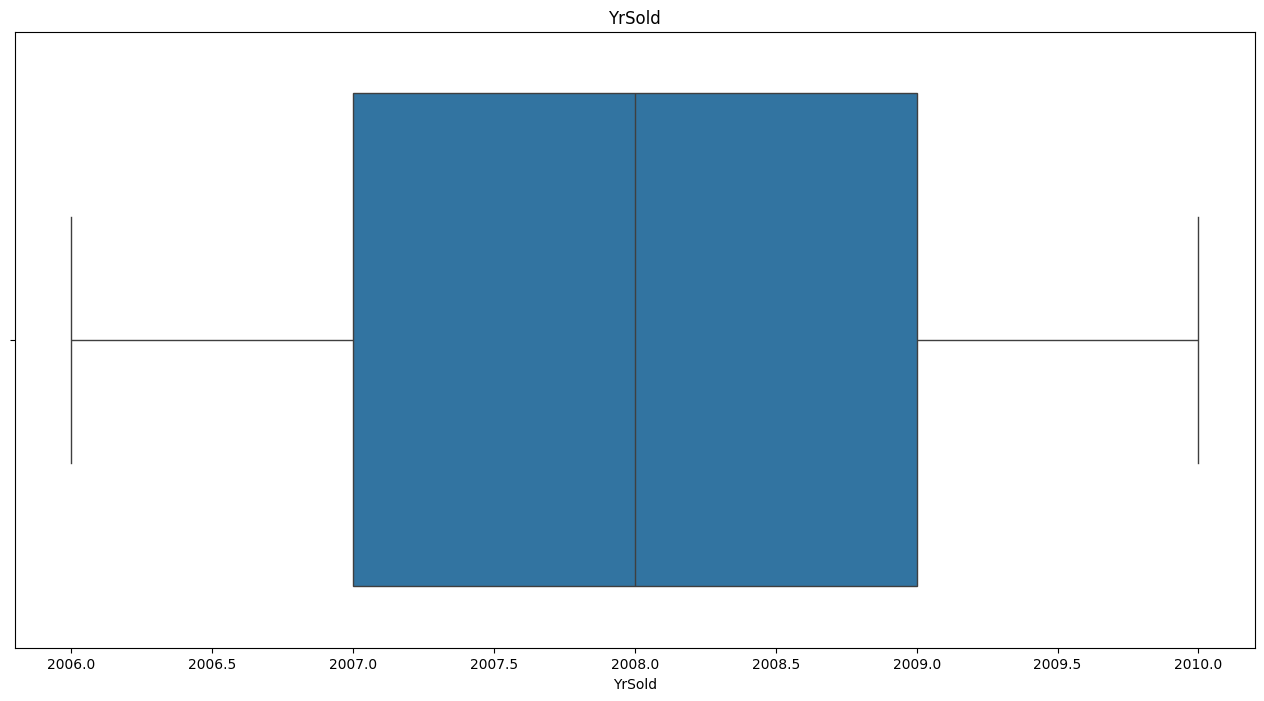

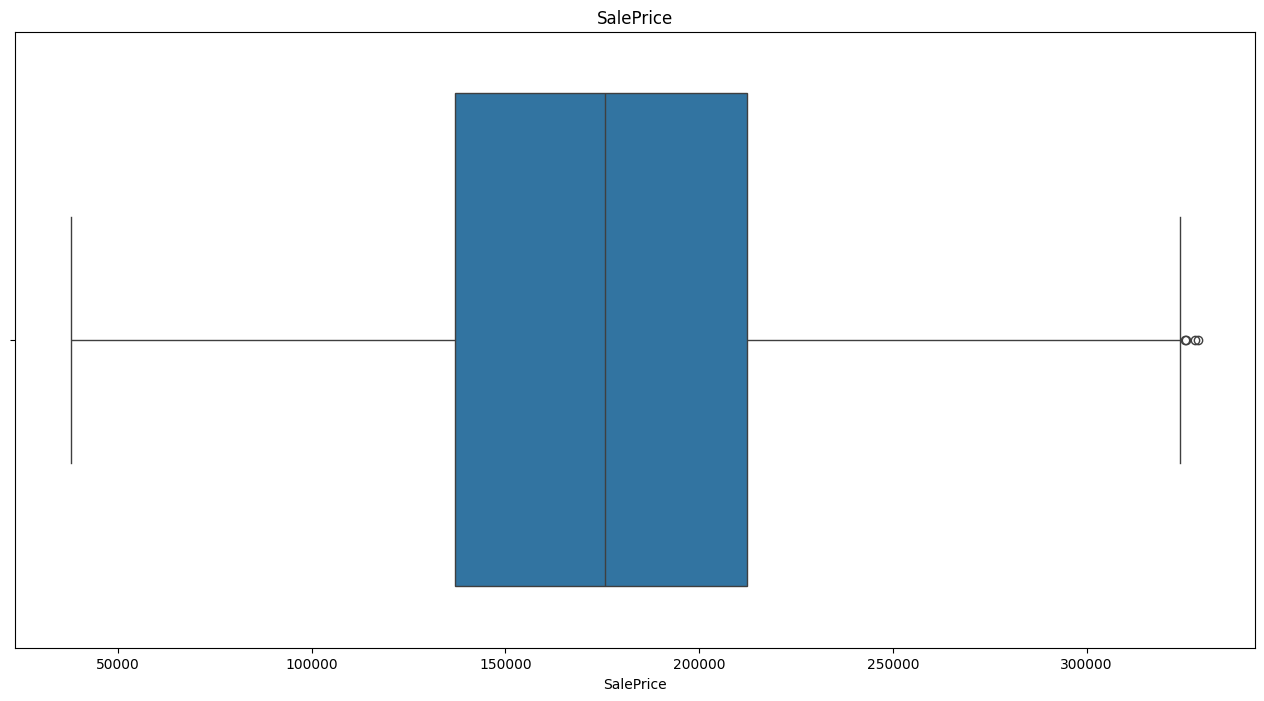

In [160]:


def check_outliers_Boxplot(df, col):
    fig, ax = plt.subplots(figsize=(16, 8))

    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(f"{col}")
    plt.show()


for col in df.select_dtypes(include='number').columns:
    check_outliers_Boxplot(df, col)

In [161]:
def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    outliers = data[z_scores > threshold]
    return outliers

# Loop through numerical columns only
for col in df.select_dtypes(include='number').columns:
    outliers = detect_outliers_zscore(df[col])
    print(f"Outliers in {col}:\n", outliers)

Outliers in Id:
 Series([], Name: Id, dtype: int64)
Outliers in MSSubClass:
 Series([], Name: MSSubClass, dtype: int64)
Outliers in LotFrontage:
 1162    109.0
Name: LotFrontage, dtype: float64
Outliers in LotArea:
 Series([], Name: LotArea, dtype: int64)
Outliers in OverallQual:
 1100     2
1442    10
Name: OverallQual, dtype: int64
Outliers in OverallCond:
 Series([], Name: OverallCond, dtype: int64)
Outliers in YearBuilt:
 Series([], Name: YearBuilt, dtype: int64)
Outliers in YearRemodAdd:
 Series([], Name: YearRemodAdd, dtype: int64)
Outliers in MasVnrArea:
 45      412.0
895     415.0
1209    420.0
1330    410.0
Name: MasVnrArea, dtype: float64
Outliers in BsmtFinSF1:
 Series([], Name: BsmtFinSF1, dtype: int64)
Outliers in BsmtUnfSF:
 Series([], Name: BsmtUnfSF, dtype: int64)
Outliers in TotalBsmtSF:
 Series([], Name: TotalBsmtSF, dtype: int64)
Outliers in 1stFlrSF:
 Series([], Name: 1stFlrSF, dtype: int64)
Outliers in 2ndFlrSF:
 Series([], Name: 2ndFlrSF, dtype: int64)
Outliers i

In [162]:
def detect_outliers_IQR(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]
# Loop through numerical columns only
for col in df.select_dtypes(include='number').columns:
    outliers = detect_outliers_IQR(df[col])
    print(f"Outliers in {col}:\n", outliers)

Outliers in Id:
 Series([], Name: Id, dtype: int64)
Outliers in MSSubClass:
 Series([], Name: MSSubClass, dtype: int64)
Outliers in LotFrontage:
 20      101.0
27       98.0
35      108.0
158     100.0
264      30.0
282      34.0
295      37.0
326      32.0
433     100.0
468      98.0
483      32.0
492     105.0
631      34.0
665     106.0
730      39.0
777     100.0
847      36.0
850      36.0
977      35.0
1042     34.0
1051    103.0
1078     37.0
1089     37.0
1157     34.0
1162    109.0
1176     37.0
1264     34.0
1322    107.0
1355    102.0
1422     37.0
Name: LotFrontage, dtype: float64
Outliers in LotArea:
 139     15426
219      3010
229      3182
301     16226
465      3072
492     15578
682      2887
684     16770
782     16285
790      3182
845     16647
847     15523
982      3182
1004     3182
1019     3013
1023     3182
1224    15384
1251     3136
1347    15306
1403    15256
Name: LotArea, dtype: int64
Outliers in OverallQual:
 Series([], Name: OverallQual, dtype: int64)


In [163]:
# Compare Z-score and IQR
for col in df.select_dtypes(include='number').columns:
    print(f"Outliers in {col} using Z-score:")
    zscore_outliers = detect_outliers_zscore(df[col])
    print(zscore_outliers)
    print(f"Number of outliers: {len(zscore_outliers)}")

    print(f"\nOutliers in {col} using IQR:")
    iqr_outliers = detect_outliers_IQR(df[col])
    print(iqr_outliers)
    print(f"Number of outliers: {len(iqr_outliers)}")
    print("-" * 30)


Outliers in Id using Z-score:
Series([], Name: Id, dtype: int64)
Number of outliers: 0

Outliers in Id using IQR:
Series([], Name: Id, dtype: int64)
Number of outliers: 0
------------------------------
Outliers in MSSubClass using Z-score:
Series([], Name: MSSubClass, dtype: int64)
Number of outliers: 0

Outliers in MSSubClass using IQR:
Series([], Name: MSSubClass, dtype: int64)
Number of outliers: 0
------------------------------
Outliers in LotFrontage using Z-score:
1162    109.0
Name: LotFrontage, dtype: float64
Number of outliers: 1

Outliers in LotFrontage using IQR:
20      101.0
27       98.0
35      108.0
158     100.0
264      30.0
282      34.0
295      37.0
326      32.0
433     100.0
468      98.0
483      32.0
492     105.0
631      34.0
665     106.0
730      39.0
777     100.0
847      36.0
850      36.0
977      35.0
1042     34.0
1051    103.0
1078     37.0
1089     37.0
1157     34.0
1162    109.0
1176     37.0
1264     34.0
1322    107.0
1355    102.0
1422     37.0

In [164]:

def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df_filtered

for col in df.select_dtypes(include='number').columns:
    df = remove_outliers(df, col)


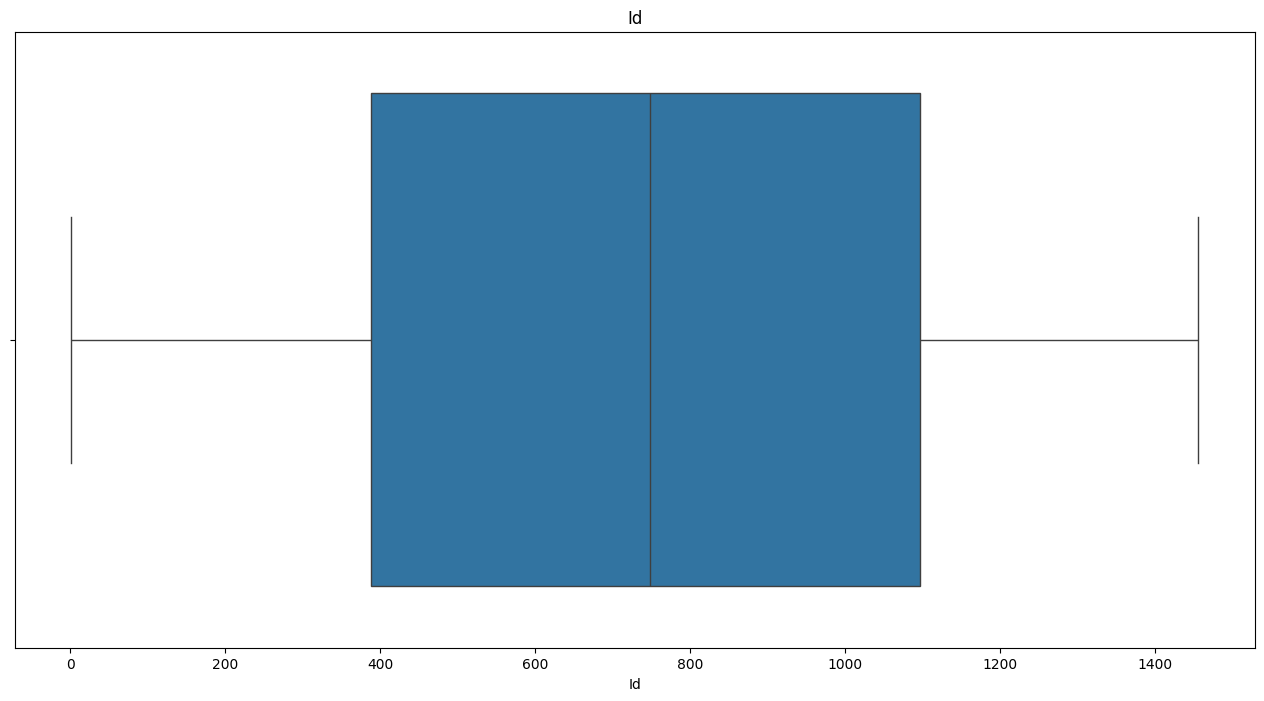

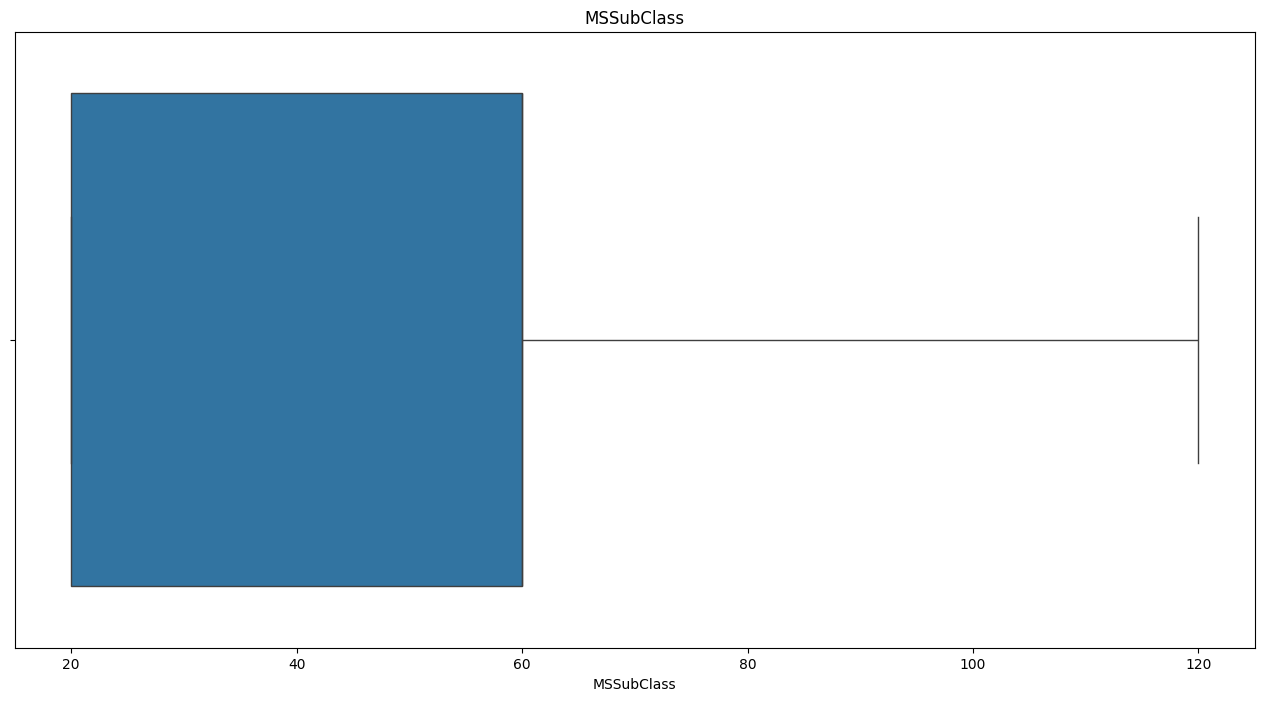

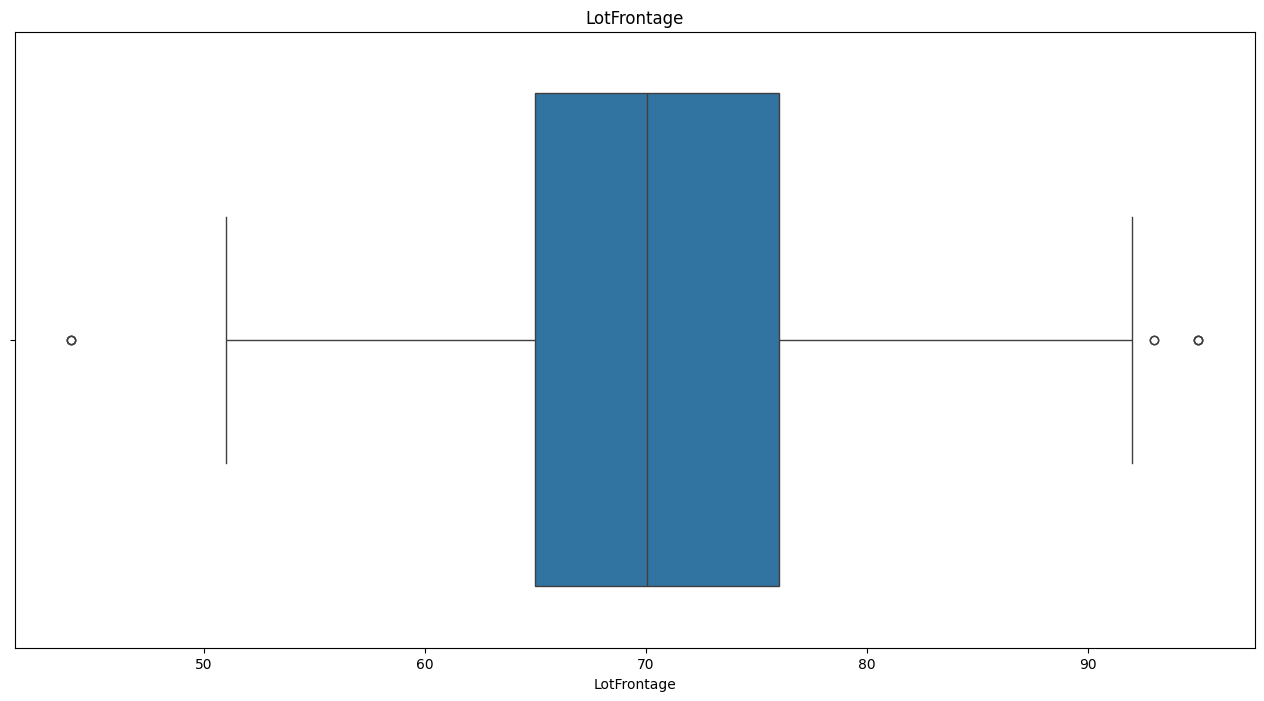

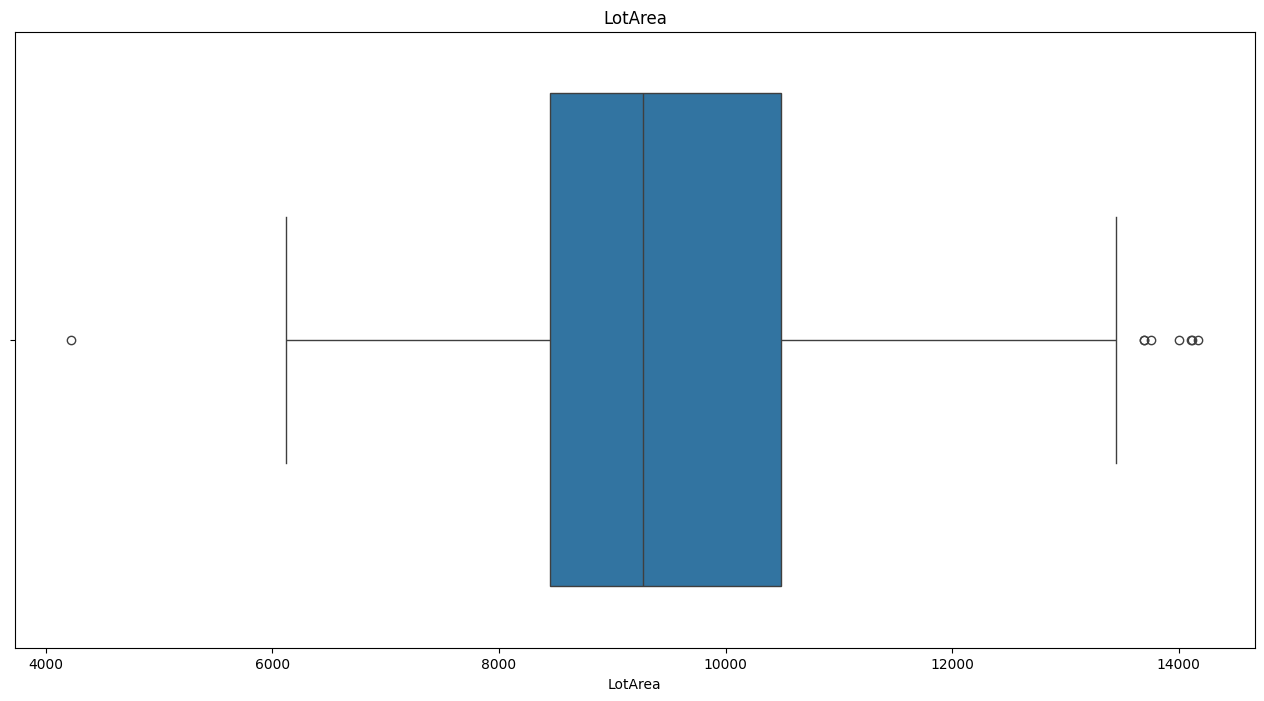

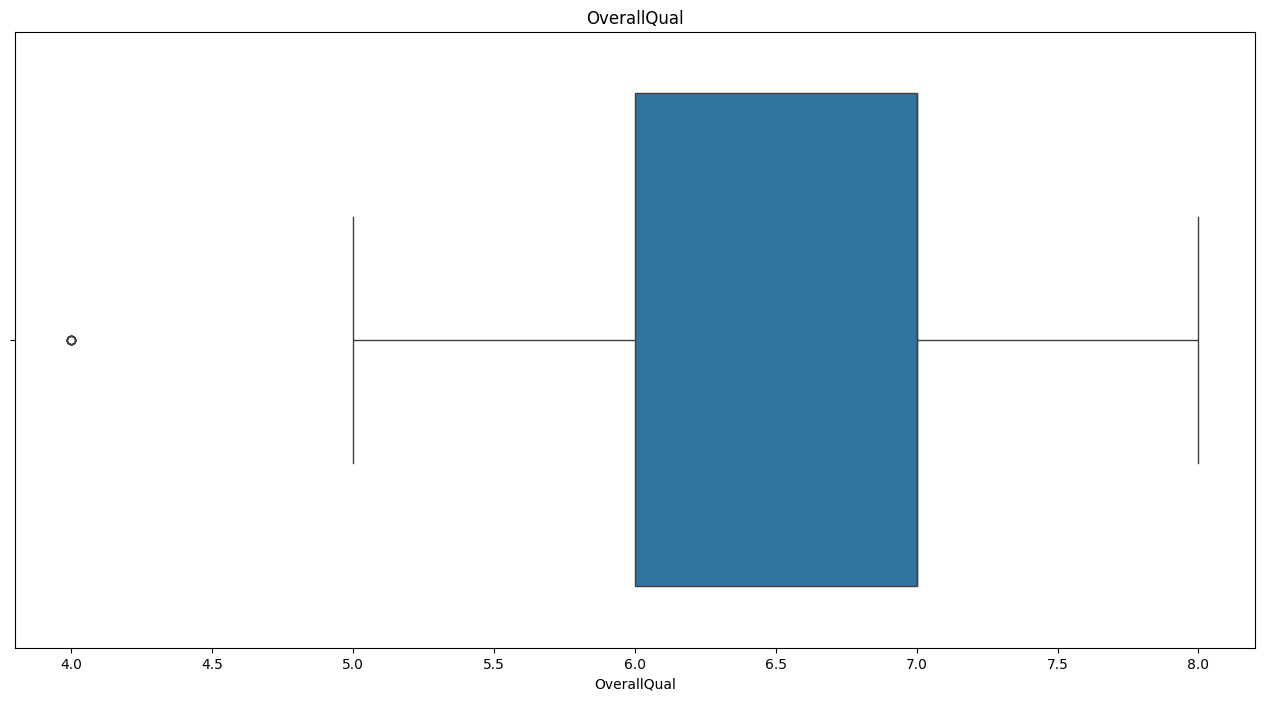

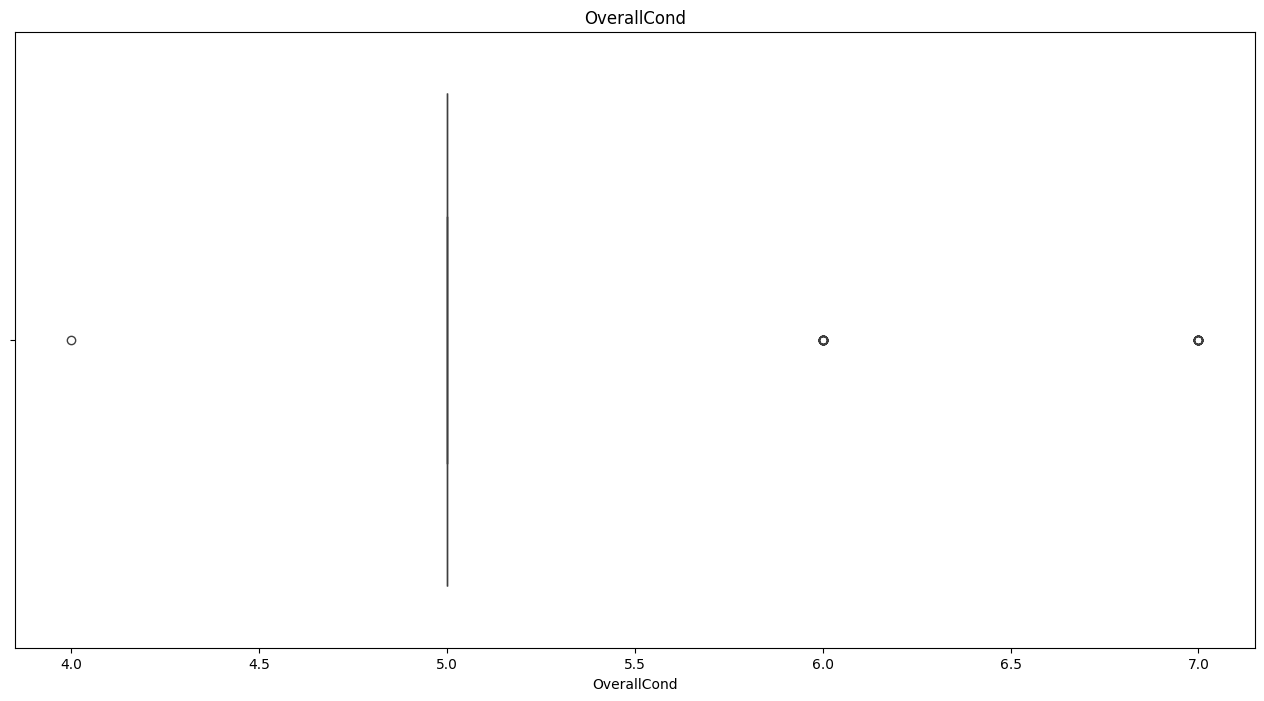

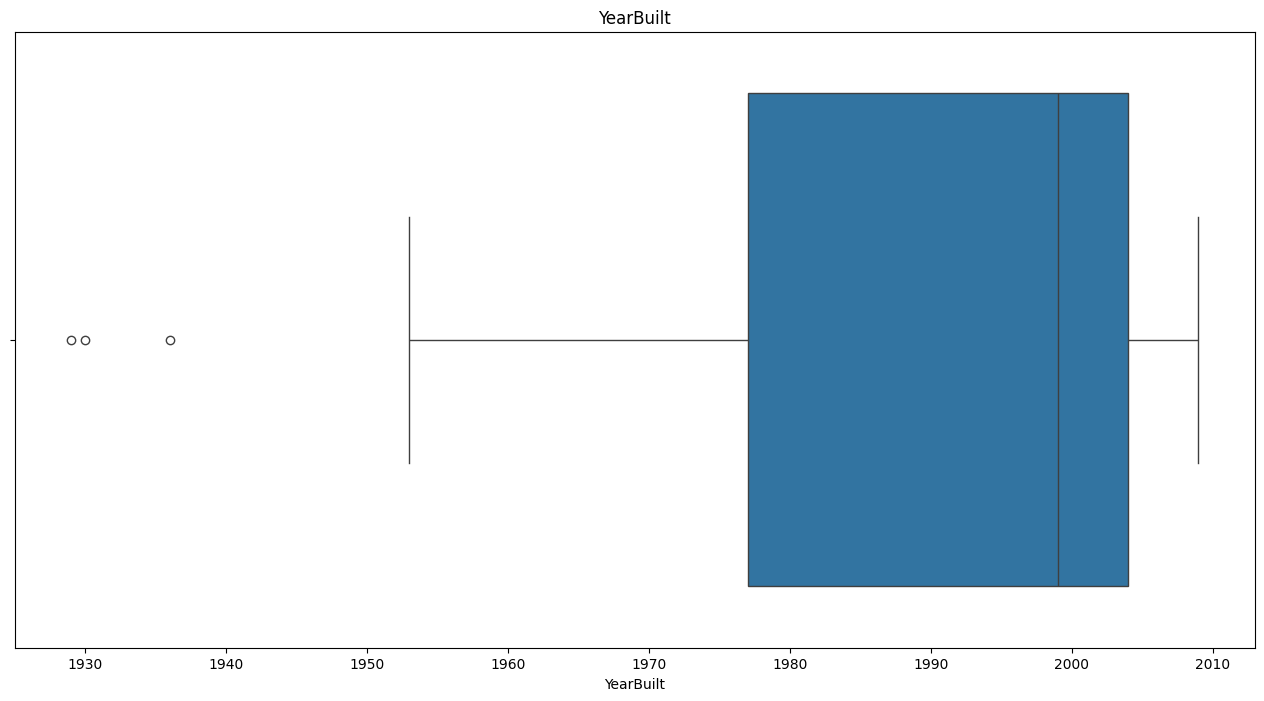

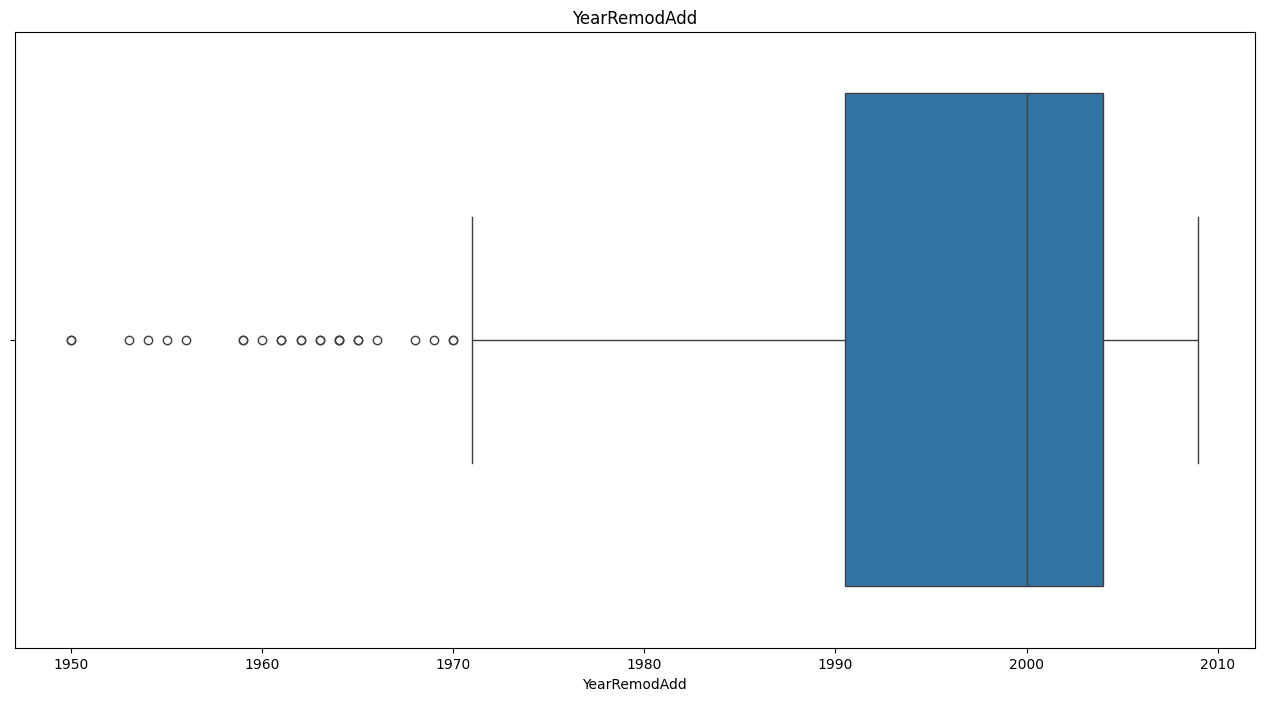

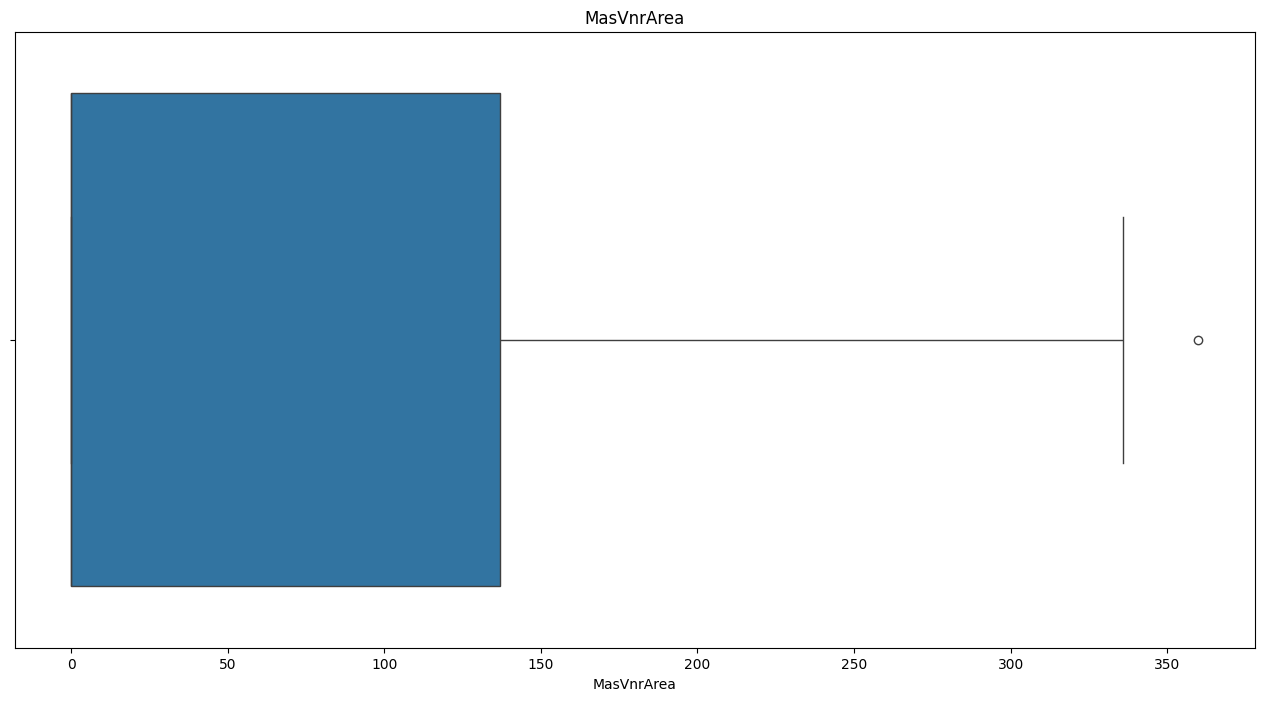

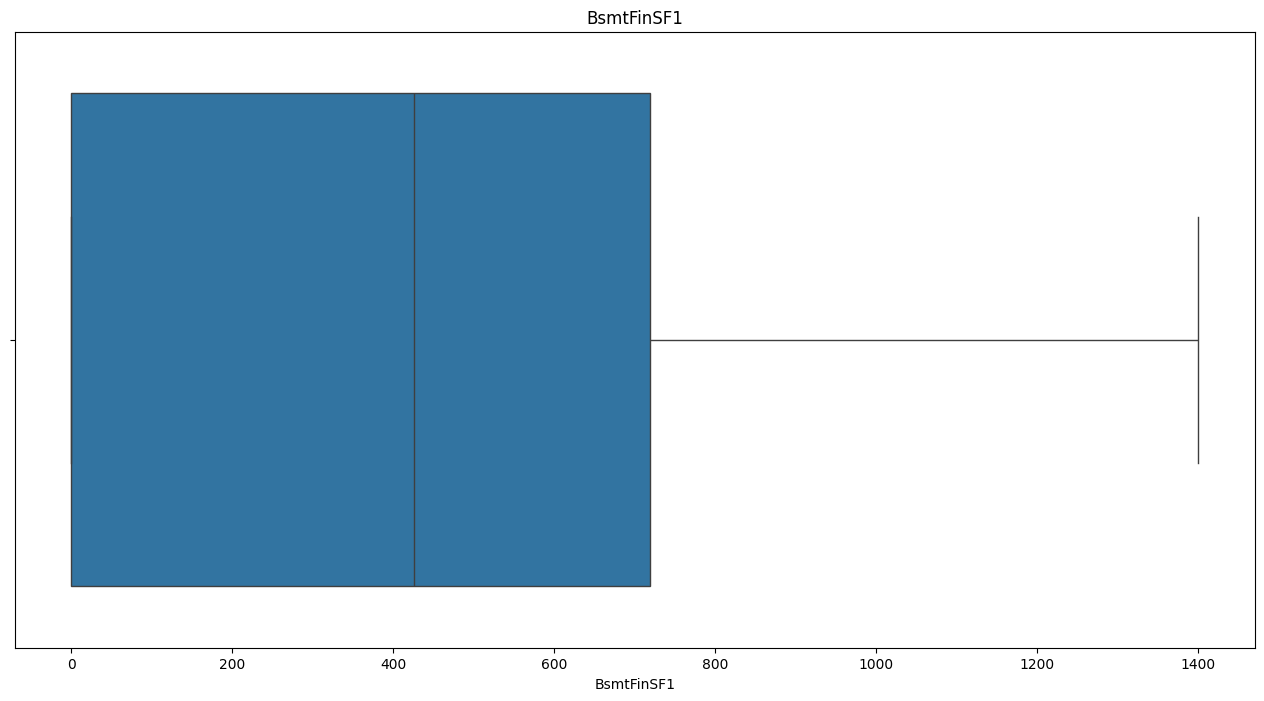

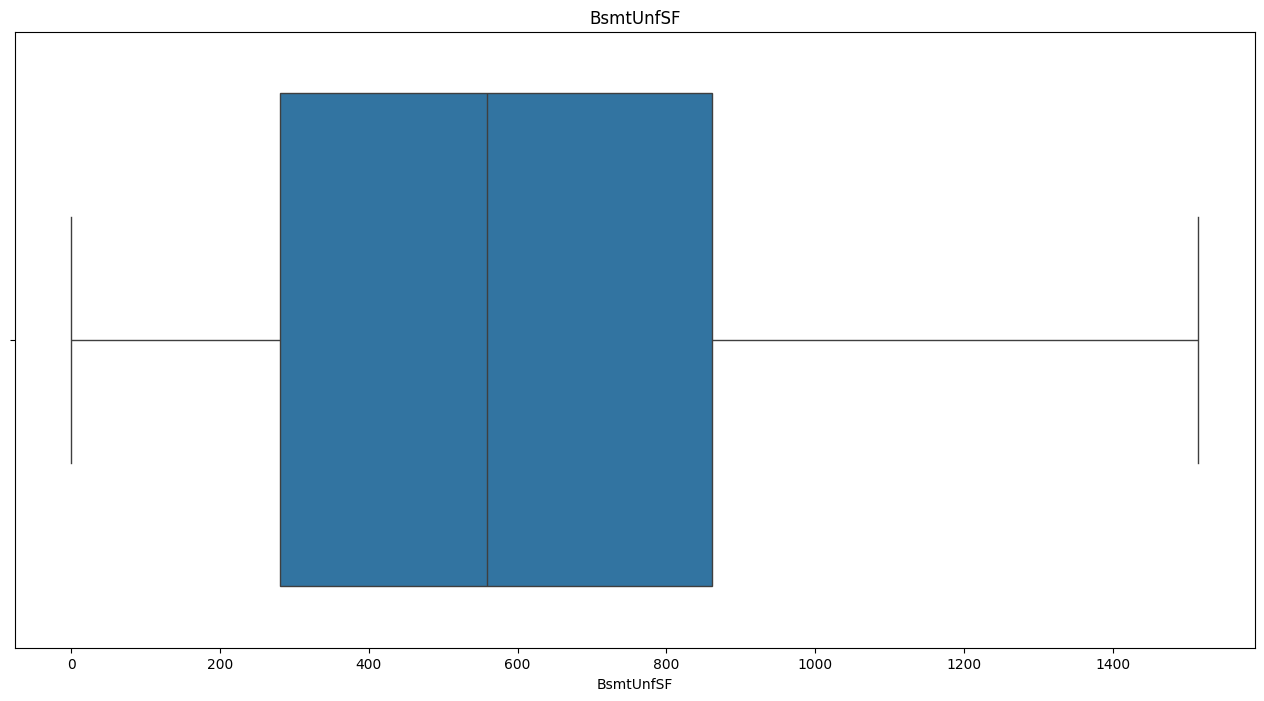

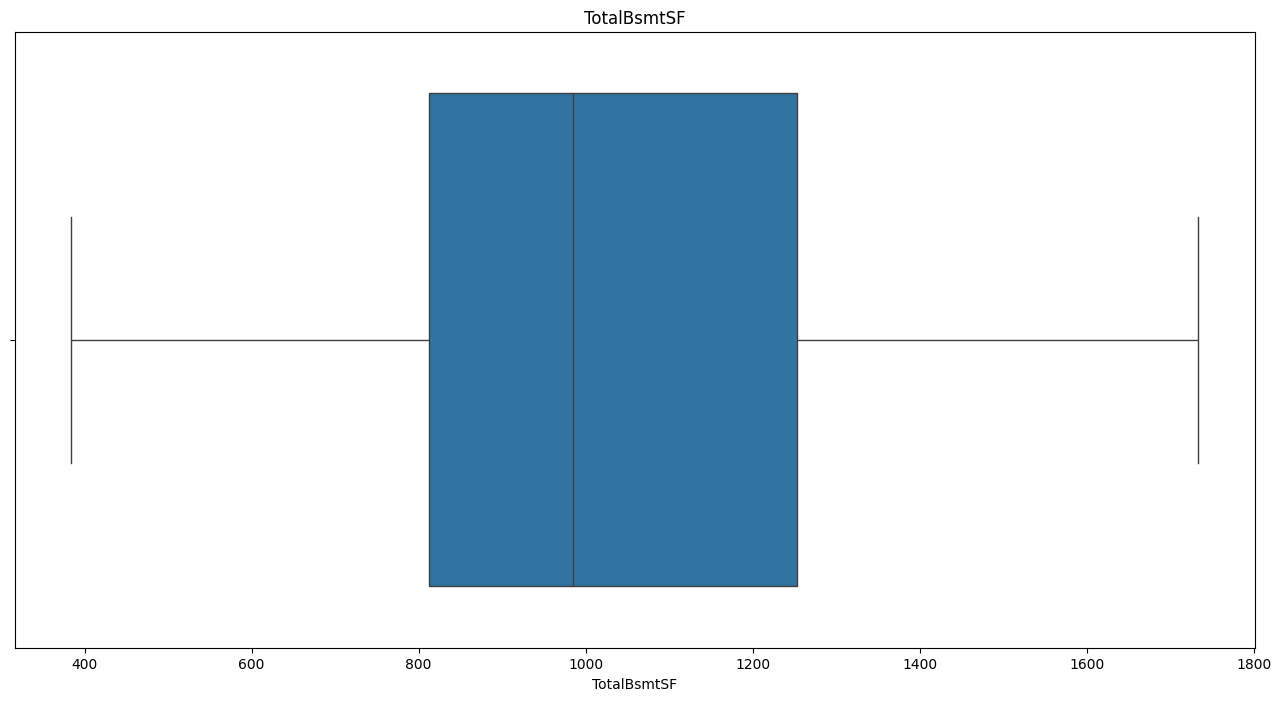

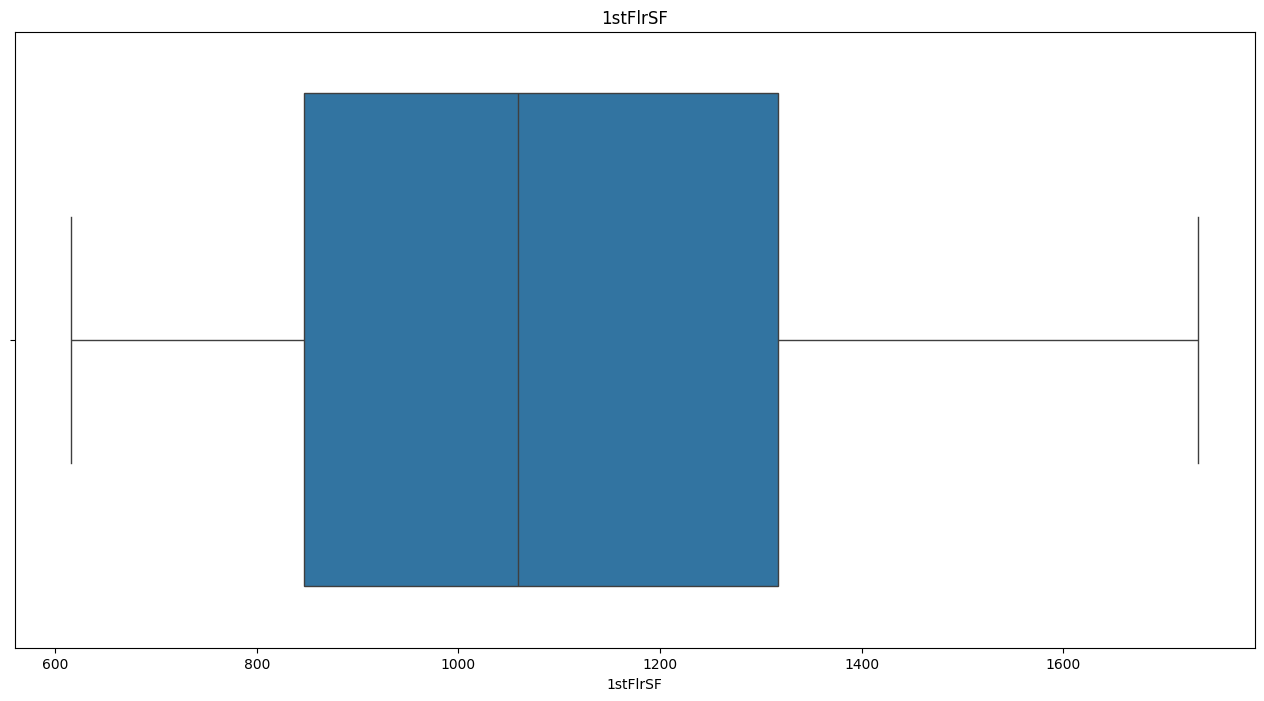

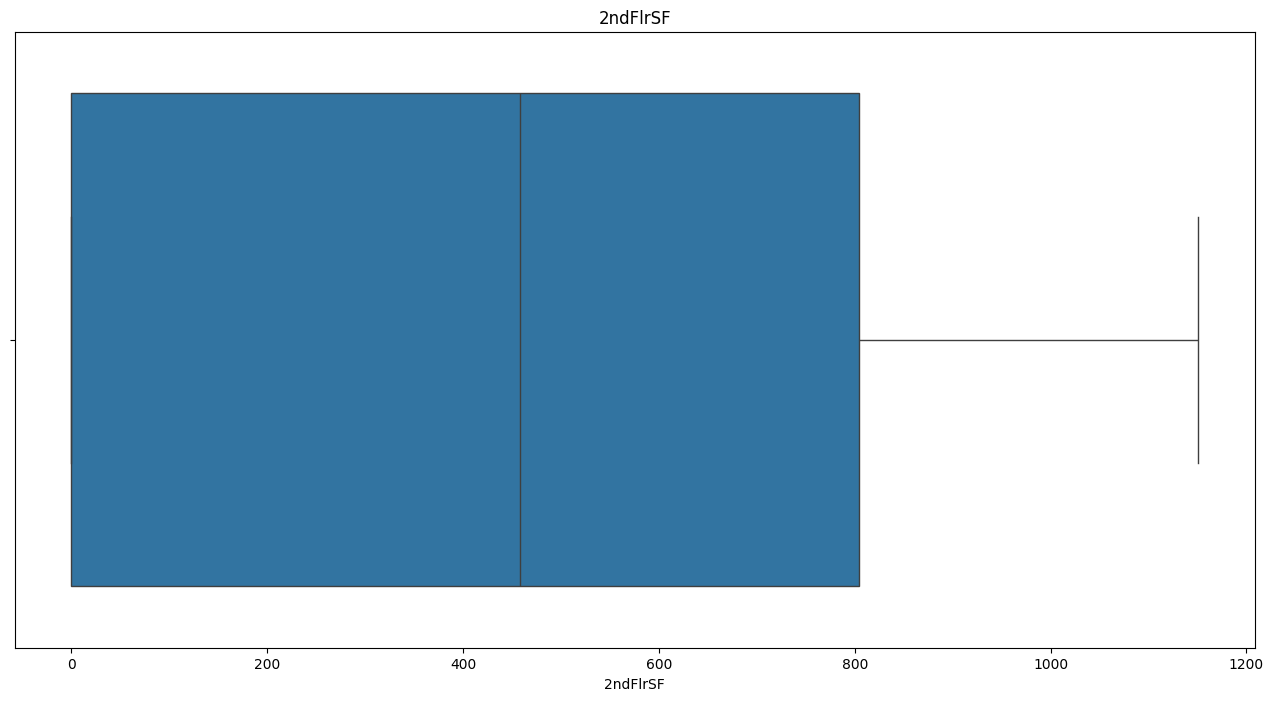

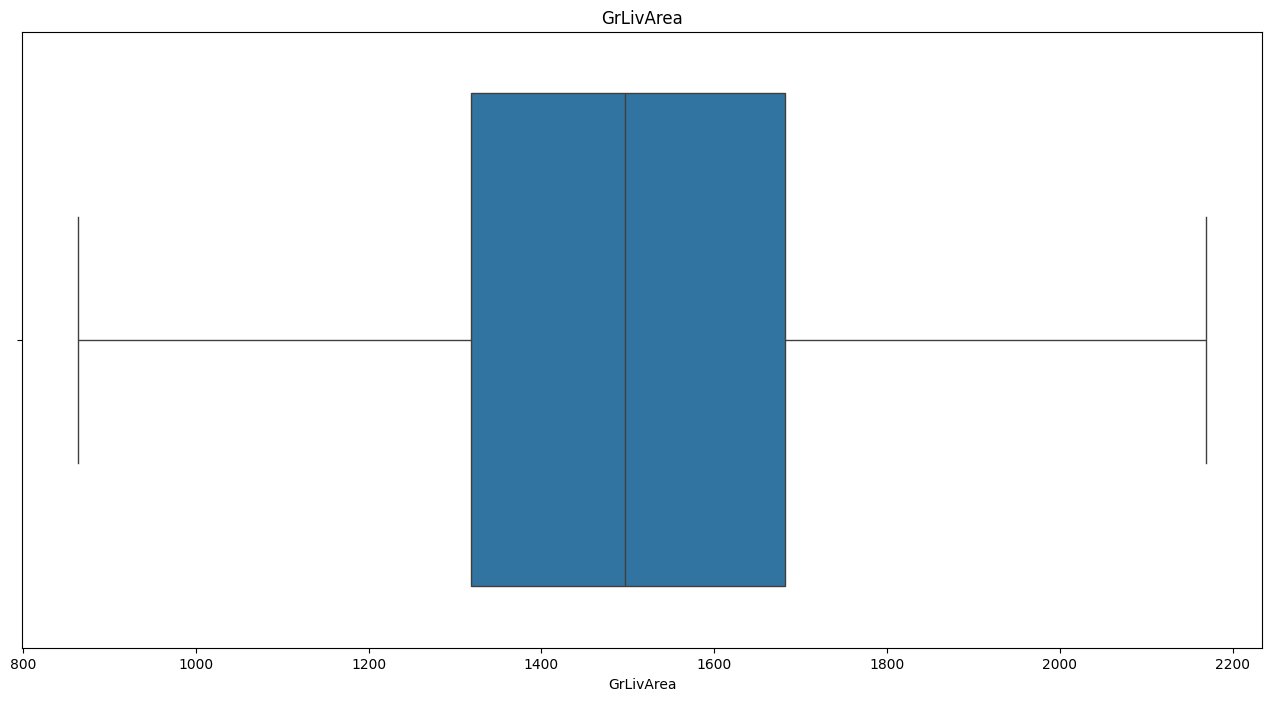

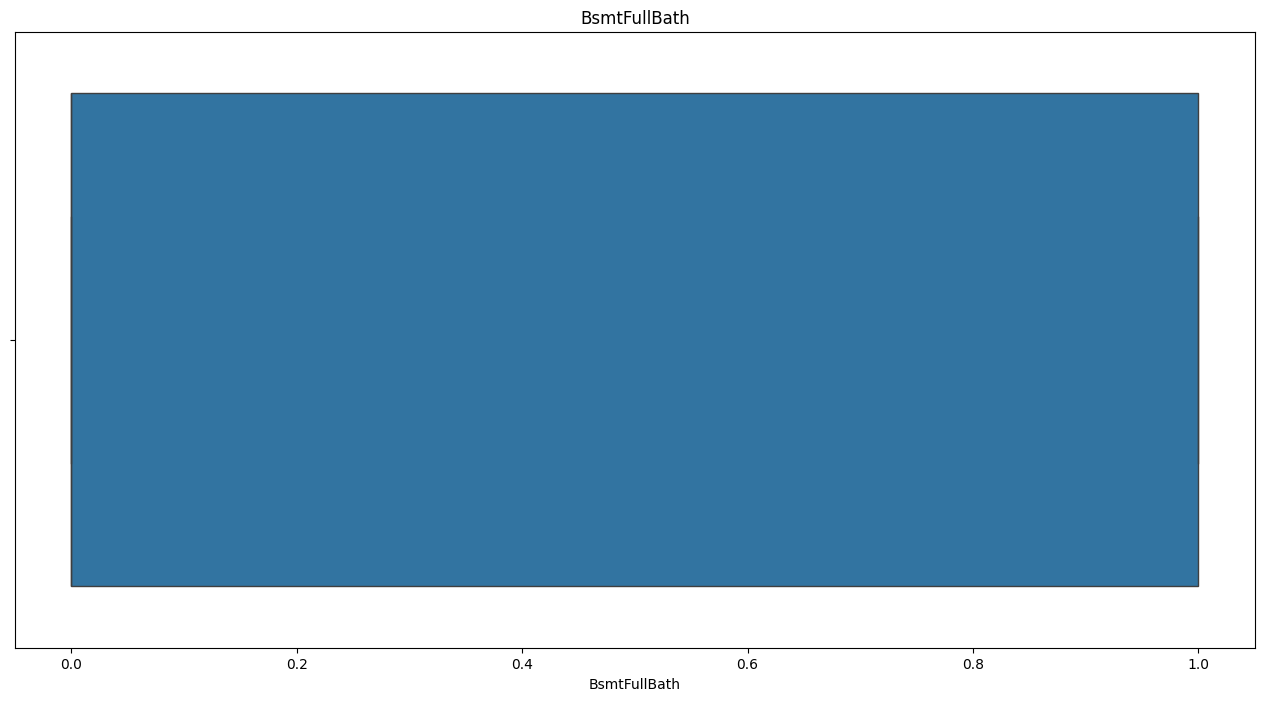

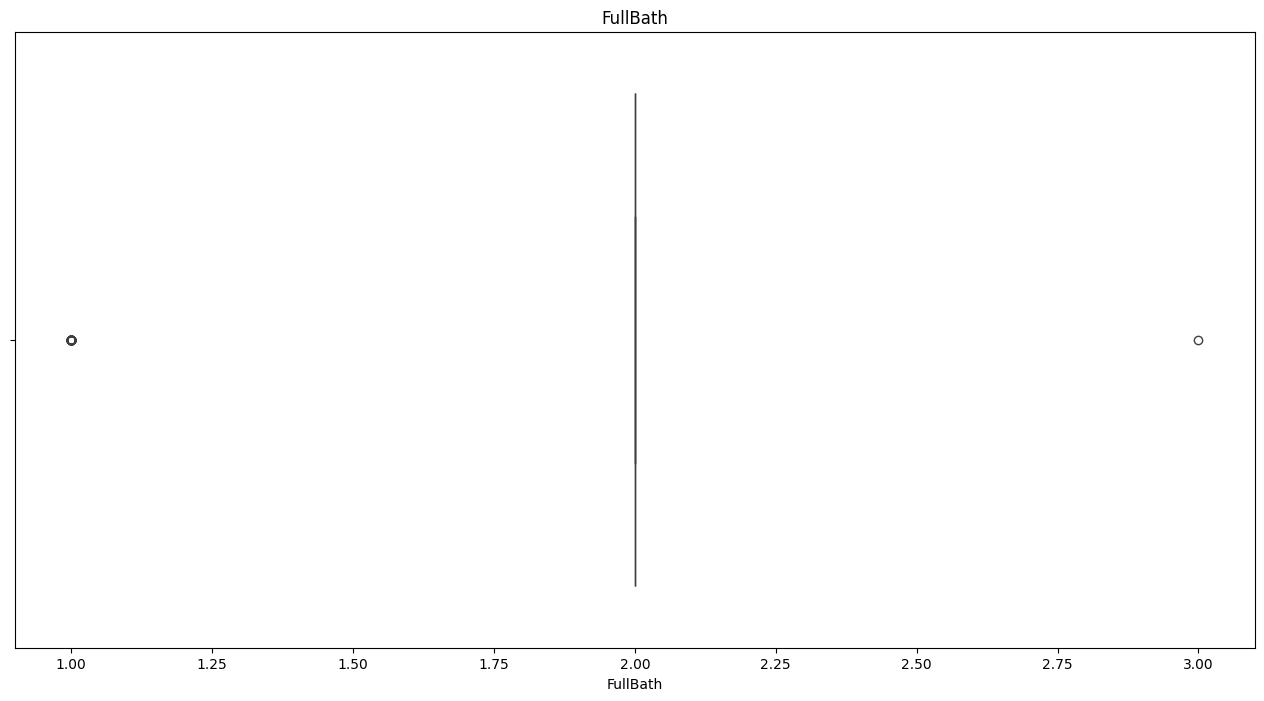

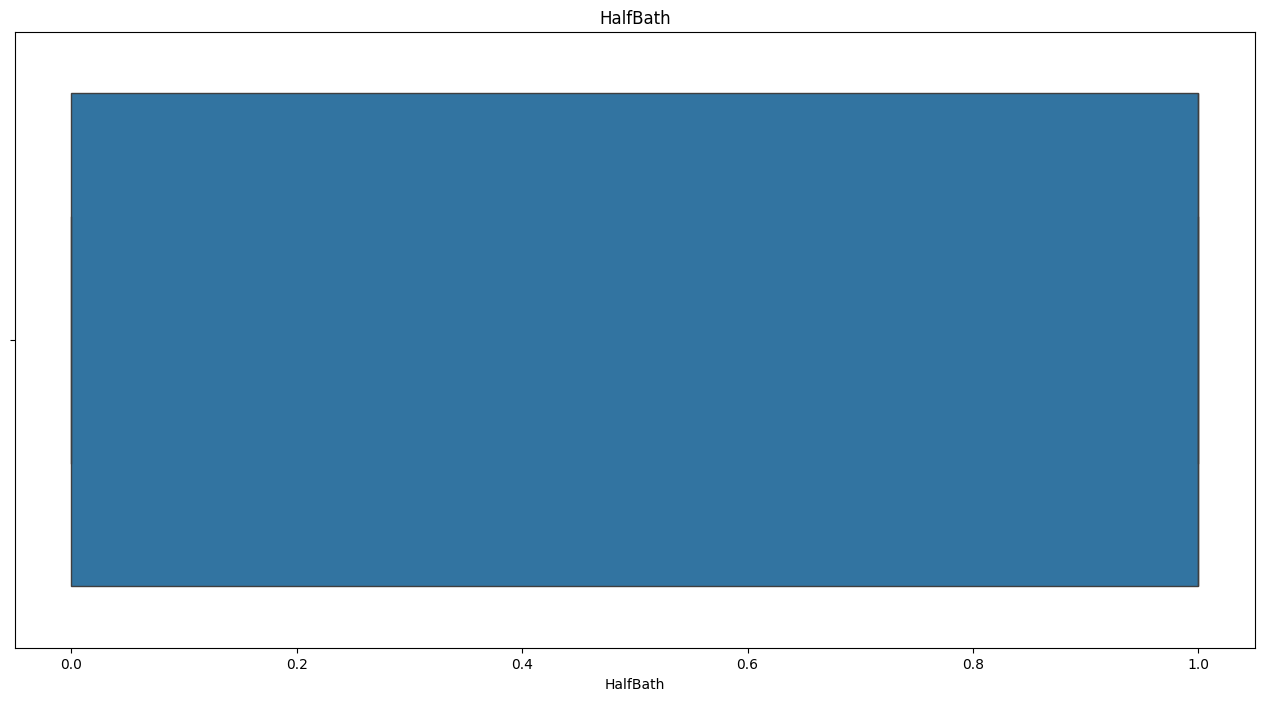

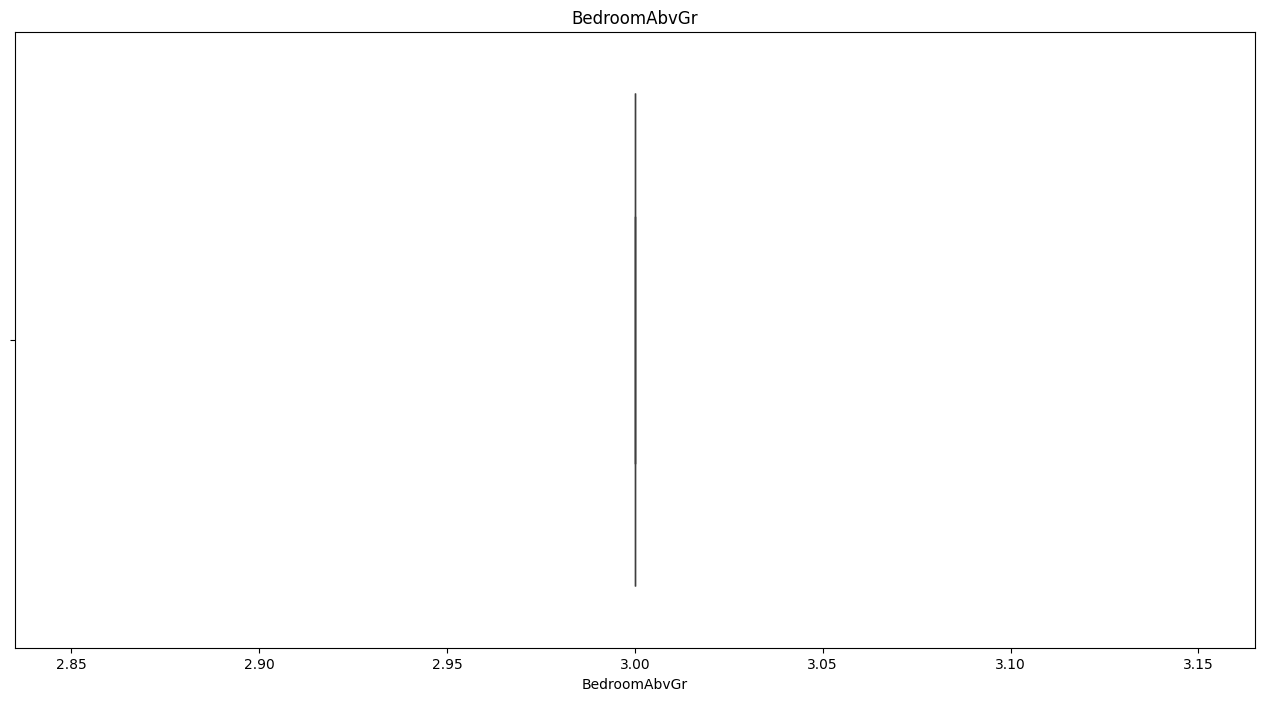

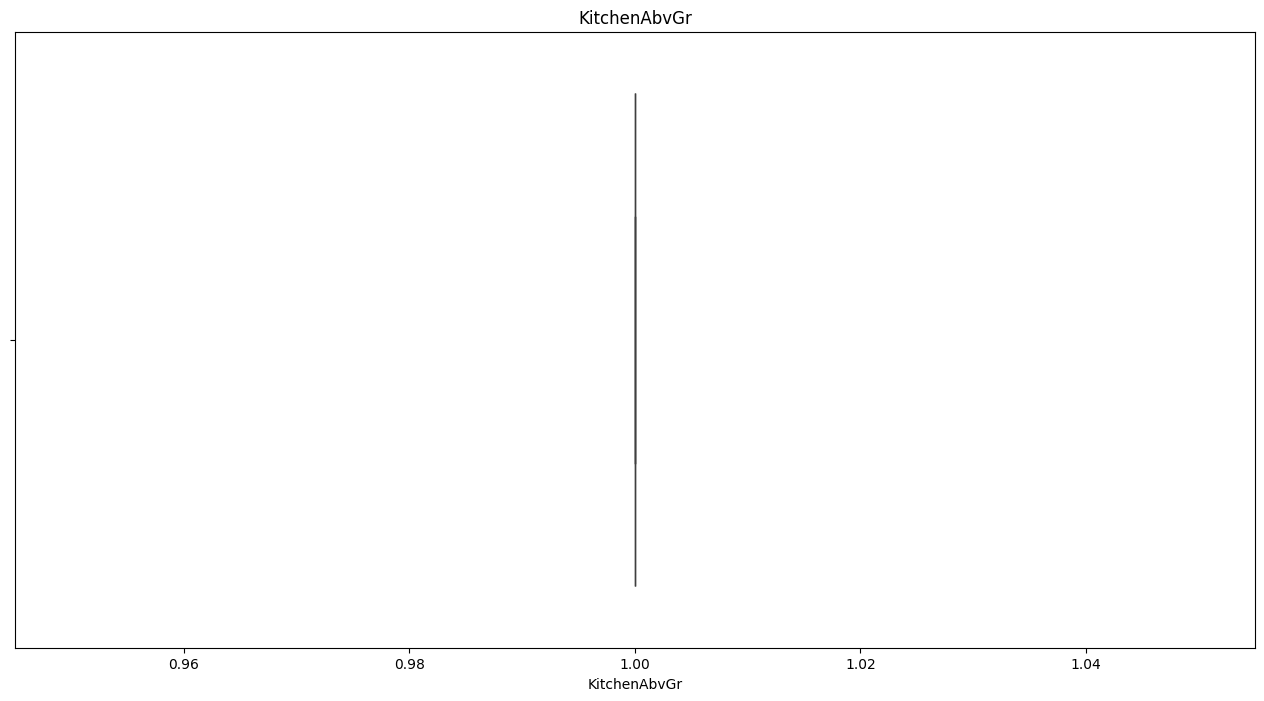

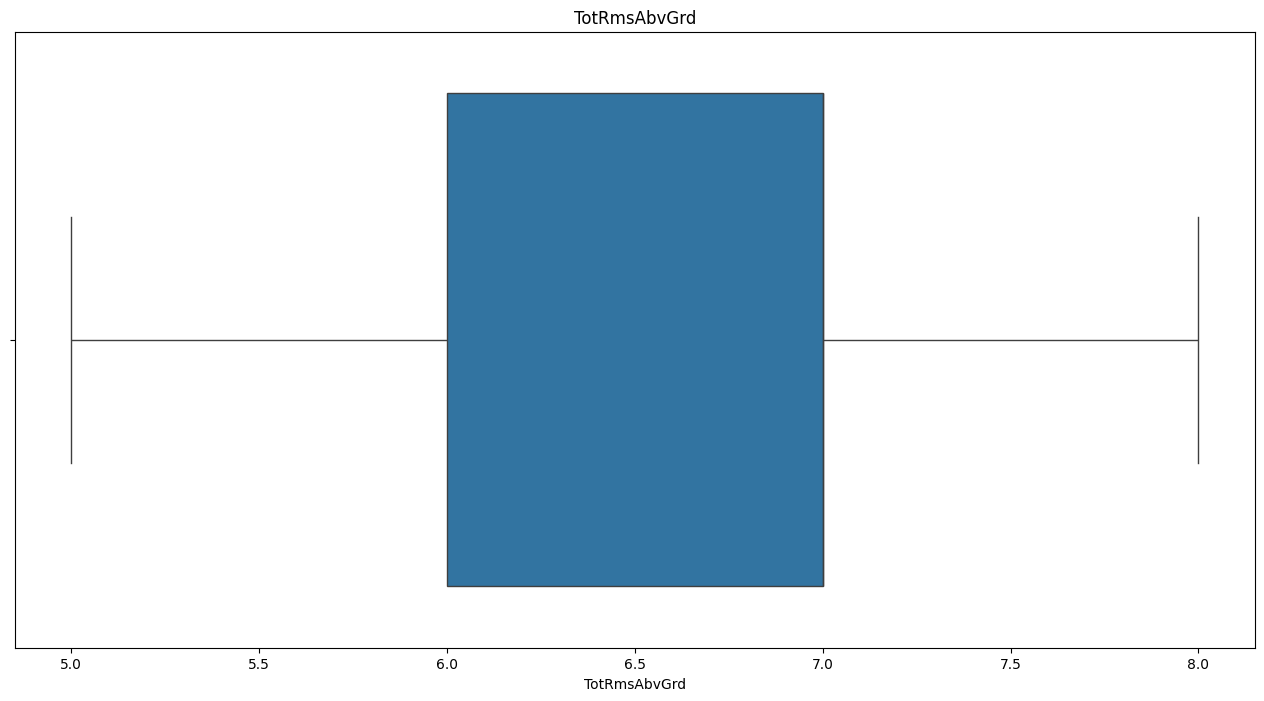

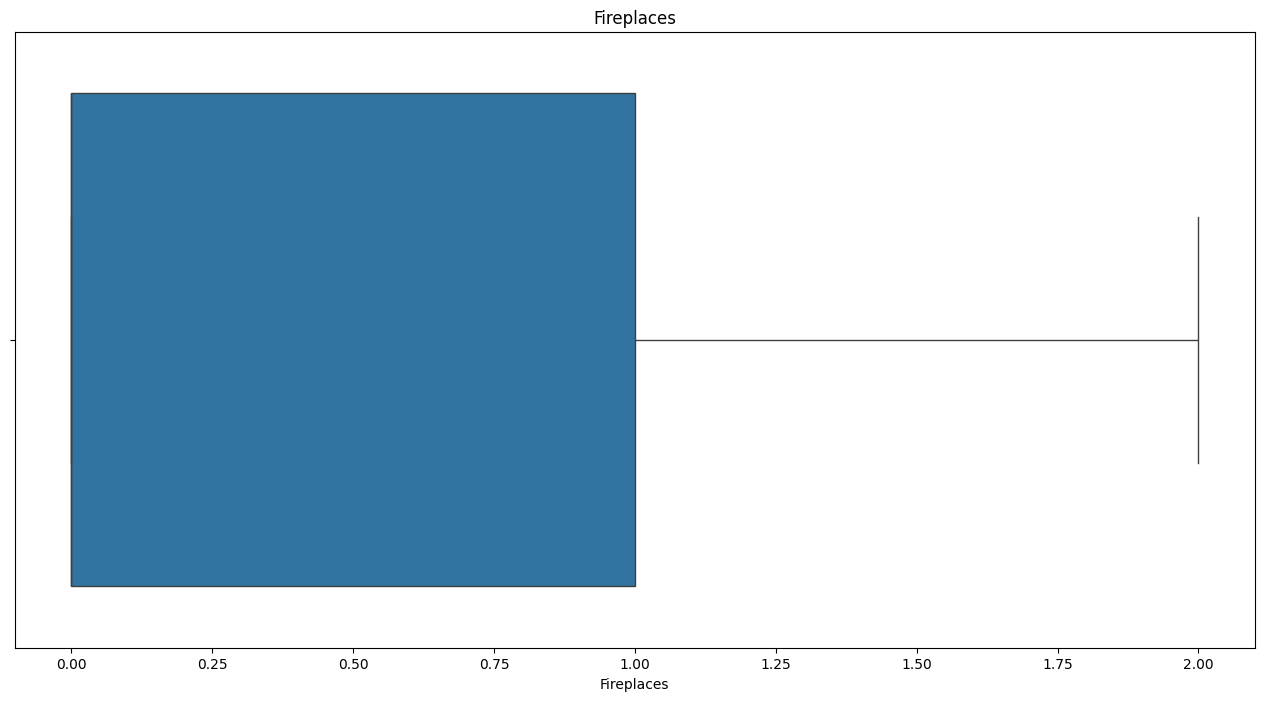

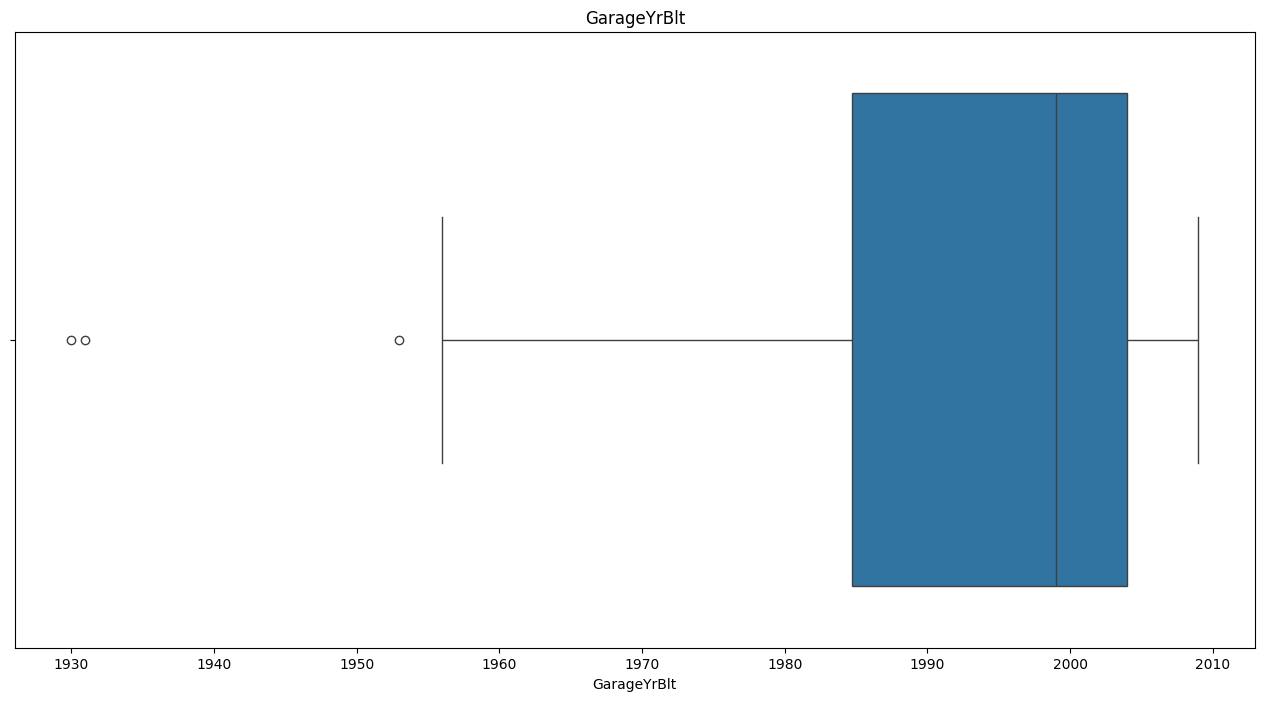

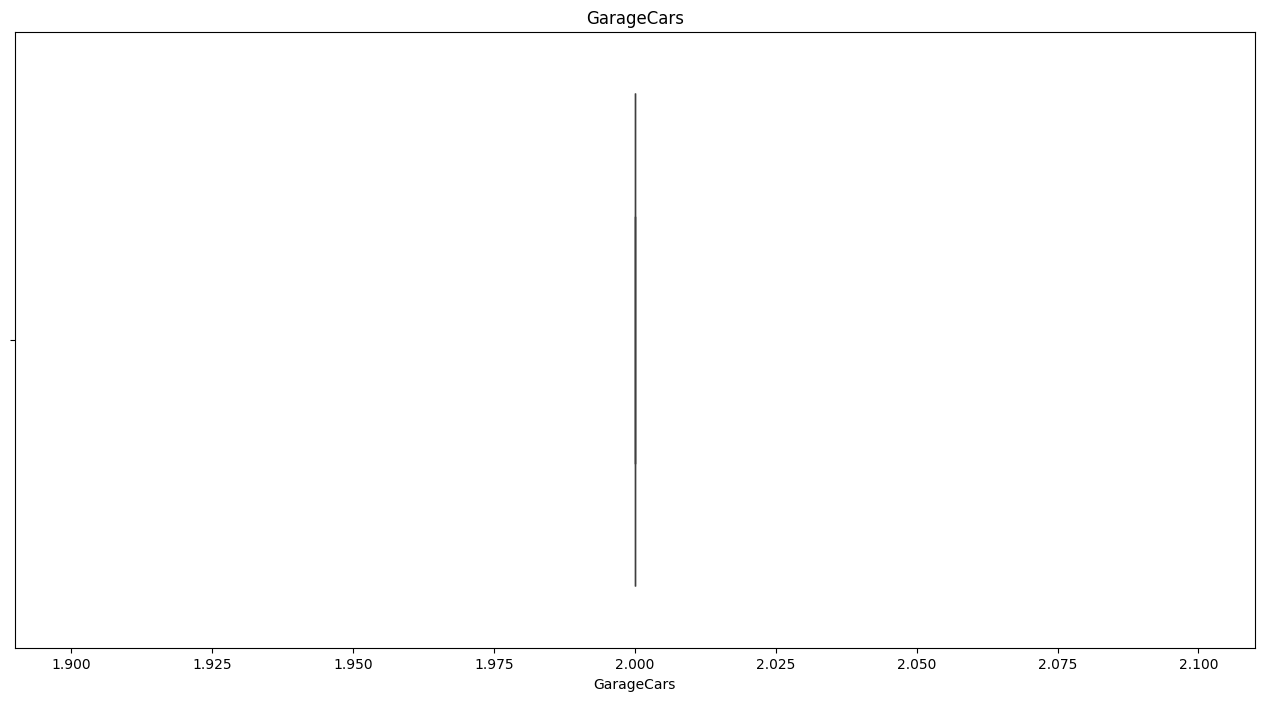

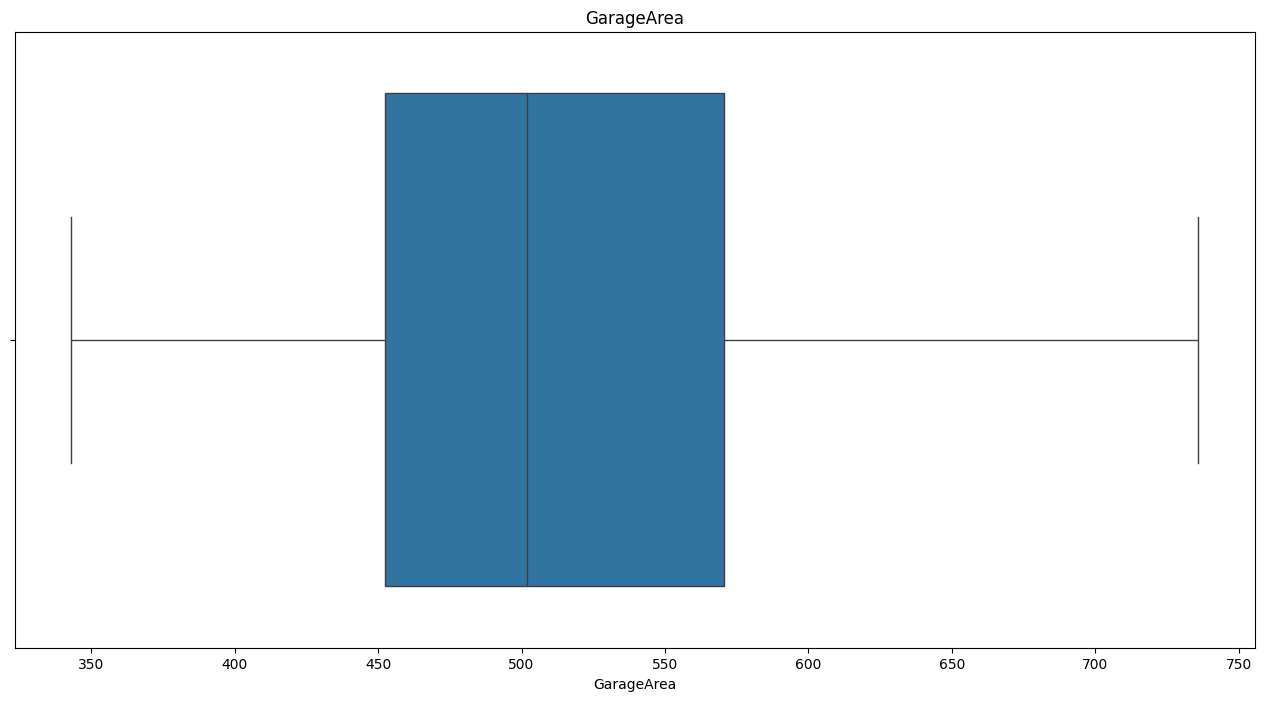

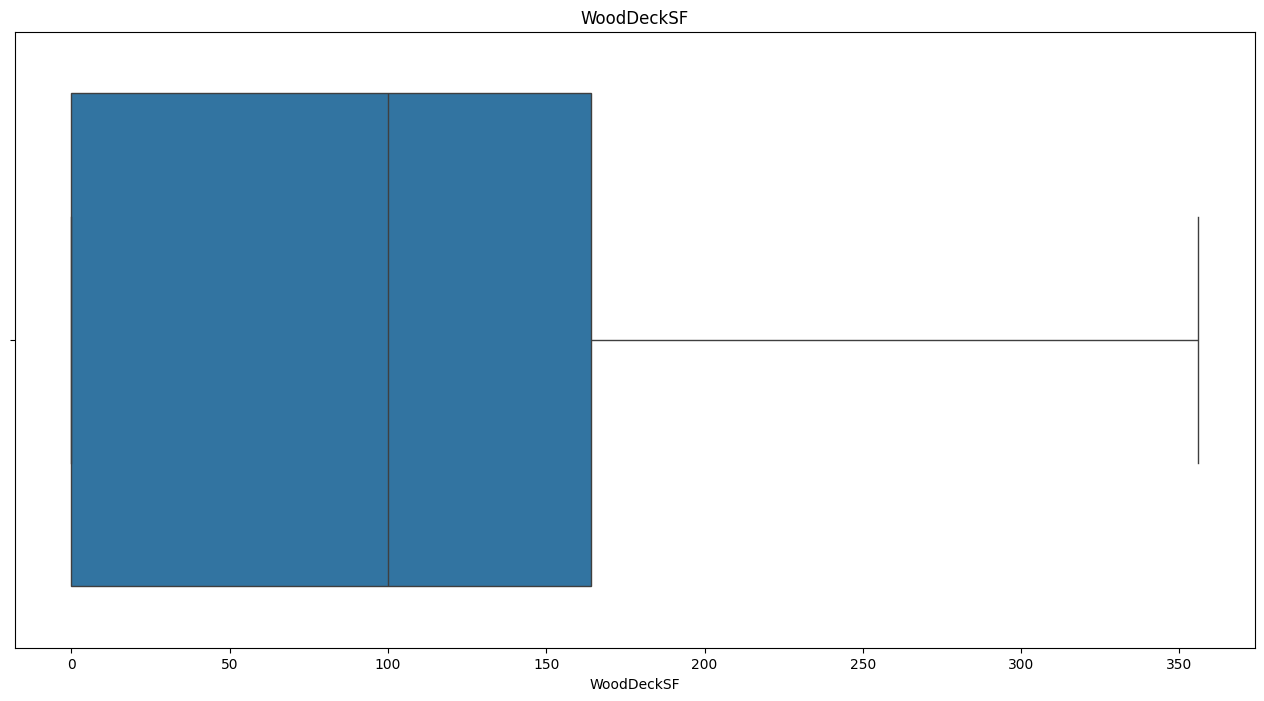

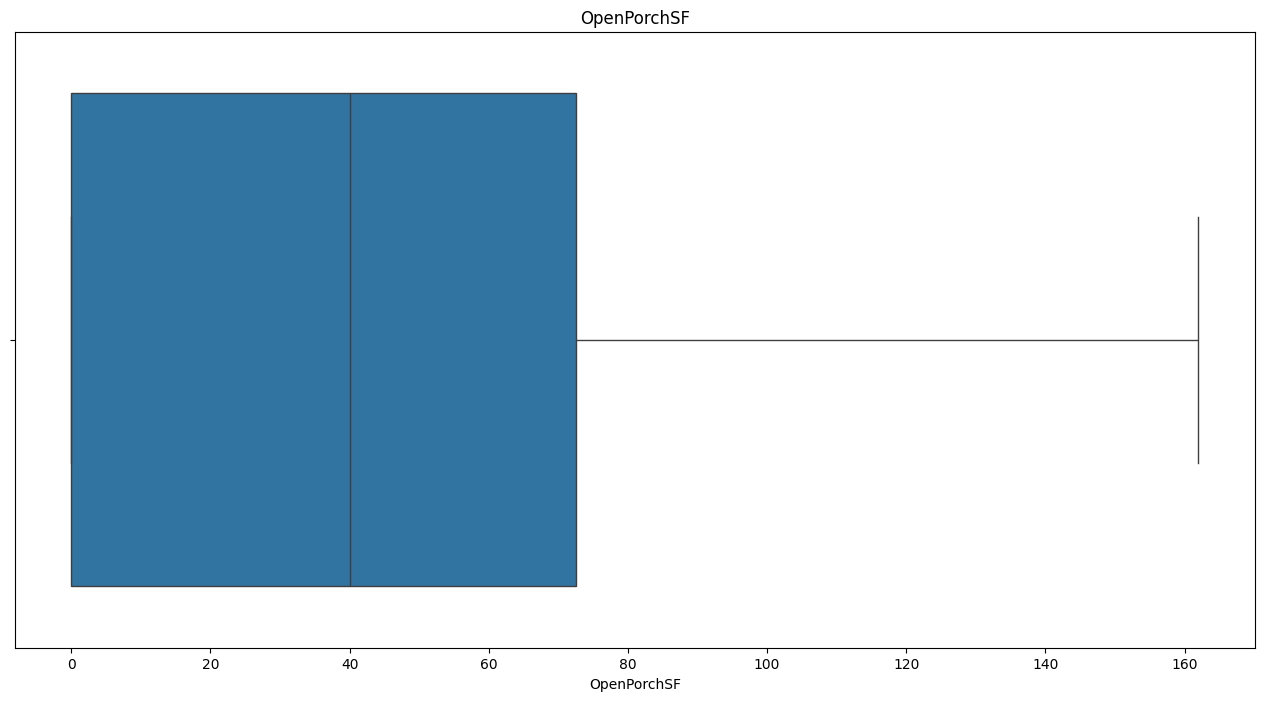

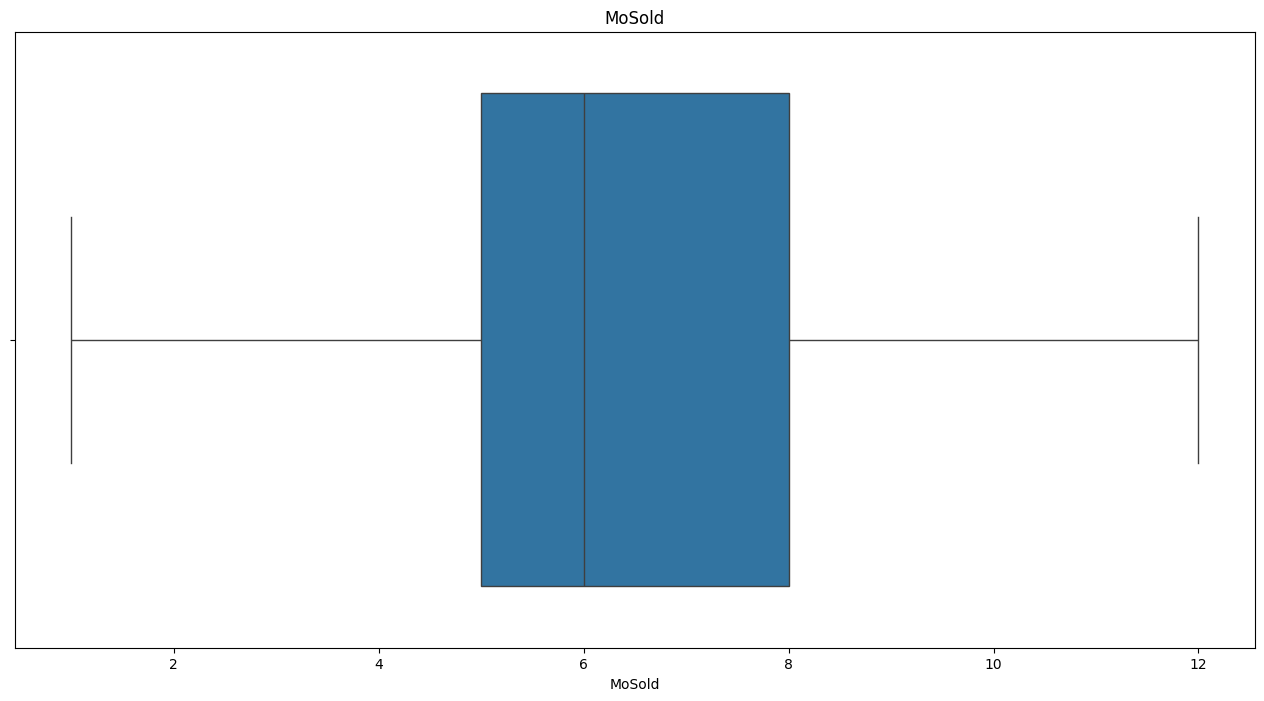

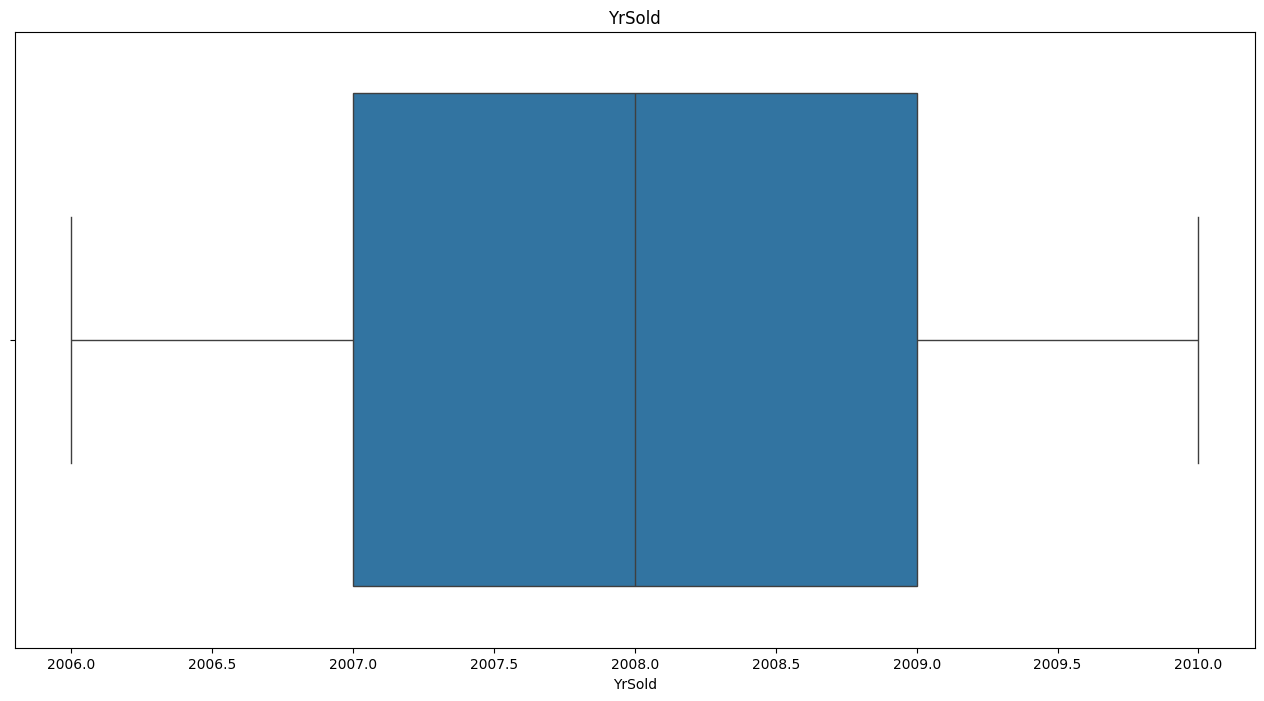

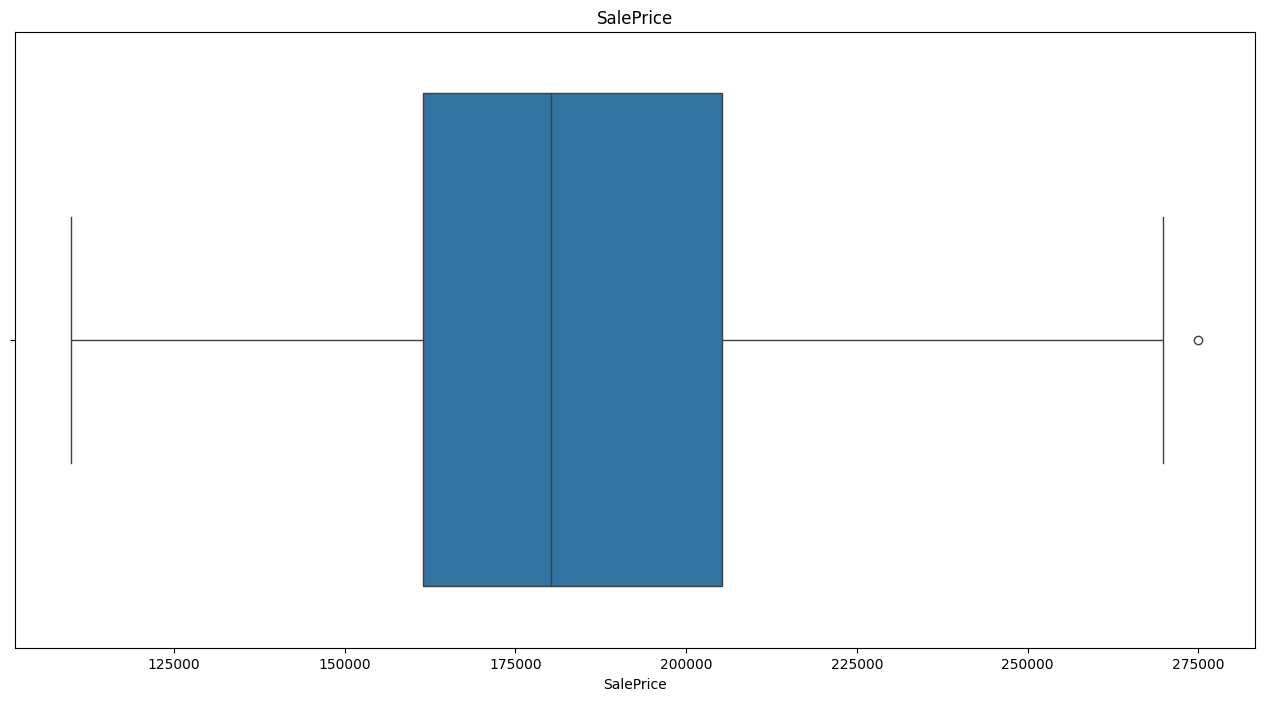

In [165]:
def check_outliers(df, col):
    fig, ax = plt.subplots(figsize=(16, 8))

    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(f"{col}")
    plt.show()


for col in df.select_dtypes(include='number').columns:
    check_outliers(df, col)

#### Compare between detecting outliers using Z-Score and IQR



### Is there a need to convert data types?

In [166]:

df.dtypes


Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 69, dtype: object

# Distrubtion Of Numerical Featuers

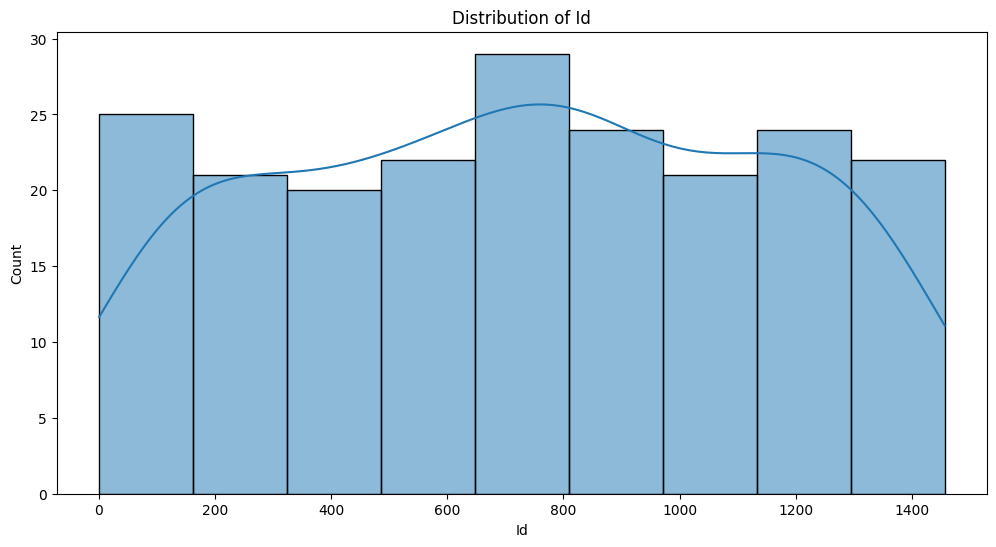

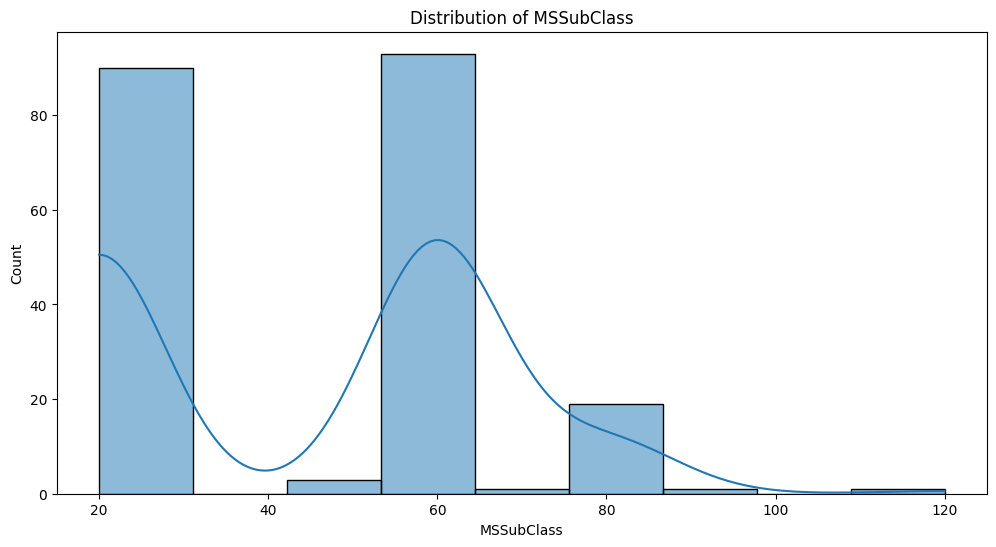

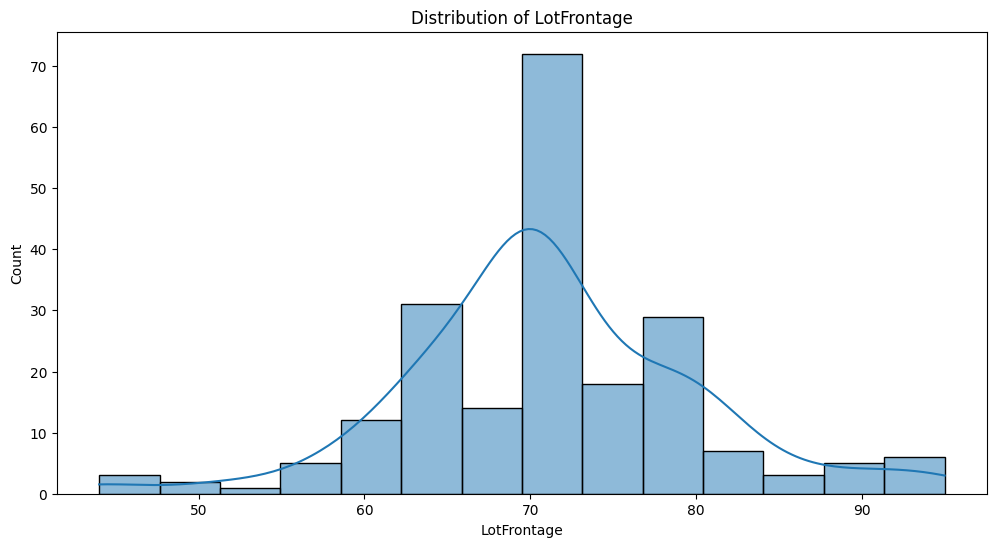

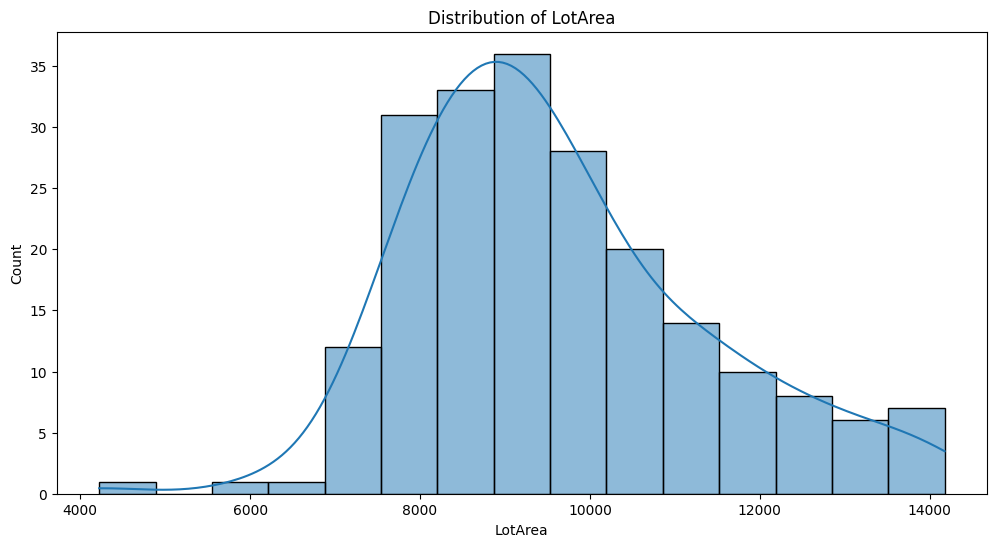

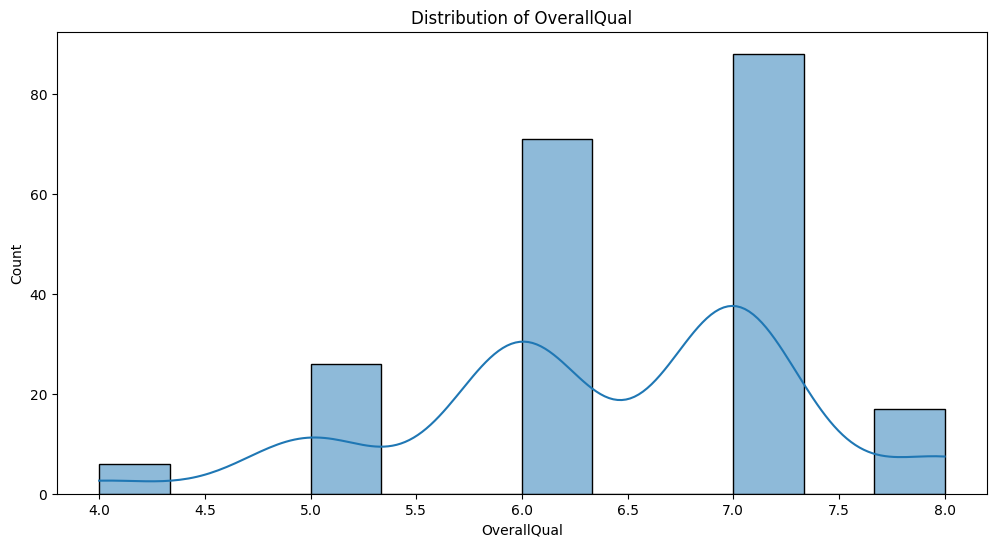

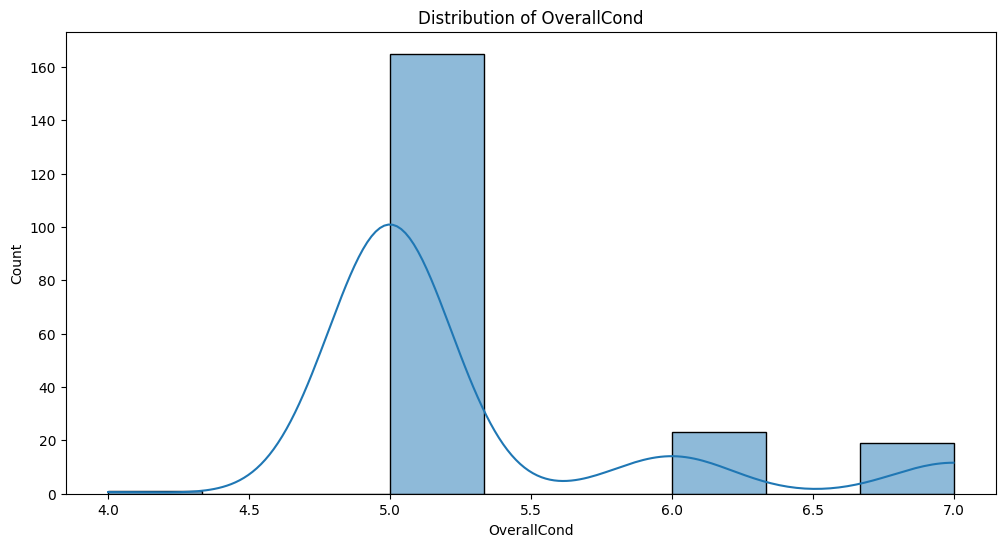

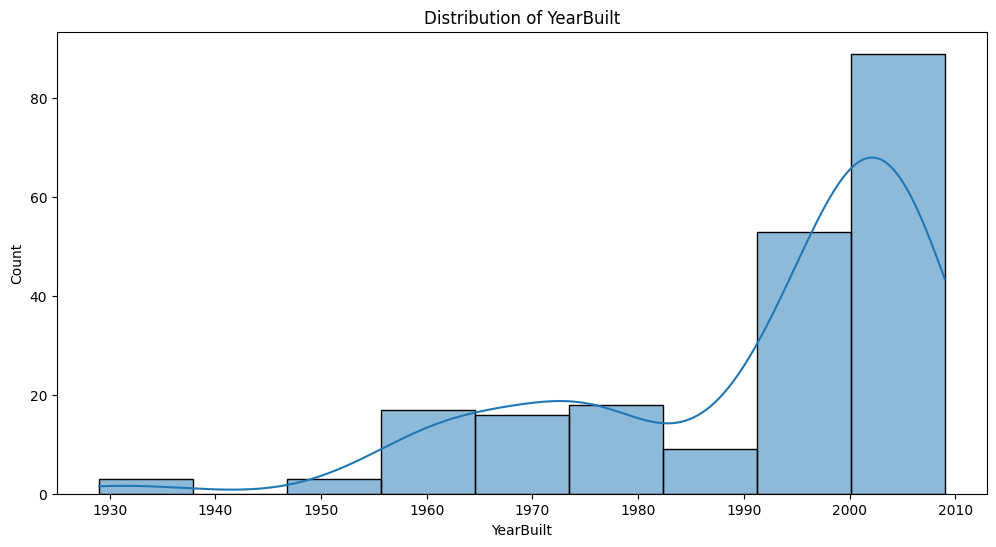

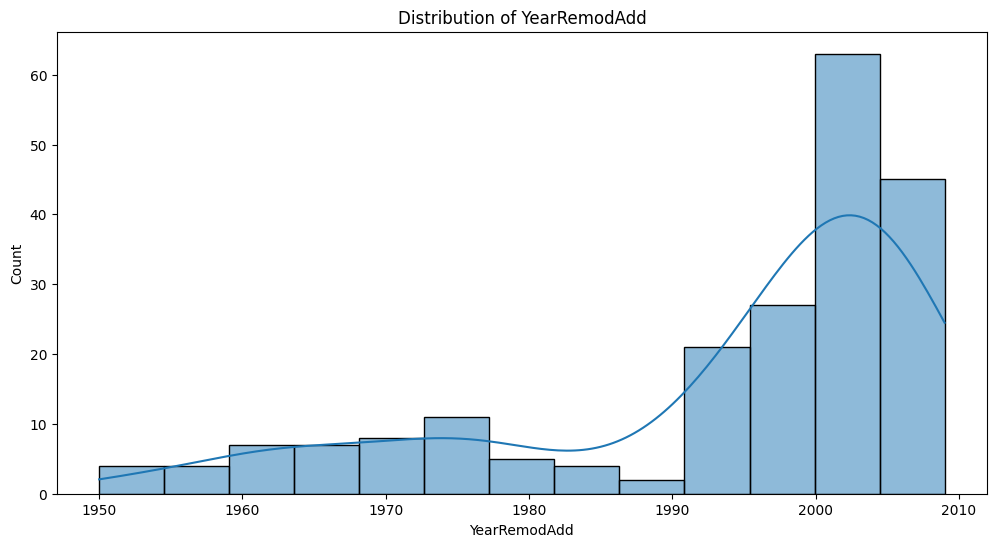

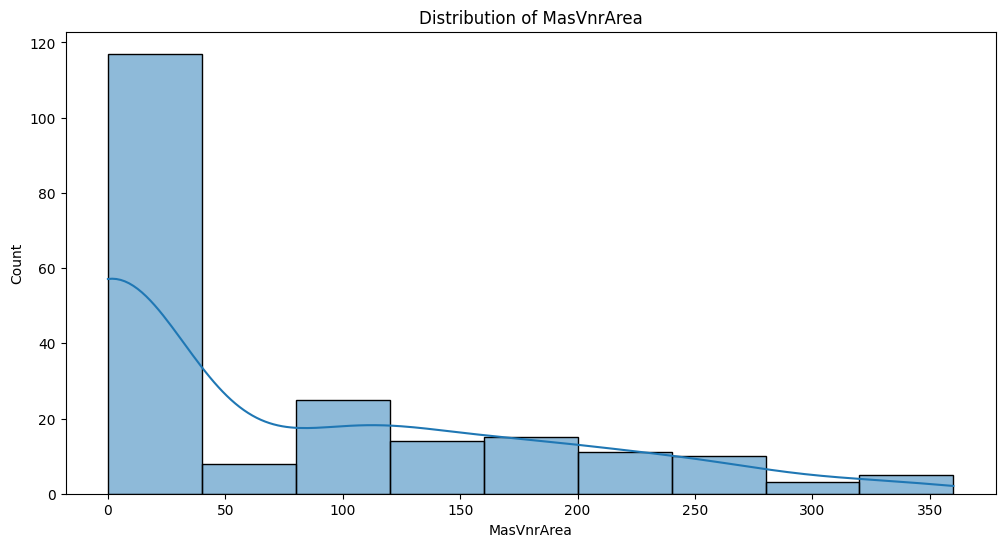

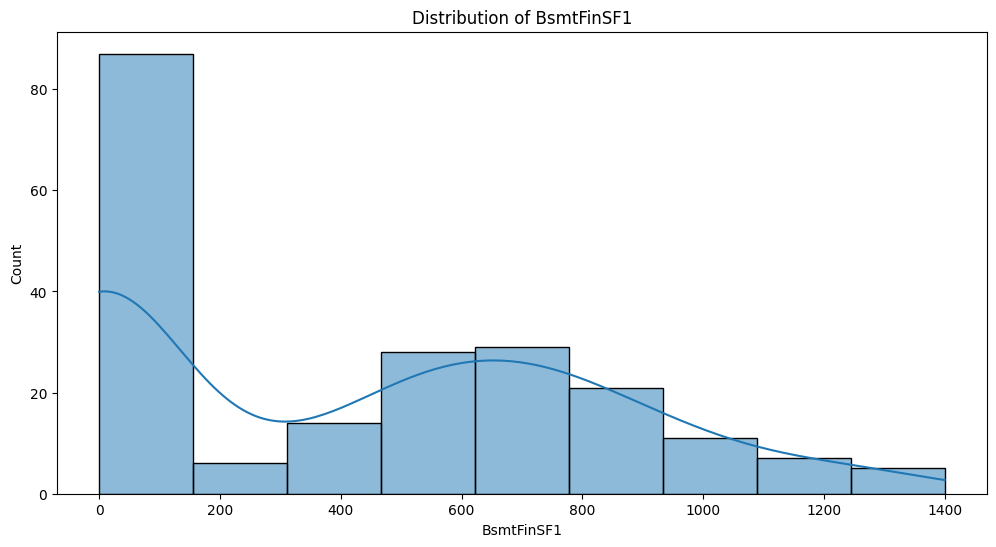

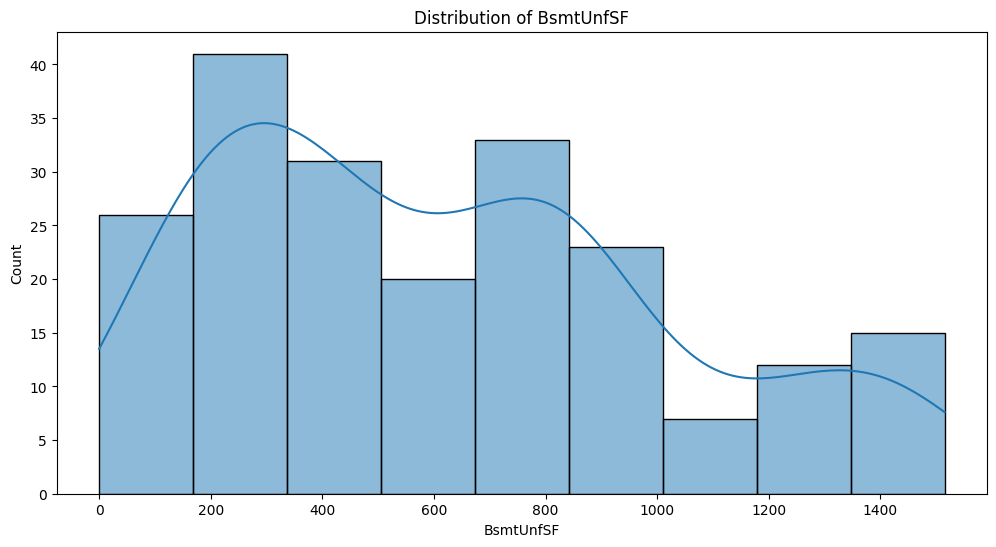

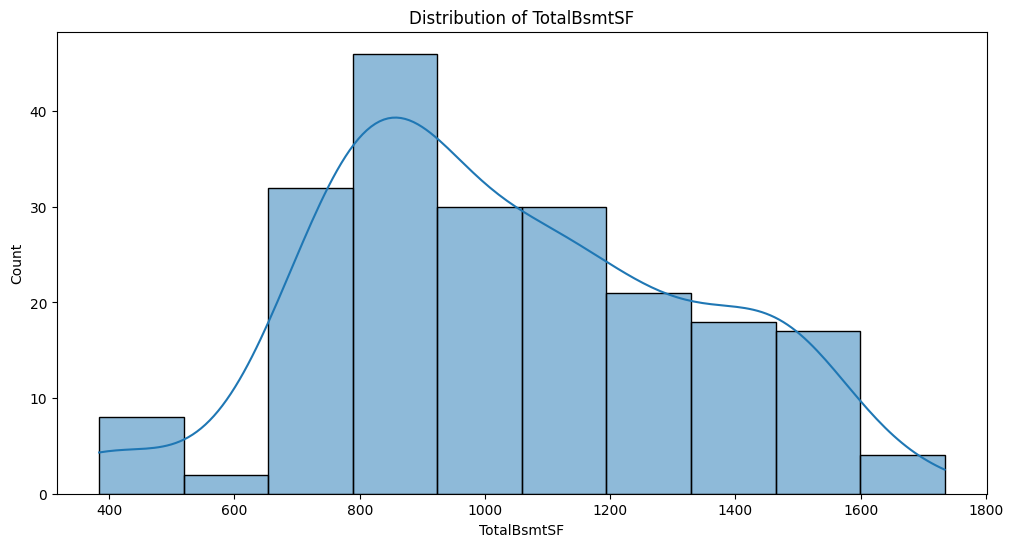

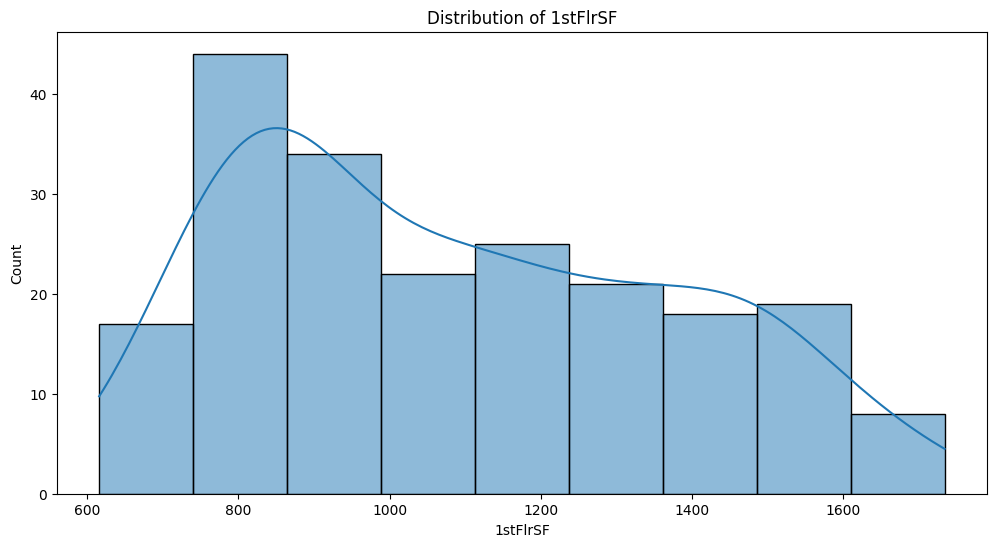

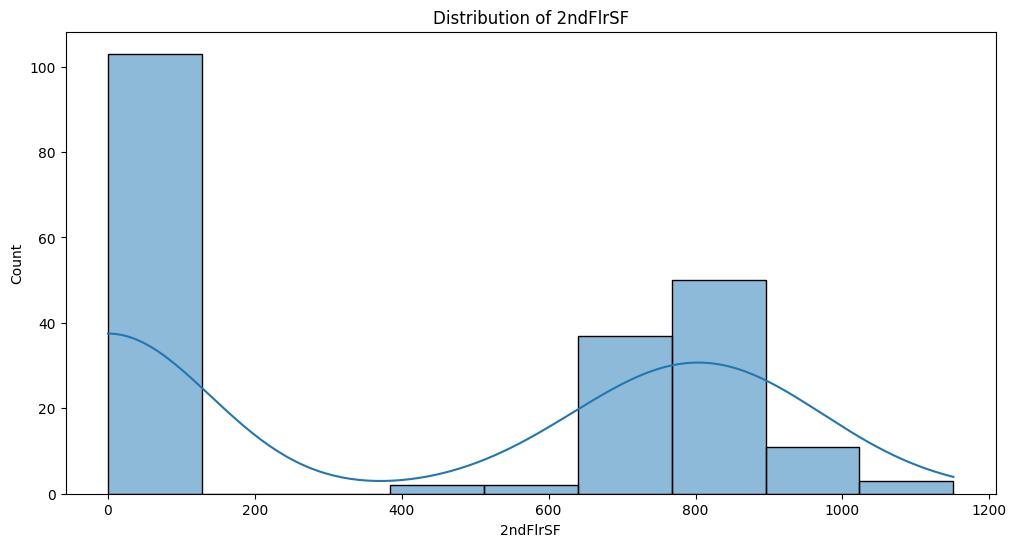

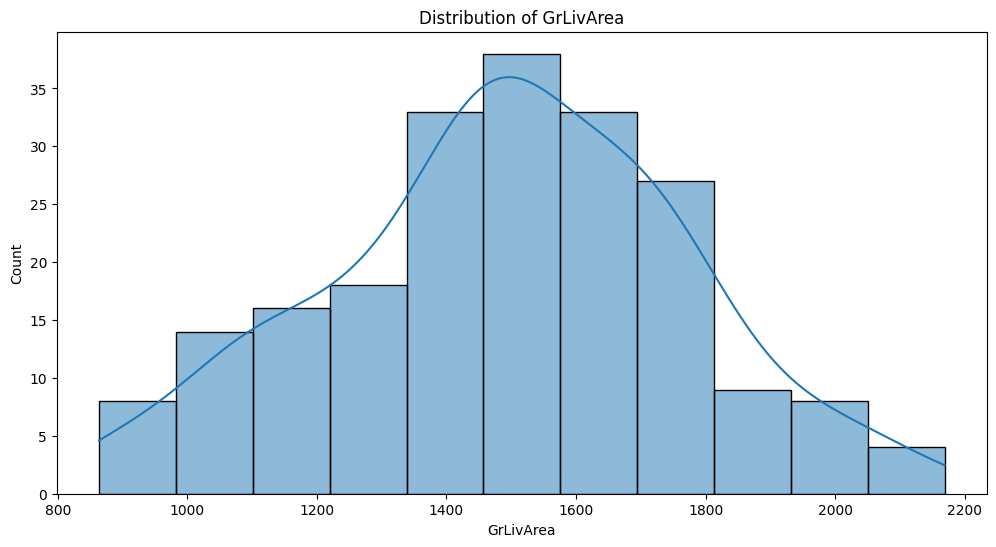

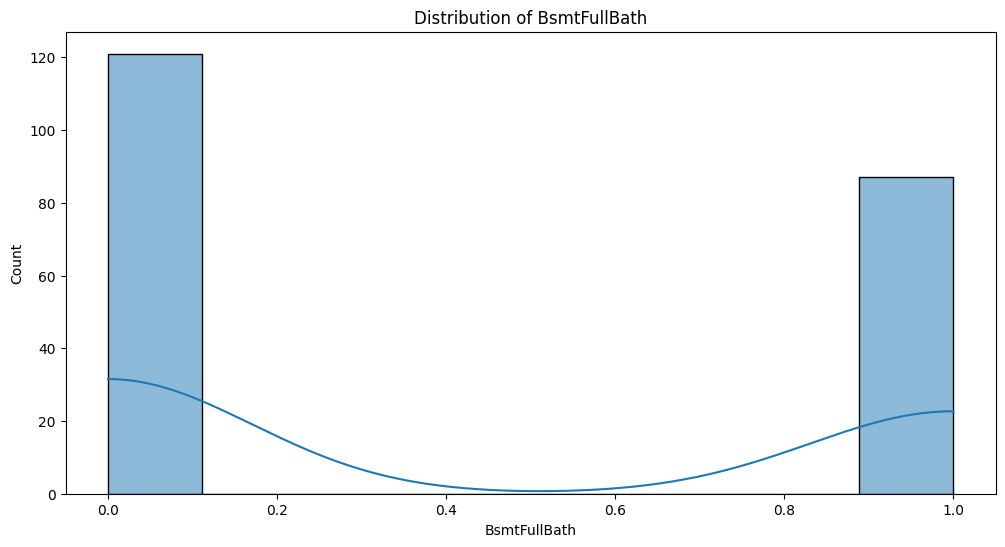

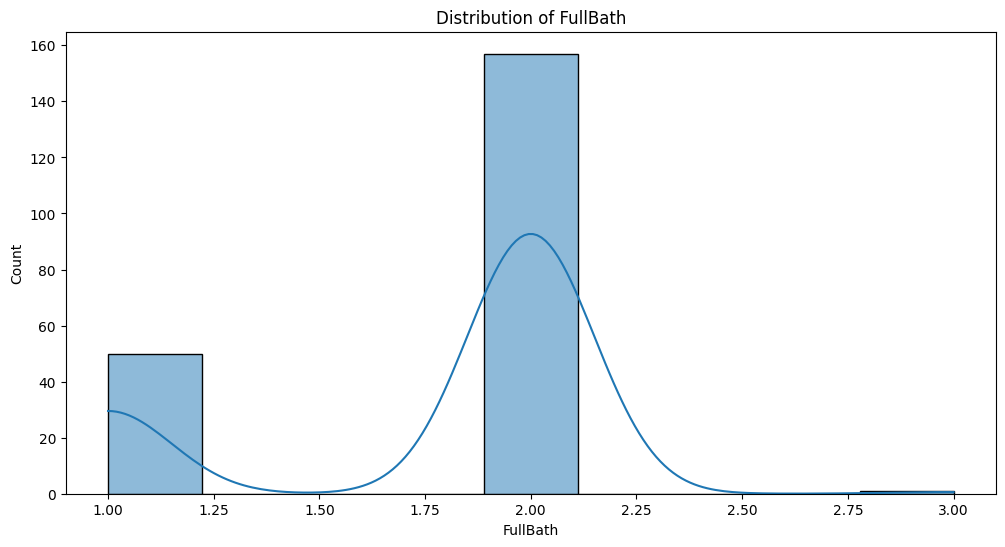

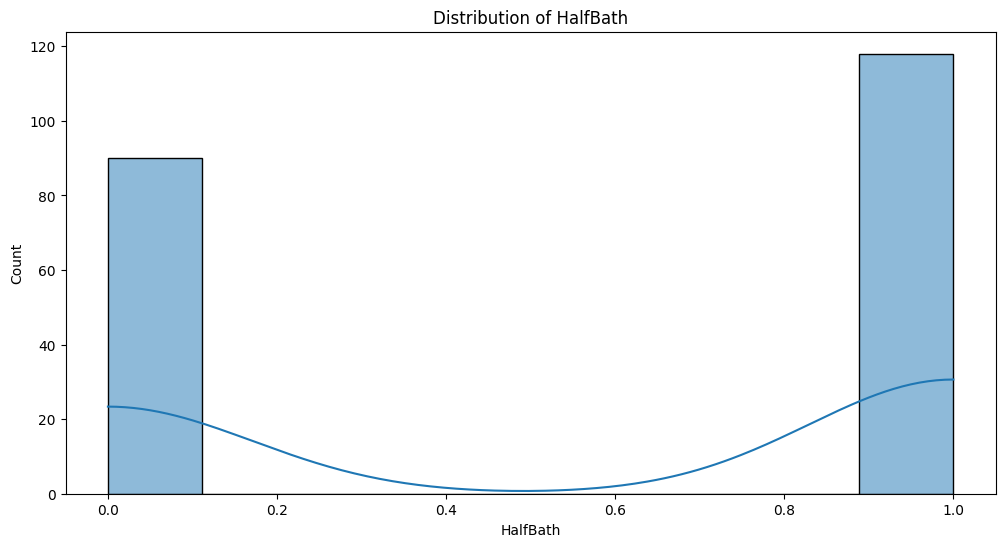

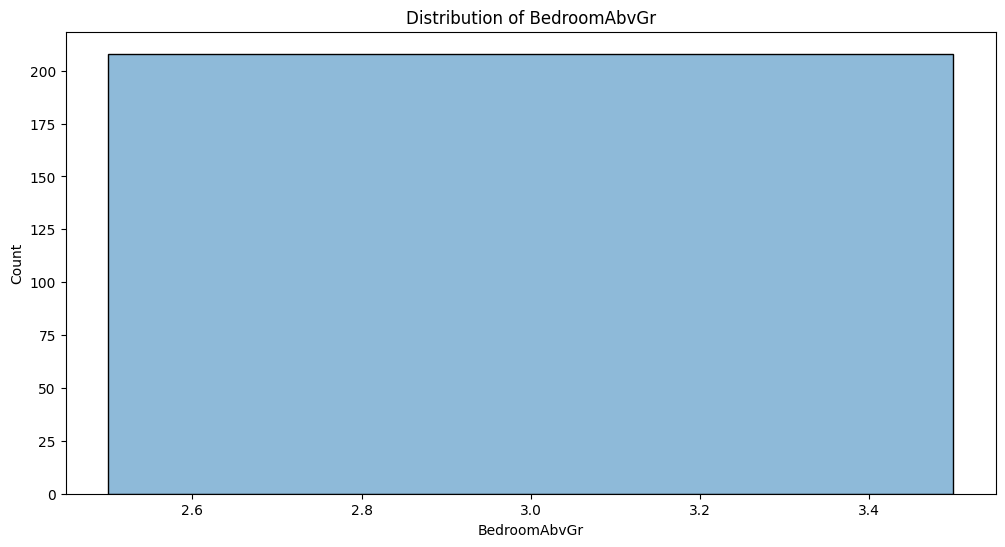

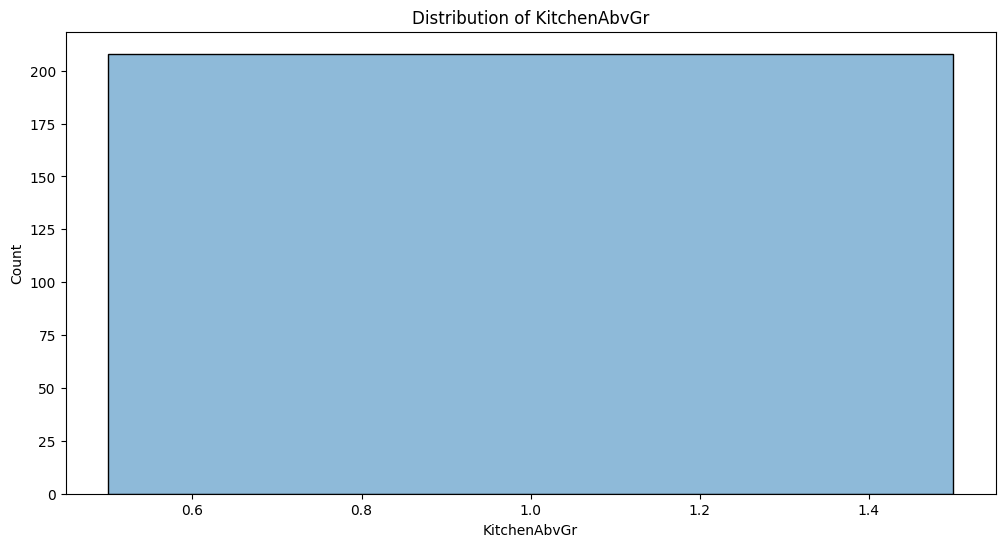

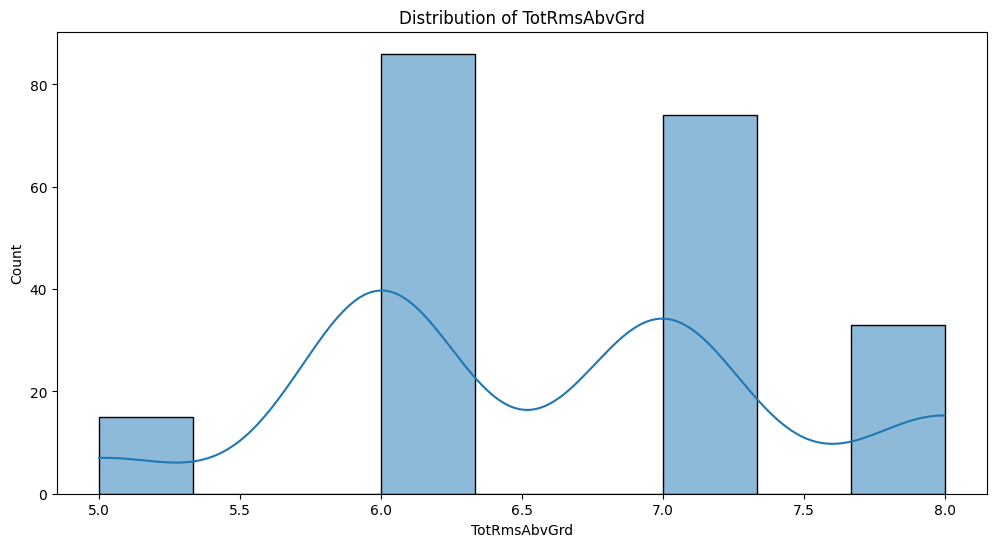

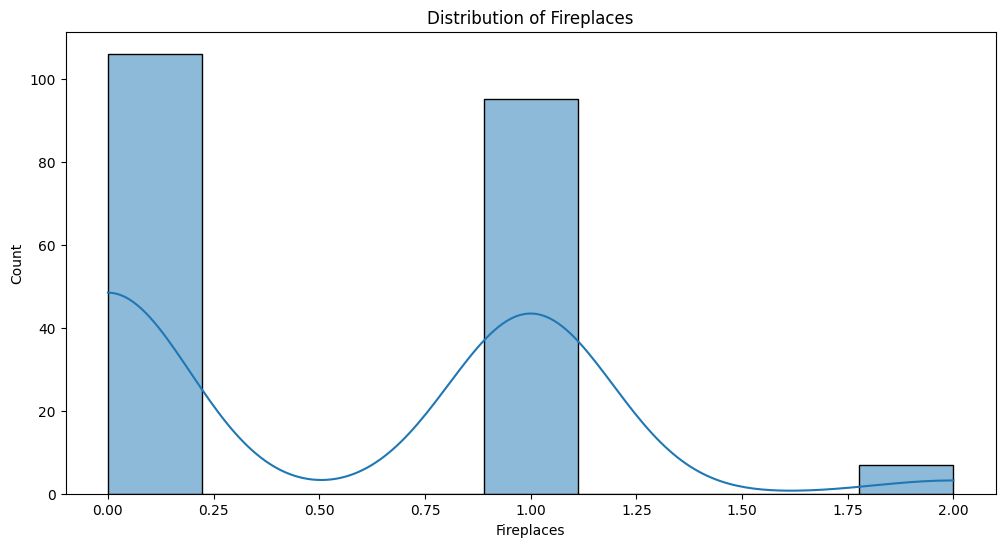

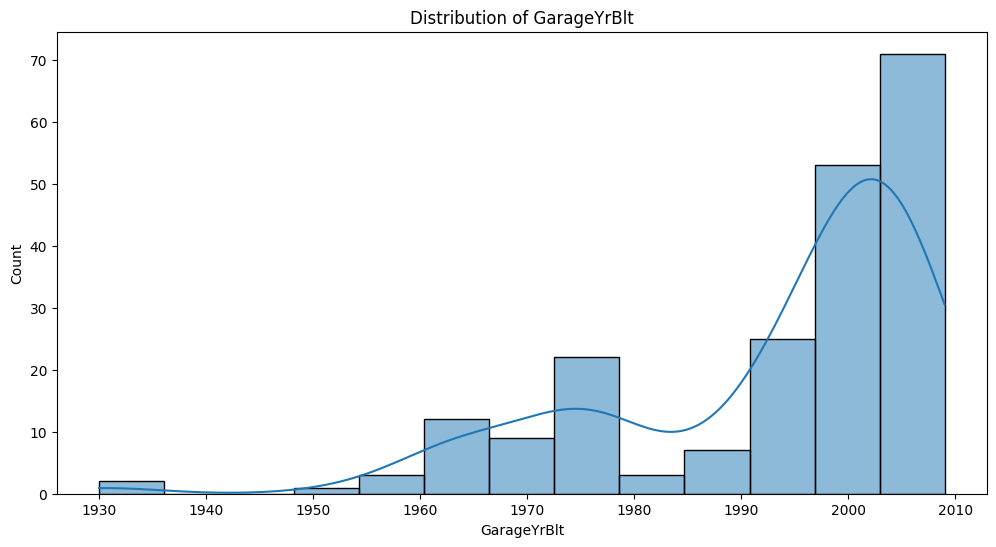

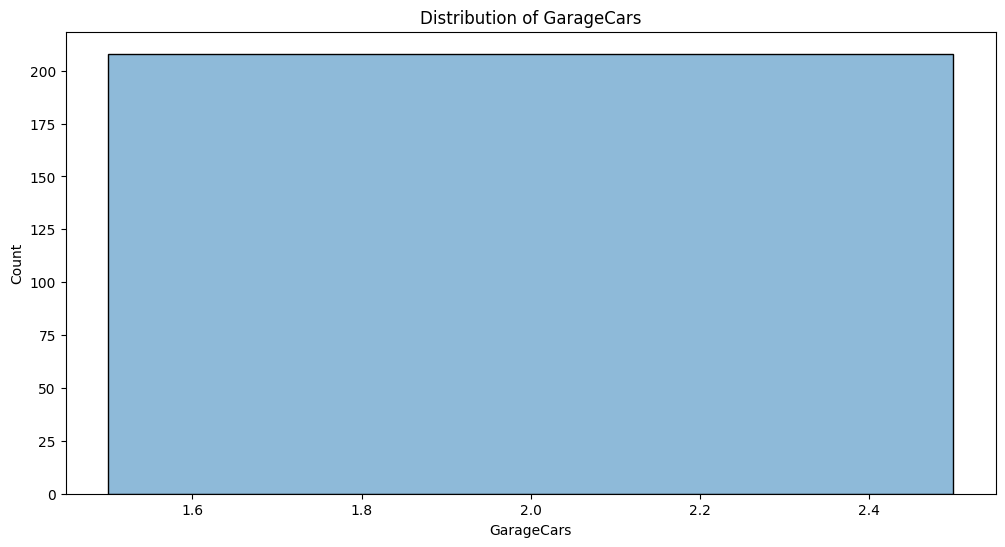

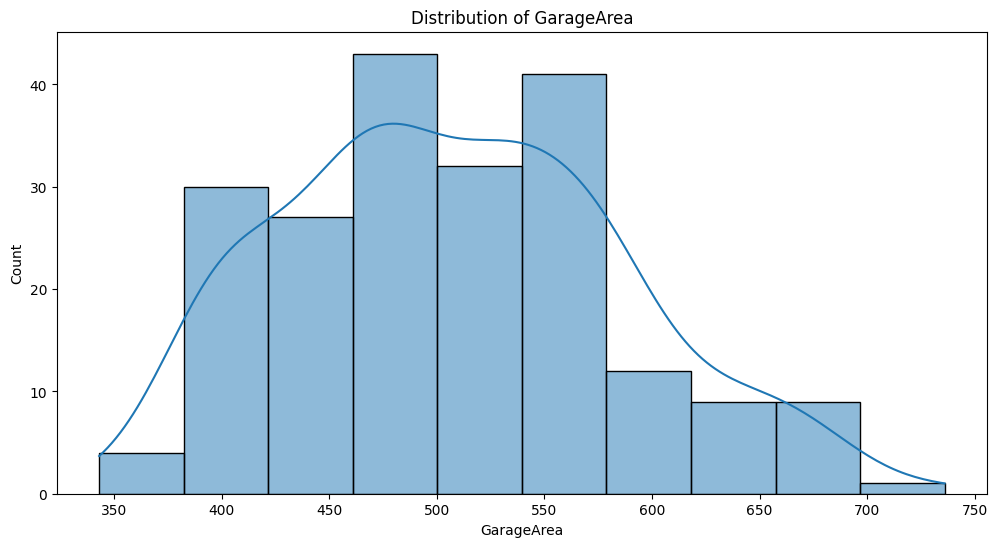

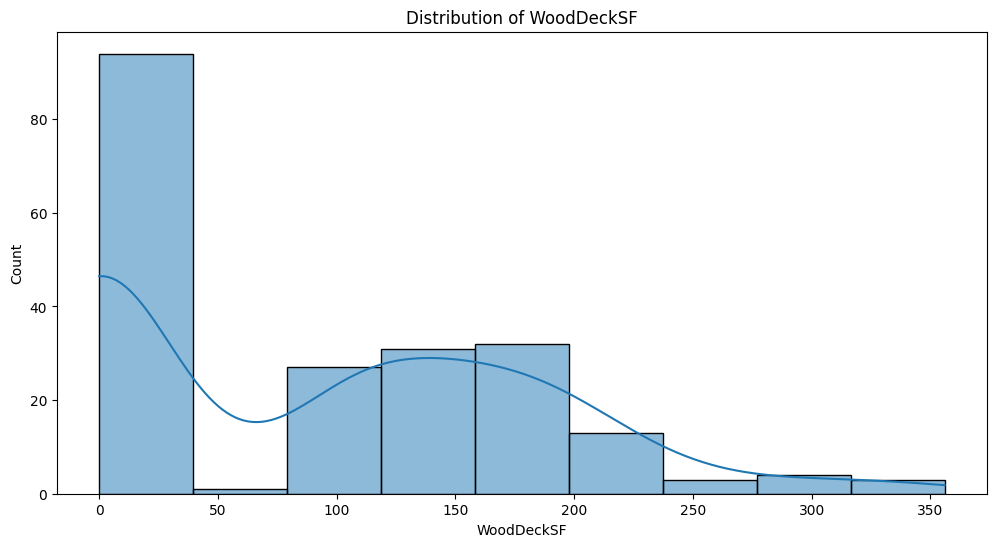

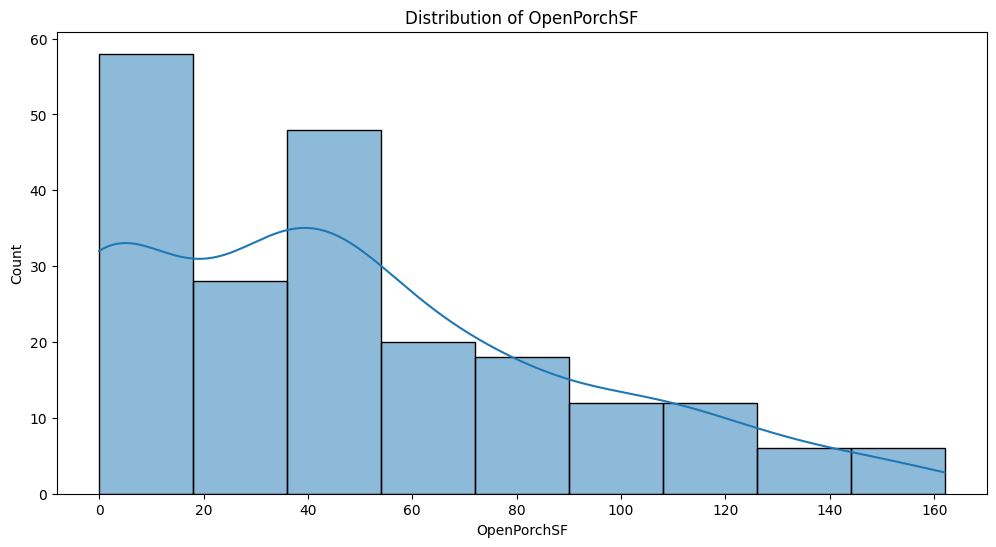

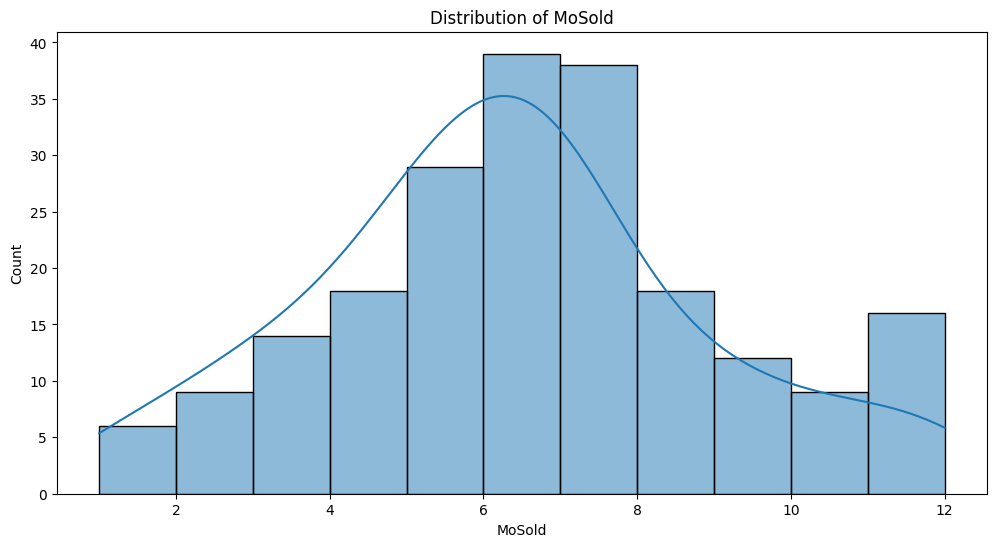

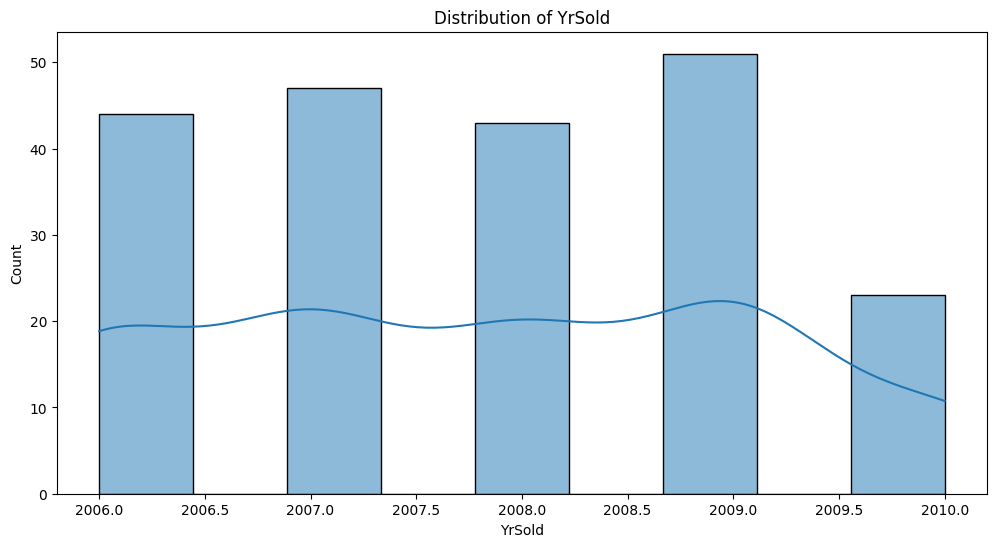

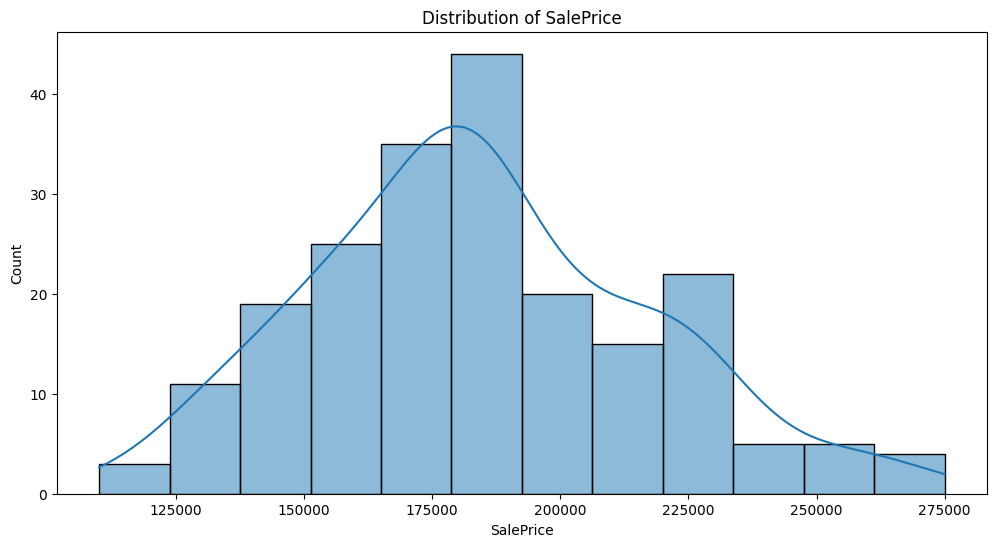

In [167]:

# Distribution of Numerical Features
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


# Target Value Distrubtion

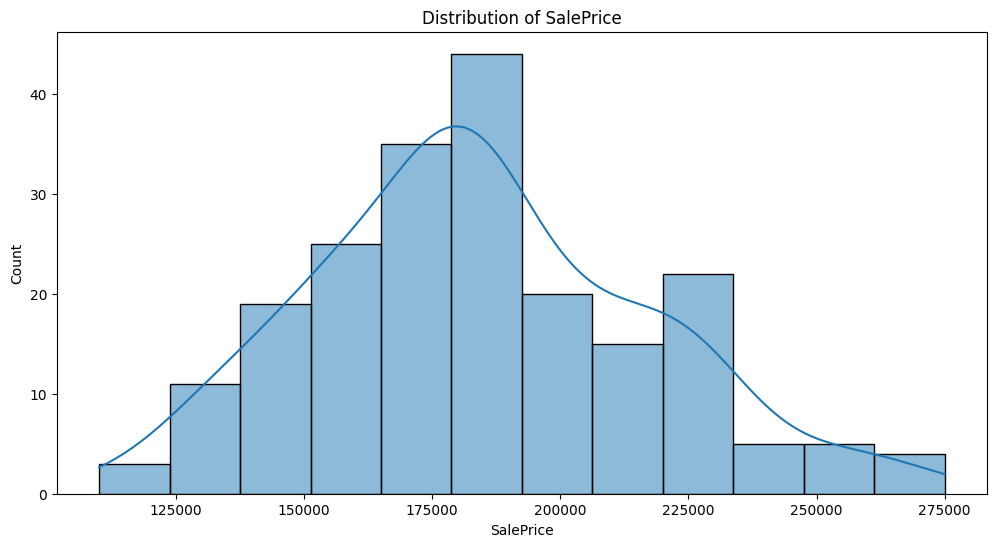

In [168]:

plt.figure(figsize=(12, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.show()


# Bivariate/Multivariate Analysis

## What are the correlations between numerical variables?

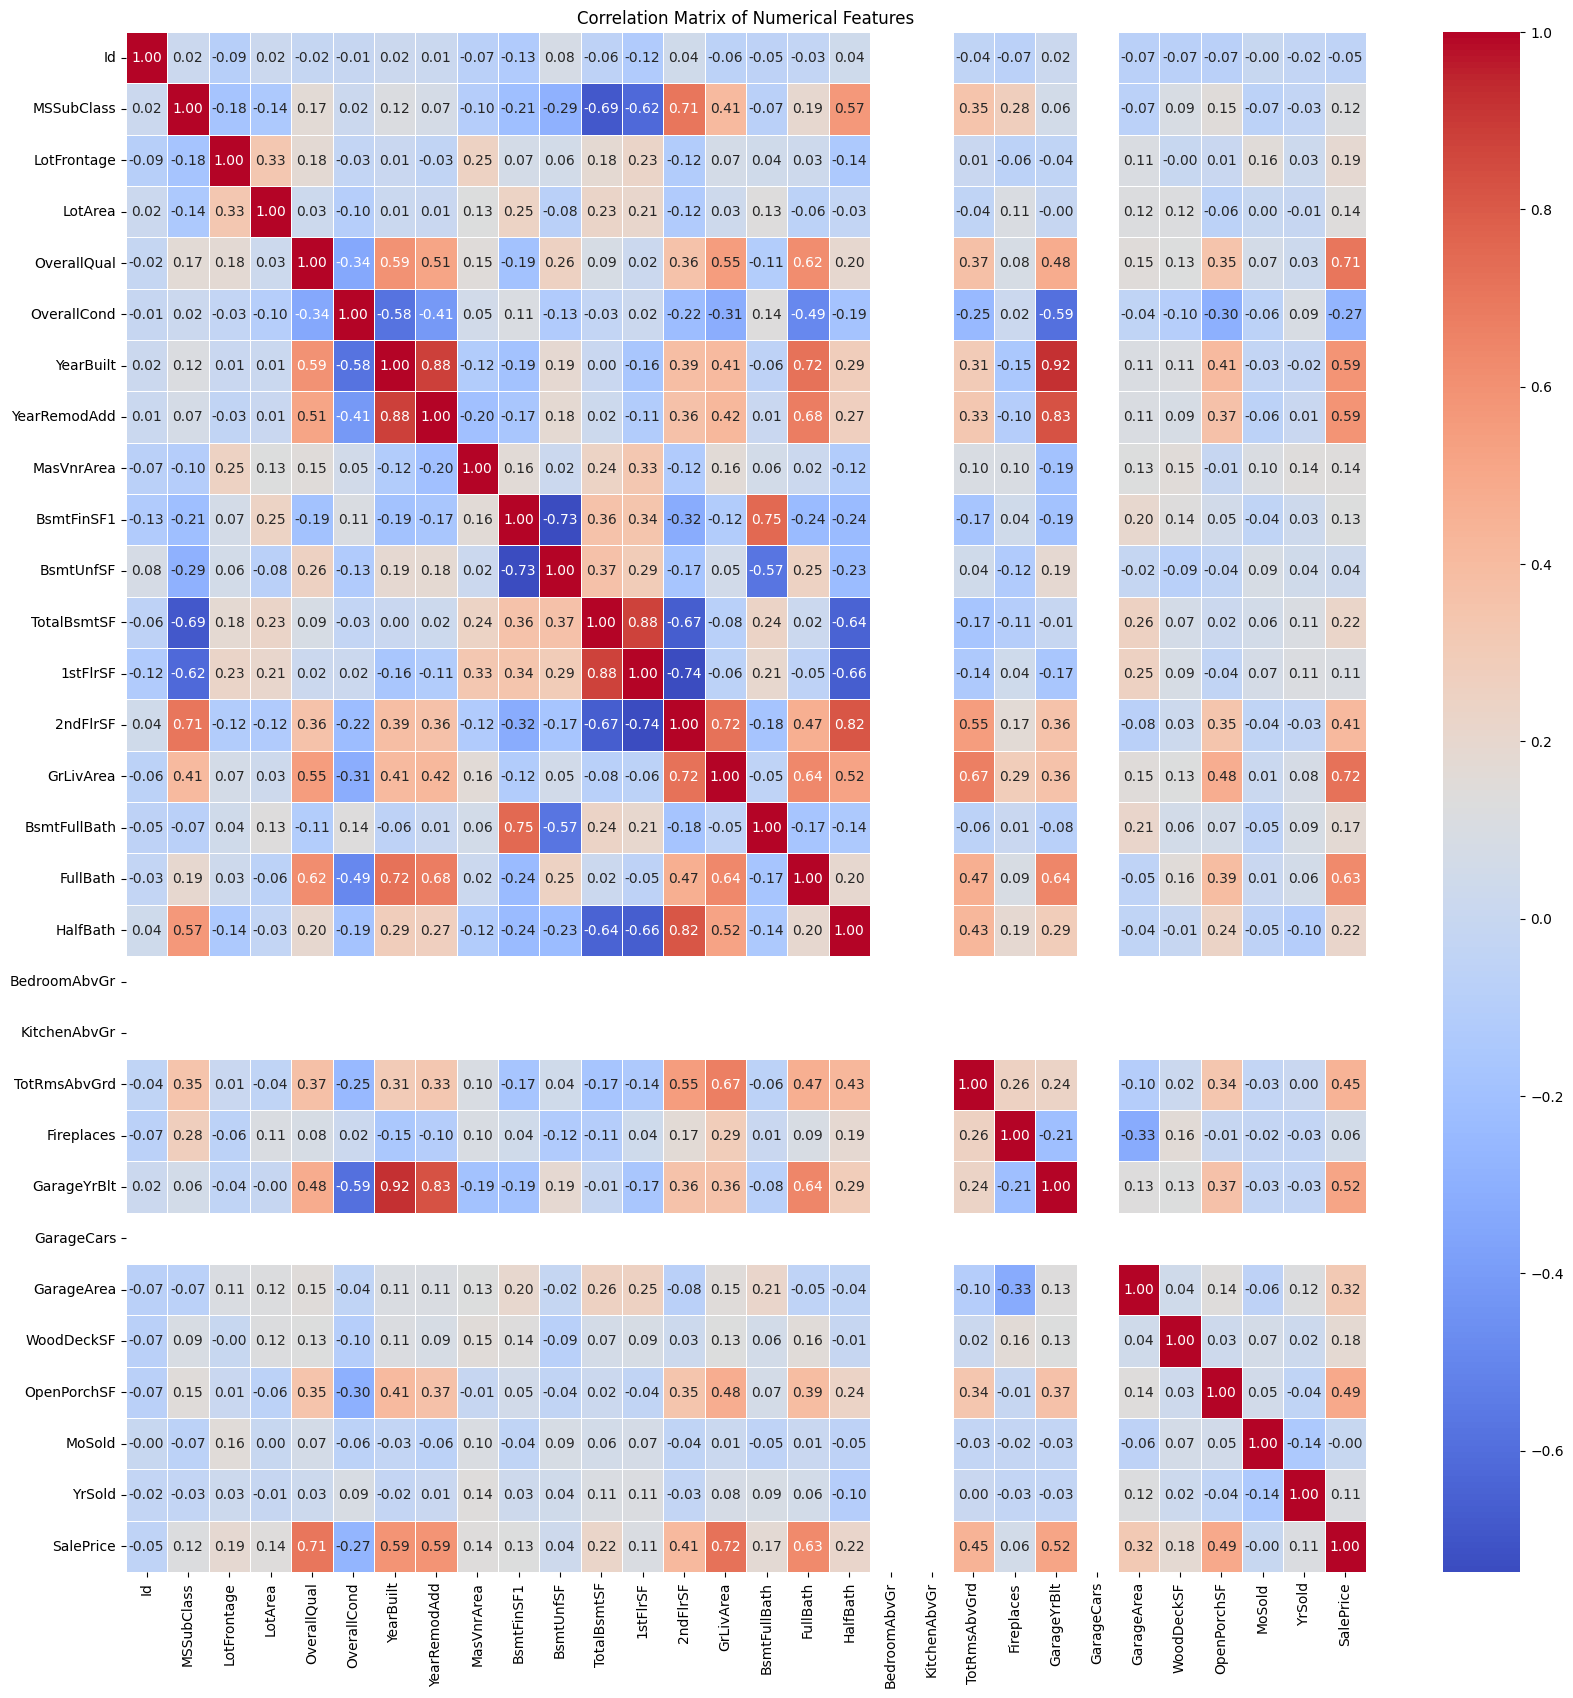

In [169]:
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

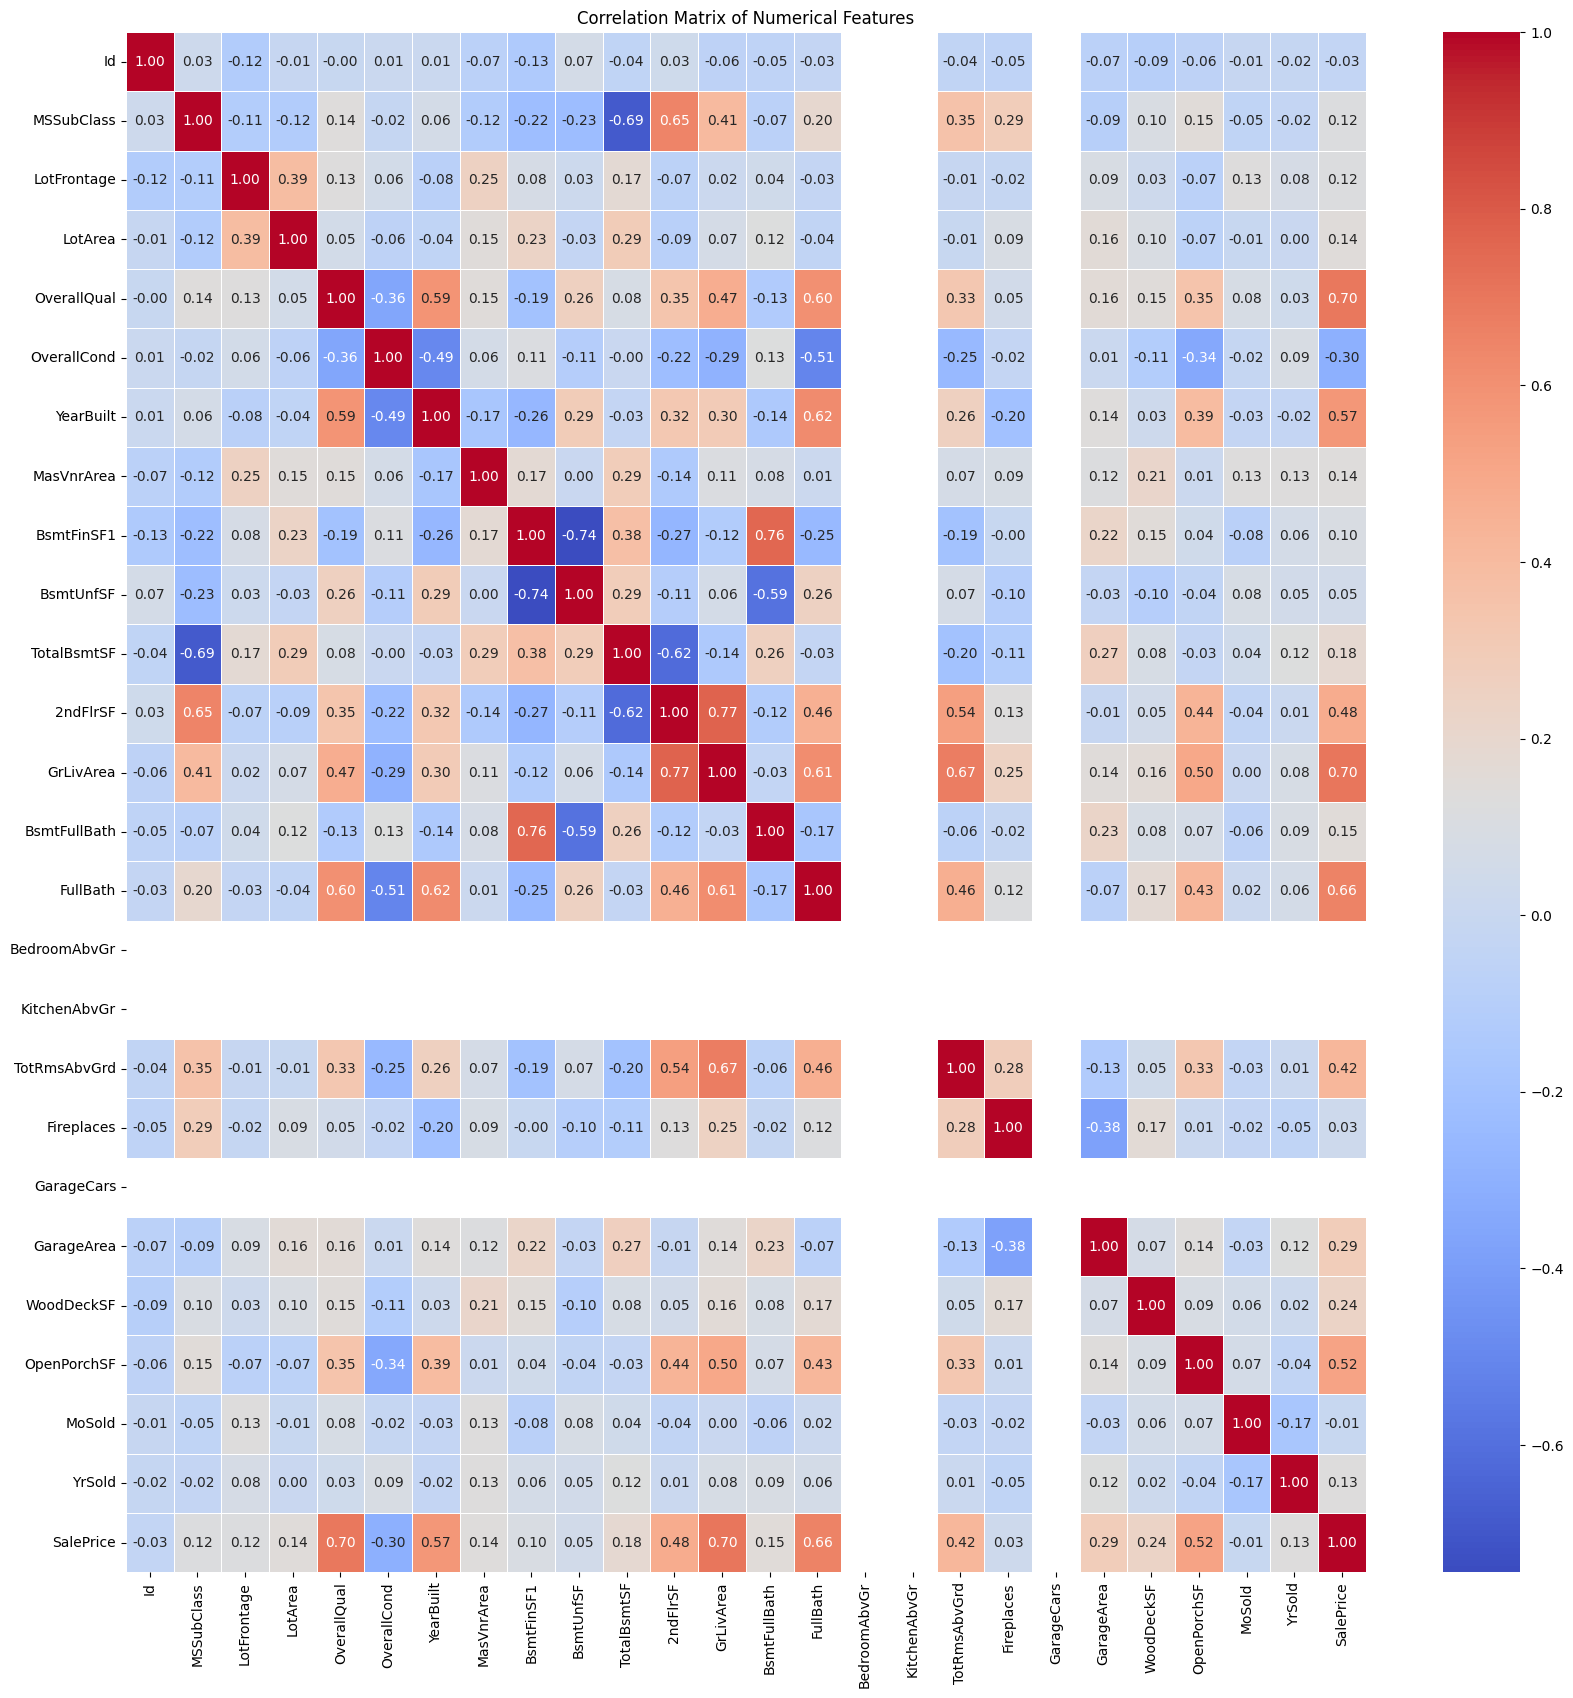

In [189]:
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr(method='spearman')

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Compare btween calculate Correlation using Pearson and Spearman

In [178]:
sns.pairplot(df.select_dtypes(include=['float64', 'int64']))
plt.show()

Output hidden; open in https://colab.research.google.com to view.

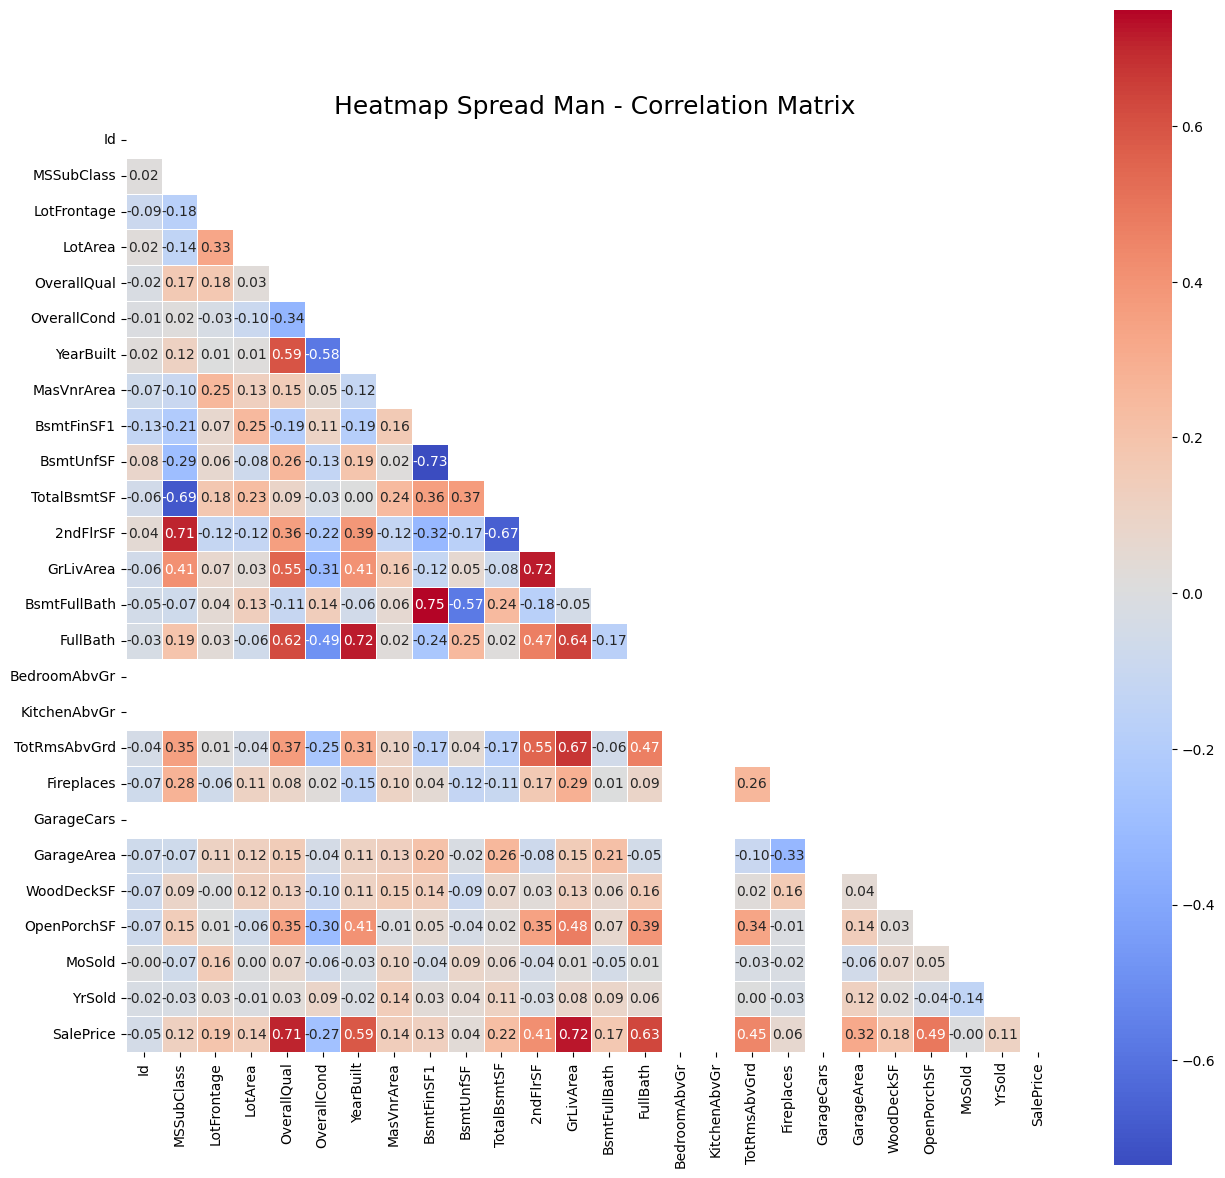

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute the correlation matrix
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

# Create a mask for the upper triangle (optional, to avoid duplication)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(
    correlation_matrix,
    mask=mask,  # Hide the upper triangle
    cmap="coolwarm",  # Color theme
    annot=True,  # Show numerical values
    fmt=".2f",  # Format decimal places
    linewidths=0.5,  # Line thickness
    square=True,  # Keep it square
)

plt.title(" Heatmap Spread Man - Correlation Matrix", fontsize=18)
plt.show()


In [187]:
df['BedroomAbvGr'].info()

<class 'pandas.core.series.Series'>
Index: 208 entries, 0 to 1455
Series name: BedroomAbvGr
Non-Null Count  Dtype
--------------  -----
208 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


Pearson Correlation:
                    Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id            1.000000    0.017466    -0.087770  0.020997    -0.017067   
MSSubClass    0.017466    1.000000    -0.175124 -0.142331     0.168447   
LotFrontage  -0.087770   -0.175124     1.000000  0.332038     0.175535   
LotArea       0.020997   -0.142331     0.332038  1.000000     0.028136   
OverallQual  -0.017067    0.168447     0.175535  0.028136     1.000000   
OverallCond  -0.008906    0.019041    -0.027139 -0.096035    -0.337260   
YearBuilt     0.021830    0.116877     0.007039  0.013841     0.594576   
MasVnrArea   -0.072798   -0.099575     0.252821  0.126269     0.150471   
BsmtFinSF1   -0.125823   -0.209991     0.068988  0.245553    -0.192751   
BsmtUnfSF     0.082986   -0.292031     0.062336 -0.076424     0.256961   
TotalBsmtSF  -0.058235   -0.688508     0.180041  0.231123     0.089108   
2ndFlrSF      0.044702    0.706059    -0.115051 -0.124438     0.355851   
GrLivArea    -0.0

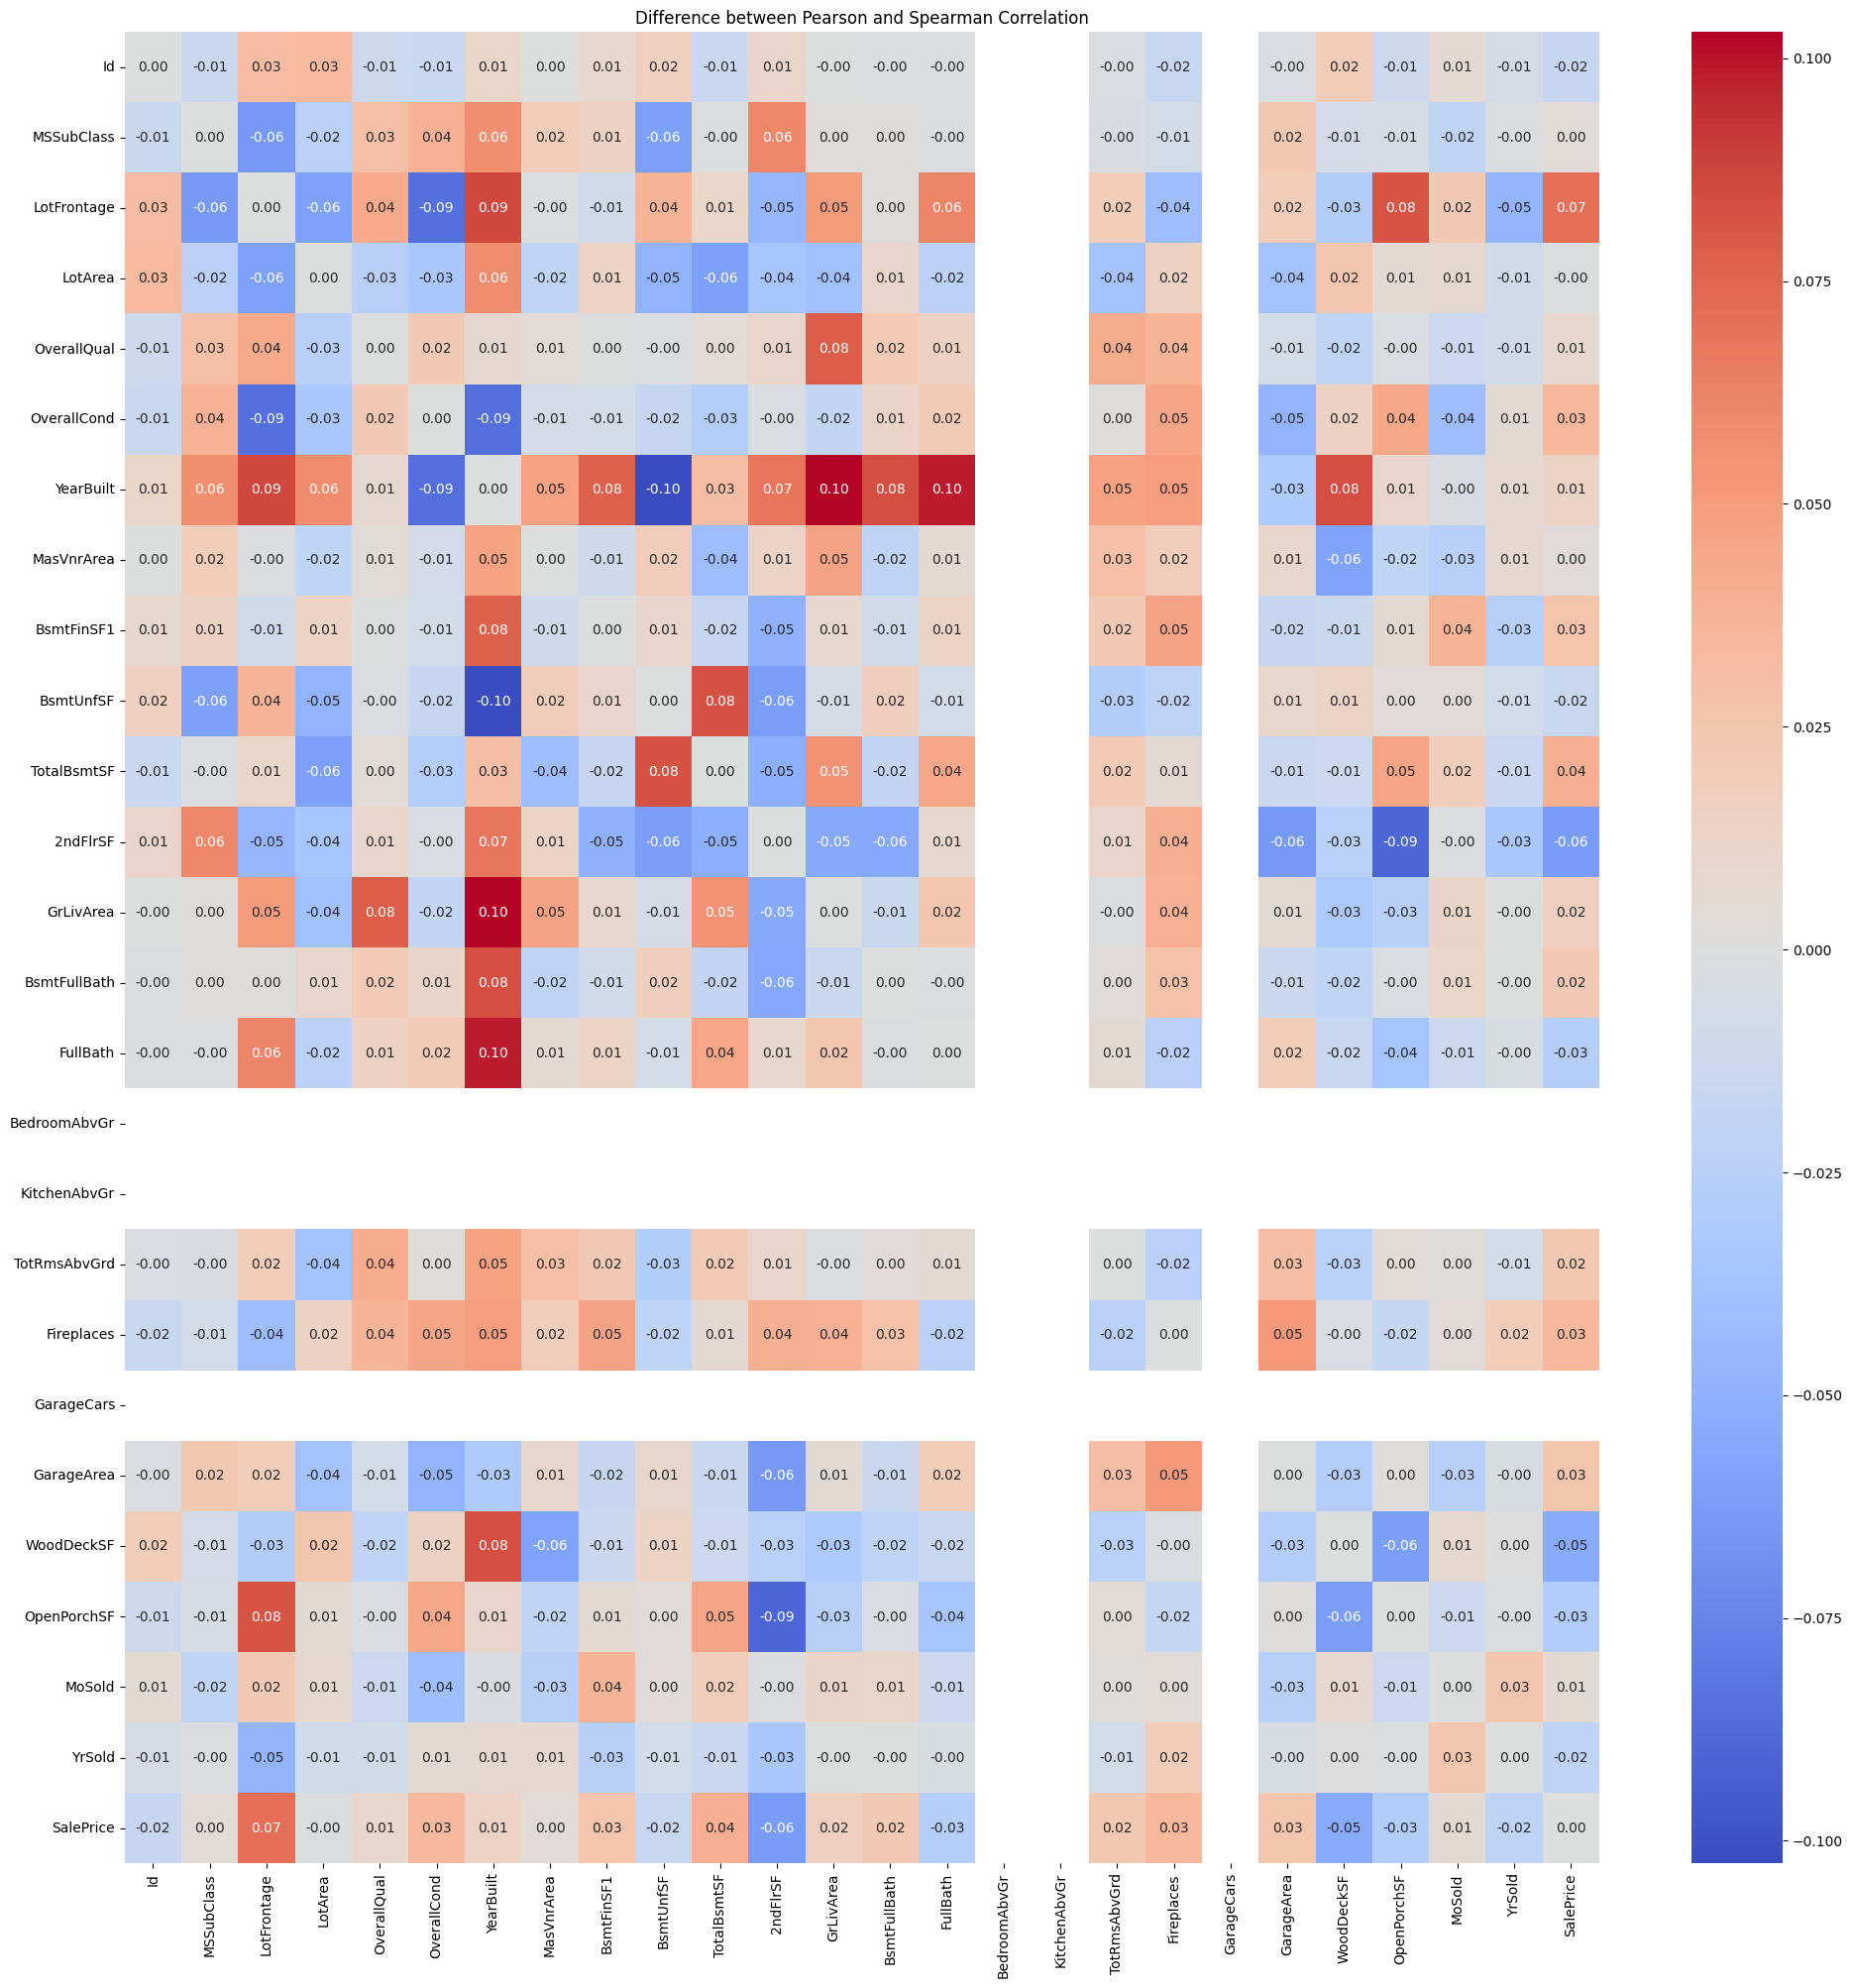

In [173]:

# Pearson correlation
pearson_corr = df.select_dtypes(include=['float64', 'int64']).corr(method='pearson')
print("Pearson Correlation:")
print(pearson_corr)

# Spearman correlation
spearman_corr = df.select_dtypes(include=['float64', 'int64']).corr(method='spearman')
print("\nSpearman Correlation:")
print(spearman_corr)

# Visualize the difference (optional)
plt.figure(figsize=(24, 24))
sns.heatmap(pearson_corr - spearman_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Difference between Pearson and Spearman Correlation')
plt.show()


## What we should do about high corrleated featuers?

## What are the correlations between Featuers and Target Variable?

SalePrice       1.000000
GrLivArea       0.721536
OverallQual     0.707080
FullBath        0.632354
YearBuilt       0.586118
OpenPorchSF     0.493449
TotRmsAbvGrd    0.446166
2ndFlrSF        0.413794
GarageArea      0.316538
TotalBsmtSF     0.222355
LotFrontage     0.190446
WoodDeckSF      0.182957
BsmtFullBath    0.173851
LotArea         0.142068
MasVnrArea      0.138626
BsmtFinSF1      0.126825
MSSubClass      0.122781
YrSold          0.111338
Fireplaces      0.061787
BsmtUnfSF       0.035508
MoSold         -0.002195
Id             -0.047373
OverallCond    -0.271085
BedroomAbvGr         NaN
KitchenAbvGr         NaN
GarageCars           NaN
Name: SalePrice, dtype: float64


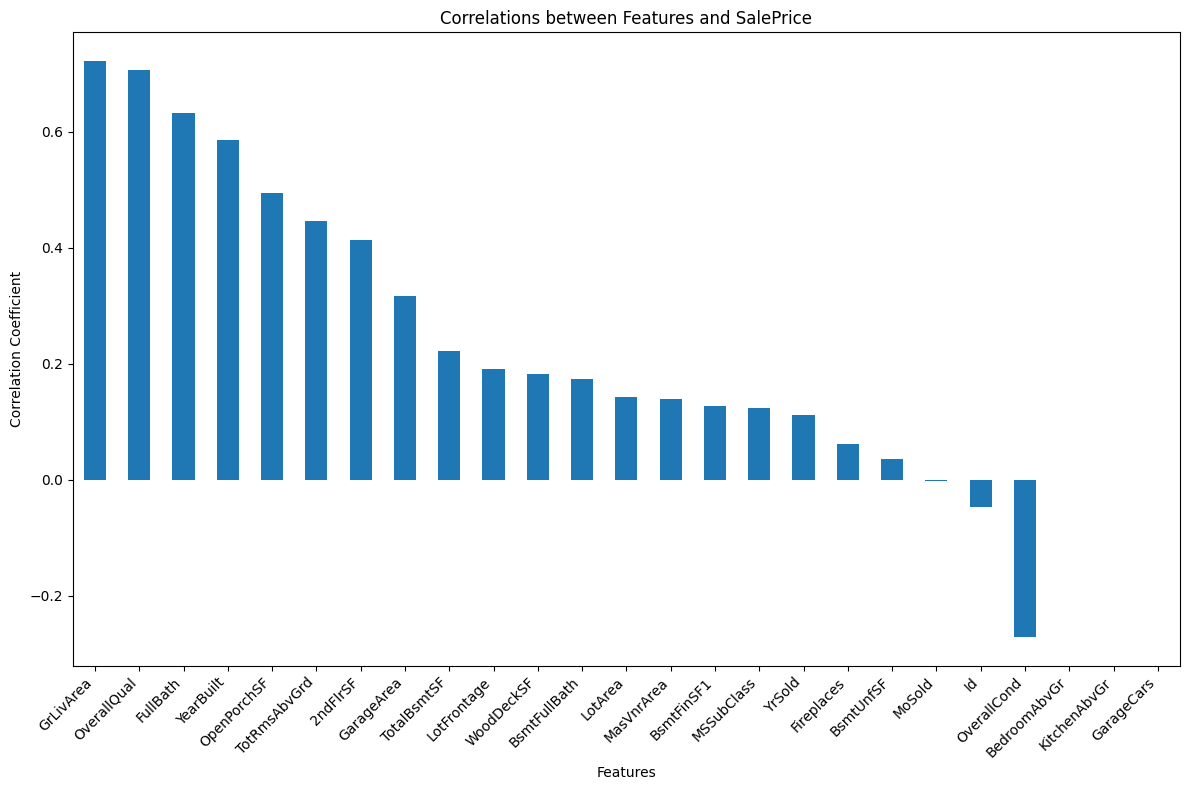

In [177]:
numerical_features = df.select_dtypes(include=['number'])
correlations = numerical_features.corr()['SalePrice'].sort_values(ascending=False)

# Print or visualize the correlations
print(correlations)

# Example visualization using a bar plot
plt.figure(figsize=(12, 8))
correlations.drop('SalePrice').plot(kind='bar')  # Exclude 'SalePrice' itself
plt.title('Correlations between Features and SalePrice')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## What are the top 3 correlated featuers with target value

# D-Tale Or SweetViz Use One Of them and compare its report results to your results

# Final Conclusion or Insights

Write Here ..